In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import Model
#from bayes_opt import BayesianOptimization
#from util import mae, load_and_split_descriptor, metric, read_label, r_square
import pickle
import csv
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_absolute_error as mae

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso


from sklearn.metrics import \
    r2_score, get_scorer
from sklearn.linear_model import \
    Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split
test_size = 0.1
random_seed=4844

In [2]:
def fti_predict(model, x, y):


    model.fit(x, y)

    y_train_predicted = model.predict(x_train_transformed)
    print("mean squared error of "+str(model)+ ' on training data is'+ mse(y,y_train_predicted))
    y_test_predicted = model.predict(x_test_transformed)
    print("mean squared error of "+str(model)+ ' on testing data is'+ mse(y_test,y_test_predicted))
    #pickle.dump(kr_predictor, open(os.path.join('./models', "kr"+str(iteration),'wb')))

In [3]:
#algoritms_used =

In [4]:
train_dataset = pd.read_csv("data_compund_properties", index_col=None)
exp_dattaset = pd.read_csv("exp_data_compund_properties_5", index_col=None)
#Downloading previous saved data


In [5]:
x_data = train_dataset.drop(axis=1,labels=["agl_thermal_conductivity_300K","aurl","auid",'compound','Pearson_symbol_relax','geometry','spacegroup_orig', 'Unnamed: 0'])

x_data

atomic number  Mendeleev number    period      group  atomic mass  \
0         83.000000         87.000000  6.000000  15.000000   208.980000   
1         76.416667         68.583333  5.916667  11.083333   190.996483   
2         74.916667         68.666667  5.833333  11.083333   187.132358   
3         76.739130         65.391304  6.000000  10.565217   191.761522   
4         34.000000         81.000000  4.000000  12.666667    77.245133   
...             ...               ...       ...        ...          ...   
5659       6.000000         95.000000  2.000000  14.000000    12.010700   
5660      22.250000         64.750000  3.750000   8.750000    48.178725   
5661       6.000000         95.000000  2.000000  14.000000    12.010700   
5662       6.000000         93.000000  2.000000  14.000000    12.408850   
5663       6.000000         95.000000  2.000000  14.000000    12.010700   

      atomic density  valence electrons  absolute radii  covalent radii  \
0        9780.000000           3.000000        1.571200        1.480000   
1       13135.166667           1.916667        1.218842        1.393333   
2       13078.833333           1.916667        1.209525        1.379167   
3       12584.217391           1.869565        1.327552        1.466087   
4        7491.666667           0.000000        1.250233        1.186667   
...              ...                ...             ...             ...   
5659     2267.000000           4.000000        0.942200        0.760000   
5660     6251.750000           2.500000        1.607325        1.332500   
5661     2267.000000           4.000000        0.942200        0.760000   
5662     1743.000000           0.000000        1.012400        0.775000   
5663     2267.000000           4.000000        0.942200        0.760000   

      van der Waals radii  ...  polarizability  global hardness  \
0                2.070000  ...       42.676700         3.397200   
1                2.131667  ...      160.589500         2.274700   
2                2.108333  ...      135.758583         2.318467   
3                2.230000  ...      243.457391         2.194387   
4                1.906667  ...       48.154333         7.054867   
...                   ...  ...             ...              ...   
5659             1.700000  ...        1.243200        11.040700   
5660             1.997500  ...       38.354800         3.834800   
5661             1.700000  ...        1.243200        11.040700   
5662             1.735000  ...        1.573650        11.041400   
5663             1.700000  ...        1.243200        11.040700   

      electrophilicity indices  atomization enthalpy  fusion enthalpy  \
0                     2.671040            207.000000        10.900000   
1                     5.495105             65.416667         2.281667   
2                     5.504012             66.083333         2.293333   
3                     5.290321             65.565217         2.263913   
4                     3.578853            273.000000         7.607333   
...                        ...                   ...              ...   
5659                  4.768960            717.000000       117.000000   
5660                  2.394932            412.250000        15.450000   
5661                  4.768960            717.000000       117.000000   
5662                  4.768800            518.000000        25.180000   
5663                  4.768960            717.000000       117.000000   

      vaporization enthalpy  binding energy  spacegroup_relax  volume_atom  \
0                160.000000    90526.000000               140     40.00310   
1                 60.266667    77443.500000               221     30.58650   
2                 60.675000    76477.533333               221     30.18190   
3                 59.956522    76956.304348               223     33.18990   
4                171.136667    17190.366667               224     19.36390   
...                     ...             ...           

In [6]:
#x_data_compound = x_data.drop(axis=1,labels=["agl_thermal_conductivity_300K","aurl","auid",'compound','Pearson_symbol_relax','geometry', 'Unnamed: 0'])
x_exp_data = exp_dattaset.drop(axis=1,labels=["thermal_conductivity_exp ",'compound', 'Unnamed: 0'])

x_exp_data


atomic number  Mendeleev number    period      group  atomic mass  \
0       40.000000         79.812500  4.500000  13.000000    91.972094   
1       42.705882         83.647059  4.588235  14.117647   102.024471   
2       19.928571         79.500000  3.428571  12.214286    41.867586   
3       30.666667         79.000000  4.000000  12.666667    68.684000   
4       36.666667         78.666667  4.333333  12.666667    84.897333   
5       22.428571         82.714286  3.500000  13.428571    47.727557   
6       31.200000         81.200000  4.000000  13.200000    70.317867   
7       30.000000         81.266667  3.933333  13.200000    67.347567   
8       21.000000         82.285714  3.428571  13.285714    44.238914   
9       32.000000         84.000000  4.000000  14.000000    72.640000   
10      46.352941         87.529412  4.705882  14.823529   111.855176   
11      42.444444         82.666667  4.555556  13.888889   101.399767   
12      52.705882         86.823529  5.058824  14.823529   127.771059   
13      44.470588         87.588235  4.647059  14.823529   106.649882   
14      41.000000         84.000000  4.500000  14.000000    96.504500   
15      32.000000         84.500000  4.000000  14.000000    72.184500   
16      23.000000         85.000000  3.500000  14.000000    48.737000   
17      33.875000         82.875000  4.125000  13.625000    77.571900   
18      24.875000         83.375000  3.625000  13.625000    54.124400   
19      42.000000         88.000000  4.500000  15.000000    98.835000   
20      12.666667         77.000000  3.000000   6.000000    25.565167   
21      19.571429         78.571429  3.428571  11.857143    41.077143   
22      45.500000         83.750000  4.750000  14.000000   108.391000   
23      41.000000         84.250000  4.500000  14.000000    97.117250   
24      21.750000         80.250000  3.500000  12.750000    45.880250   
25      47.250000         83.750000  4.750000  14.000000   113.840250   
26      50.000000         83.500000  5.000000  14.000000   120.005500   
27      41.000000         84.000000  4.500000  14.000000    95.685500   
28      32.000000         84.500000  4.000000  14.000000    72.238000   
29      50.500000         85.750000  5.000000  14.500000   121.207000   
30      45.500000         84.000000  4.750000  14.000000   108.197750   

    atomic density  valence electrons  absolute radii  covalent radii  \
0      7876.500000           0.000000        1.387875        1.341250   
1      5845.529412           0.000000        1.525476        1.345882   
2      3995.785714          -0.071429        1.272243        1.221429   
3      7553.000000           0.666667        1.354600        1.280000   
4      8026.666667           0.666667        1.389633        1.340000   
5      5430.214286          -0.071429        1.259293        1.186429   
6      7039.800000           0.533333        1.331913        1.264000   
7      6840.266667           0.533333        1.327853        1.258000   
8      4937.142857          -0.285714        1.222357        1.148571   
9      5323.000000           4.000000        1.436300        1.200000   
10     6421.411765           0.117647        1.506365        1.328235   
11     6071.222222           0.000000        1.543906        1.346111   
12     6917.647059           0.117647        1.533153        1.398824   
13     6184.352941           0.117647        1.507318        1.324118   
14     6690.000000           0.000000        1.212300        1.300000   
15     5979.500000           0.000000        1.159750        1.210000   
16     4550.000000           0.000000        1.118550        1.135000   
17     6665.750000           0.250000        1.309425        1.261250   
18     5236.250000           0.250000        1.268225        1.186250   
19     6064.500000           1.000000        1.349300        1.295000   
20     1935.333333           2.666667        1.429333        1.310000   
21     3682.000000           0.000000        1.288871        

In [7]:
y_data = train_dataset["agl_thermal_conductivity_300K"]


#crating x and y dataset

In [8]:
y_data

0         0.009881
1         0.011507
2         0.011813
3         0.013735
4         0.017453
           ...    
5659    206.237000
5660    213.507000
5661    272.257000
5662    281.785000
5663    419.731000
Name: agl_thermal_conductivity_300K, Length: 5664, dtype: float64

In [9]:
exp_y_data = exp_dattaset["thermal_conductivity_exp "]
exp_y_data

0      0.290
1      0.530
2      1.400
3      0.540
4      0.700
5      0.240
6      0.240
7      0.260
8      1.500
9     60.000
10     0.510
11     0.247
12     0.380
13     0.518
14    11.000
15    13.000
16    27.000
17     1.500
18     4.180
19     1.500
20    11.000
21     2.500
22     6.200
23     8.200
24     7.800
25     1.700
26     6.300
27    10.000
28    20.000
29     0.700
30     1.660
Name: thermal_conductivity_exp , dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_size, random_state=random_seed)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_transformed = scaler.transform(x_train)

In [11]:

x_test_transformed = scaler.transform(x_test)

In [12]:

x_exp_transformed = scaler.transform(x_exp_data)

In [13]:
x_train

atomic number  Mendeleev number    period      group  atomic mass  \
1697      53.333333         58.000000  5.333333   8.666667   126.847000   
146       33.333333         77.777778  4.111111  13.333333    76.135622   
3885      35.800000         69.000000  4.400000  10.600000    81.227000   
3562      27.090909         87.363636  3.272727  13.272727    63.519436   
4447      37.750000         65.250000  4.000000   9.250000    92.694250   
...             ...               ...       ...        ...          ...   
4654      50.000000         60.000000  5.000000   7.000000   121.579250   
759       48.000000         56.000000  5.000000   8.333333   113.296000   
225       77.200000         59.400000  6.000000   9.400000   192.181600   
3466      51.000000         59.000000  5.250000   7.000000   120.726000   
555       41.000000         60.000000  4.750000   9.500000    93.877475   

      atomic density  valence electrons  absolute radii  covalent radii  \
1697     9326.333333           3.333333        1.689100        1.583333   
146      3583.555556          -0.666667        1.348478        1.404444   
3885     7083.200000           2.600000        1.458140        1.386000   
3562     5551.363636          -0.363636        0.977864        0.990909   
4447     8937.250000           3.250000        1.488200        1.265000   
...              ...                ...             ...             ...   
4654    14380.000000           2.500000        1.465150        1.470000   
759      9140.000000           3.000000        1.786533        1.510000   
225     16754.000000           1.400000        1.360300        1.462000   
3466    12982.500000           3.500000        1.509900        1.495000   
555      7818.750000           2.000000        1.680825        1.505000   

      van der Waals radii  ...  polarizability  global hardness  \
1697             2.100000  ...       45.237333         3.726633   
146              2.060000  ...       50.159000         5.625567   
3885             2.040000  ...       66.256200         4.178780   
3562             1.767273  ...       12.794345        11.736636   
4447             2.052500  ...        5.935325         7.726025   
...                   ...  ...             ...              ...   
4654             2.025000  ...       31.261400         5.963650   
759              2.063333  ...       38.684567         4.327900   
225              2.136000  ...        2.764520         8.967180   
3466             2.087500  ...       97.964125         4.069850   
555              2.175000  ...       66.687500         2.964725   

      electrophilicity indices  atomization enthalpy  fusion enthalpy  \
1697                  2.699720            415.666667        13.166667   
146                   3.117740            116.333333         6.328889   
3885                  2.605428            379.400000        19.200000   
3562                  5.248438            321.000000         7.832182   
4447                  4.125895            576.000000        35.450000   
...                        ...                   ...              ...   
4654                  3.735840            593.000000        24.400000   
759                   2.888110            383.333333        15.730000   
225                   5.369124            324.800000        11.540000   
3466                  2.890548            635.500000        32.000000   
555                   2.242743            297.750000        10.465000   

      vaporization enthalpy  binding energy  spacegroup_relax  volume_atom  \
1697             360.000000    34805.333333               189      21.4690   
146               32.288889    13319.422222               128      36.3167   
3885             244.160000    15865.000000               139      17.3684   
3562             153.988182    17459.609091               227      13.2847   
4447             484.750000    31560.750000                62      12.6146   
...                     ...             ...           

In [14]:
y_test

2729     3.68017
1322     1.77377
1940     2.49865
2367     3.06005
54       0.24224
          ...   
1488     1.94602
3204     4.61441
1867     2.40052
1668     2.15744
4925    13.55150
Name: agl_thermal_conductivity_300K, Length: 567, dtype: float64

In [15]:
x_test

atomic number  Mendeleev number    period      group  atomic mass  \
2729      58.000000         48.500000  5.500000   7.500000   139.835000   
1322      74.000000         50.500000  6.000000   8.000000   184.656500   
1940      28.000000         61.333333  4.000000  10.000000    64.499333   
2367      75.333333         51.000000  6.000000   7.666667   187.736000   
54        43.800000         74.200000  4.800000  11.400000   101.217600   
...             ...               ...       ...        ...          ...   
1488      24.666667         79.333333  3.666667  12.666667    53.052333   
3204      37.666667         66.333333  4.333333   9.000000    89.977500   
1867      42.800000         71.400000  4.600000  10.600000   101.051800   
1668      30.333333         76.000000  4.000000   9.000000    68.853667   
4925      17.000000         49.500000  3.500000   8.000000    35.968700   

      atomic density  valence electrons  absolute radii  covalent radii  \
2729     8858.000000           2.500000        1.575150        1.665000   
1322    10322.500000           3.000000        1.917900        1.685000   
1940     2723.333333           3.333333        1.655233        1.456667   
2367    16250.000000           2.333333        1.464500        1.530000   
54      10275.600000           1.000000        1.330940        1.364000   
...              ...                ...             ...             ...   
1488     6600.000000           0.666667        1.327133        1.230000   
3204     9432.333333           2.666667        1.613567        1.390000   
1867     9664.000000           2.600000        1.417160        1.364000   
1668     5989.333333           2.666667        1.490467        1.373333   
4925     2842.500000           3.000000        1.826350        1.455000   

      van der Waals radii  ...  polarizability  global hardness  \
2729             2.260000  ...       36.821450         4.349250   
1322             2.145000  ...       48.018000         4.044300   
1940             2.293333  ...      158.170733         4.689567   
2367             2.126667  ...        3.496000         8.312900   
54               2.030000  ...       63.870620         3.497940   
...                   ...  ...             ...              ...   
1488             1.933333  ...       20.452033         5.313833   
3204             2.013333  ...       27.541900         5.808133   
1867             2.000000  ...       46.455800         4.248280   
1668             1.886667  ...       26.584867         3.999300   
4925             2.070000  ...       45.700150         4.019550   

      electrophilicity indices  atomization enthalpy  fusion enthalpy  \
2729                  3.042745            214.500000        13.100000   
1322                  2.984495            241.500000        10.600000   
1940                  2.690033            364.666667        36.133333   
2367                  5.052047            427.333333        15.900000   
54                    2.435058            328.600000        13.360000   
...                        ...                   ...              ...   
1488                  2.897893            318.333333         9.310000   
3204                  3.469330            454.000000        16.466667   
1867                  2.669294            400.400000        20.760000   
1668                  2.525453            262.000000         9.600000   
4925                  2.426330            352.000000        13.350000   

      vaporization enthalpy  binding energy  spacegroup_relax  volume_atom  \
2729             192.500000    42098.500000               221      25.5488   
1322             215.000000    70574.000000               221      26.9307   
1940             286.000000    13706.333333               212      25.8458   
2367             380.000000    72707.333333               227      18.8724   
54               284.200000    22244.400000               205      16.7210   
...                     ...             ...           

In [16]:
x_test_transformed


array([[ 1.22739938, -1.40405276,  1.27885285, ...,  0.83362375,
         0.80053921, -0.76282392],
       [ 2.15839855, -1.2598671 ,  1.7769969 , ...,  0.83362375,
         0.98557608, -0.74747175],
       [-0.51822408, -0.47886142, -0.21557933, ...,  0.68910935,
         0.84030761,  0.6761416 ],
       ...,
       [ 0.34295016,  0.24687308,  0.38219354, ..., -0.64363455,
        -0.4402349 , -0.14221452],
       [-0.38245337,  0.5785001 , -0.21557933, ...,  0.75333797,
         0.12872103, -0.70451647],
       [-1.15828601, -1.33195993, -0.71372338, ...,  0.83362375,
         0.09042553, -0.82174071]])

In [17]:
#KernelRidge
iteration = 0
kr = KernelRidge(alpha=1, kernel='rbf')
kr_predictor = GridSearchCV(kr, scoring='neg_mean_absolute_error', cv=10,
                       param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                                   "gamma": np.logspace(-2, 2, 5)})
#fit
#fti_predict(kr_predictor,x_train_transformed,y_train)
kr_predictor.fit(x_train_transformed,y_train)

y_train_predicted_kr = kr_predictor.predict(x_train_transformed)

In [18]:
mse(y_train,y_train_predicted_kr)
#print("mean squared error of "+"kr_predictor"+ ' on training data is'+ mse(y_train,y_train_predicted_kr))

35.61613066770104

In [19]:
y_test_predicted_krr = kr_predictor.predict(x_test_transformed)
mse(y_test,y_test_predicted_krr)


79.03477532475965

In [20]:

y_exp_predicted_krr = kr_predictor.predict(x_exp_transformed)
mse(exp_y_data,y_exp_predicted_krr)
#print("mean squared error of "+"kr_predictor"+ ' on testing data is'+ mse(y_test,y_test_predicted))


150.67365489798843

In [21]:
left_limit = 0
right_limit = 300
x_label = 'Calculated Thermal Conductivity [W/(mK)]'
y_label = 'Predicted Thermal Conductivity [W/(mK)]'
color = 'blue'
def plot(y, y_, fig_name="krr"):
    plt.figure(figsize=(5, 5), dpi=300)
    plt.scatter(y, y_, s=2, c=color, alpha=0.8, label='Train')
    equal_x = np.arange(left_limit, right_limit, 0.1)
    plt.xlim(left_limit, right_limit)
    plt.ylim(left_limit, right_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.title(fig_name)
    #plt.xscale('log')
    #plt.yscale("log")
    #plt.axes.set_facecolor(color='White')
    plt.plot(equal_x, equal_x, color='k', linestyle='dashed', linewidth=1, markersize=1)
    #plt.savefig(os.path.join(fig_path, fig_name))
    r_2 = r2_score(y,y_)
    mse_ = mse(y,y_)
    plt.annotate(f'R^2 value:{round(r_2,2)}\nMSE value:{round(mse_,2)}\n MAE value:{round(mae(y,y_),2)}',(80,250))


def plot_log(y, y_, fig_name="krr"):
    plt.figure(figsize=(5, 5), dpi=300)
    ax=plt.axes()
    plt.scatter(y, y_, s=2, c=color, alpha=0.8, label='Train')
    equal_x = np.arange(left_limit, right_limit, 0.1)
    #plt.xlim(left_limit, right_limit)
    #plt.ylim(left_limit, right_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.title(fig_name+" log")
    plt.xscale('log')
    plt.yscale("log")
    plt.plot(equal_x, equal_x, color='c', linestyle='dashed', linewidth=1, markersize=1)
    #plt.savefig(os.path.join(fig_path, fig_name))
    r_2 = r2_score(y,y_)
    mse_ = mse(y,y_)

    plt.annotate(f'R^2 value:{round(r_2,2)}\nMSE value:{round(mse_,2)}\n MAE value:{round(mae(y,y_),2)}',(1,100))

    #ax.set_facecolor('w')
#Support Vector Regression

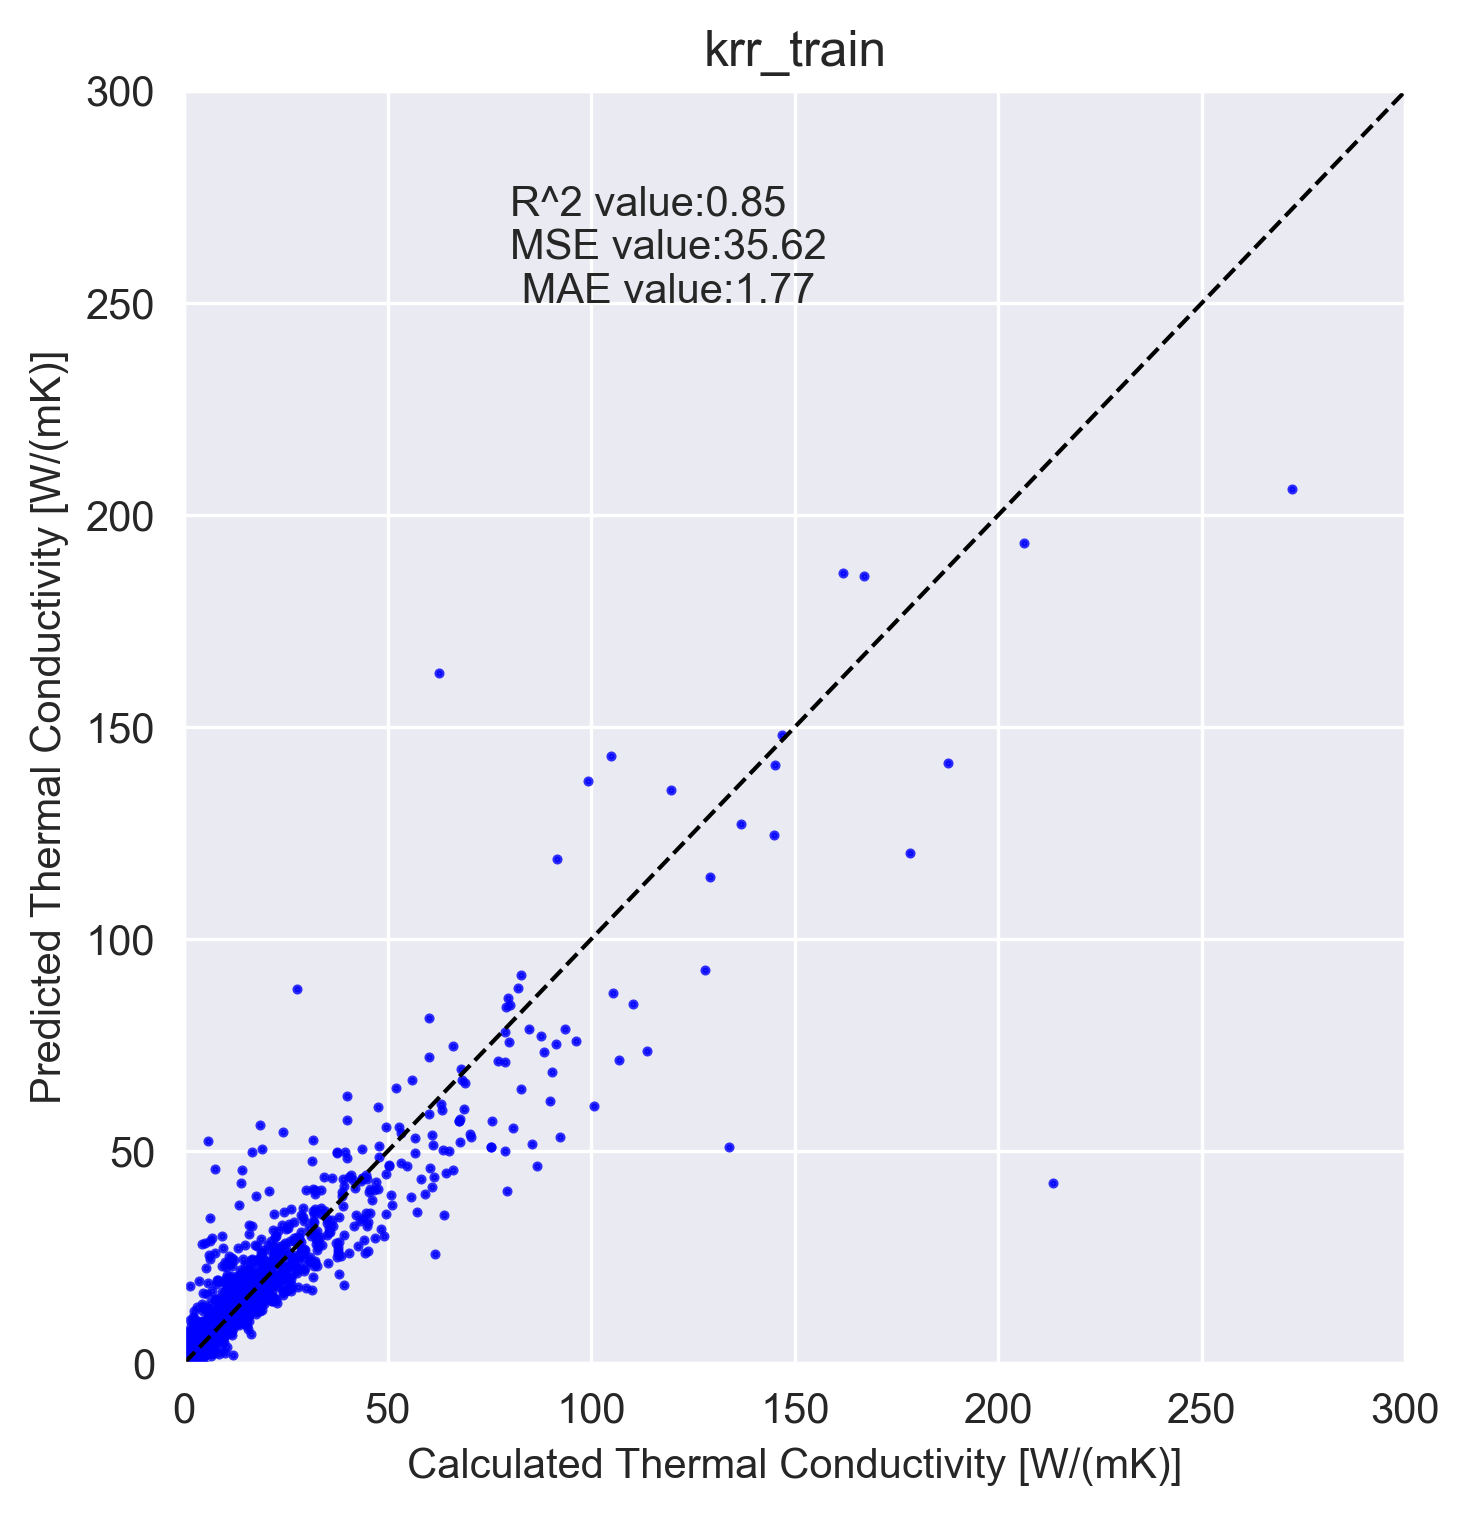

In [22]:
plot(y_train,y_train_predicted_kr,"krr_train")

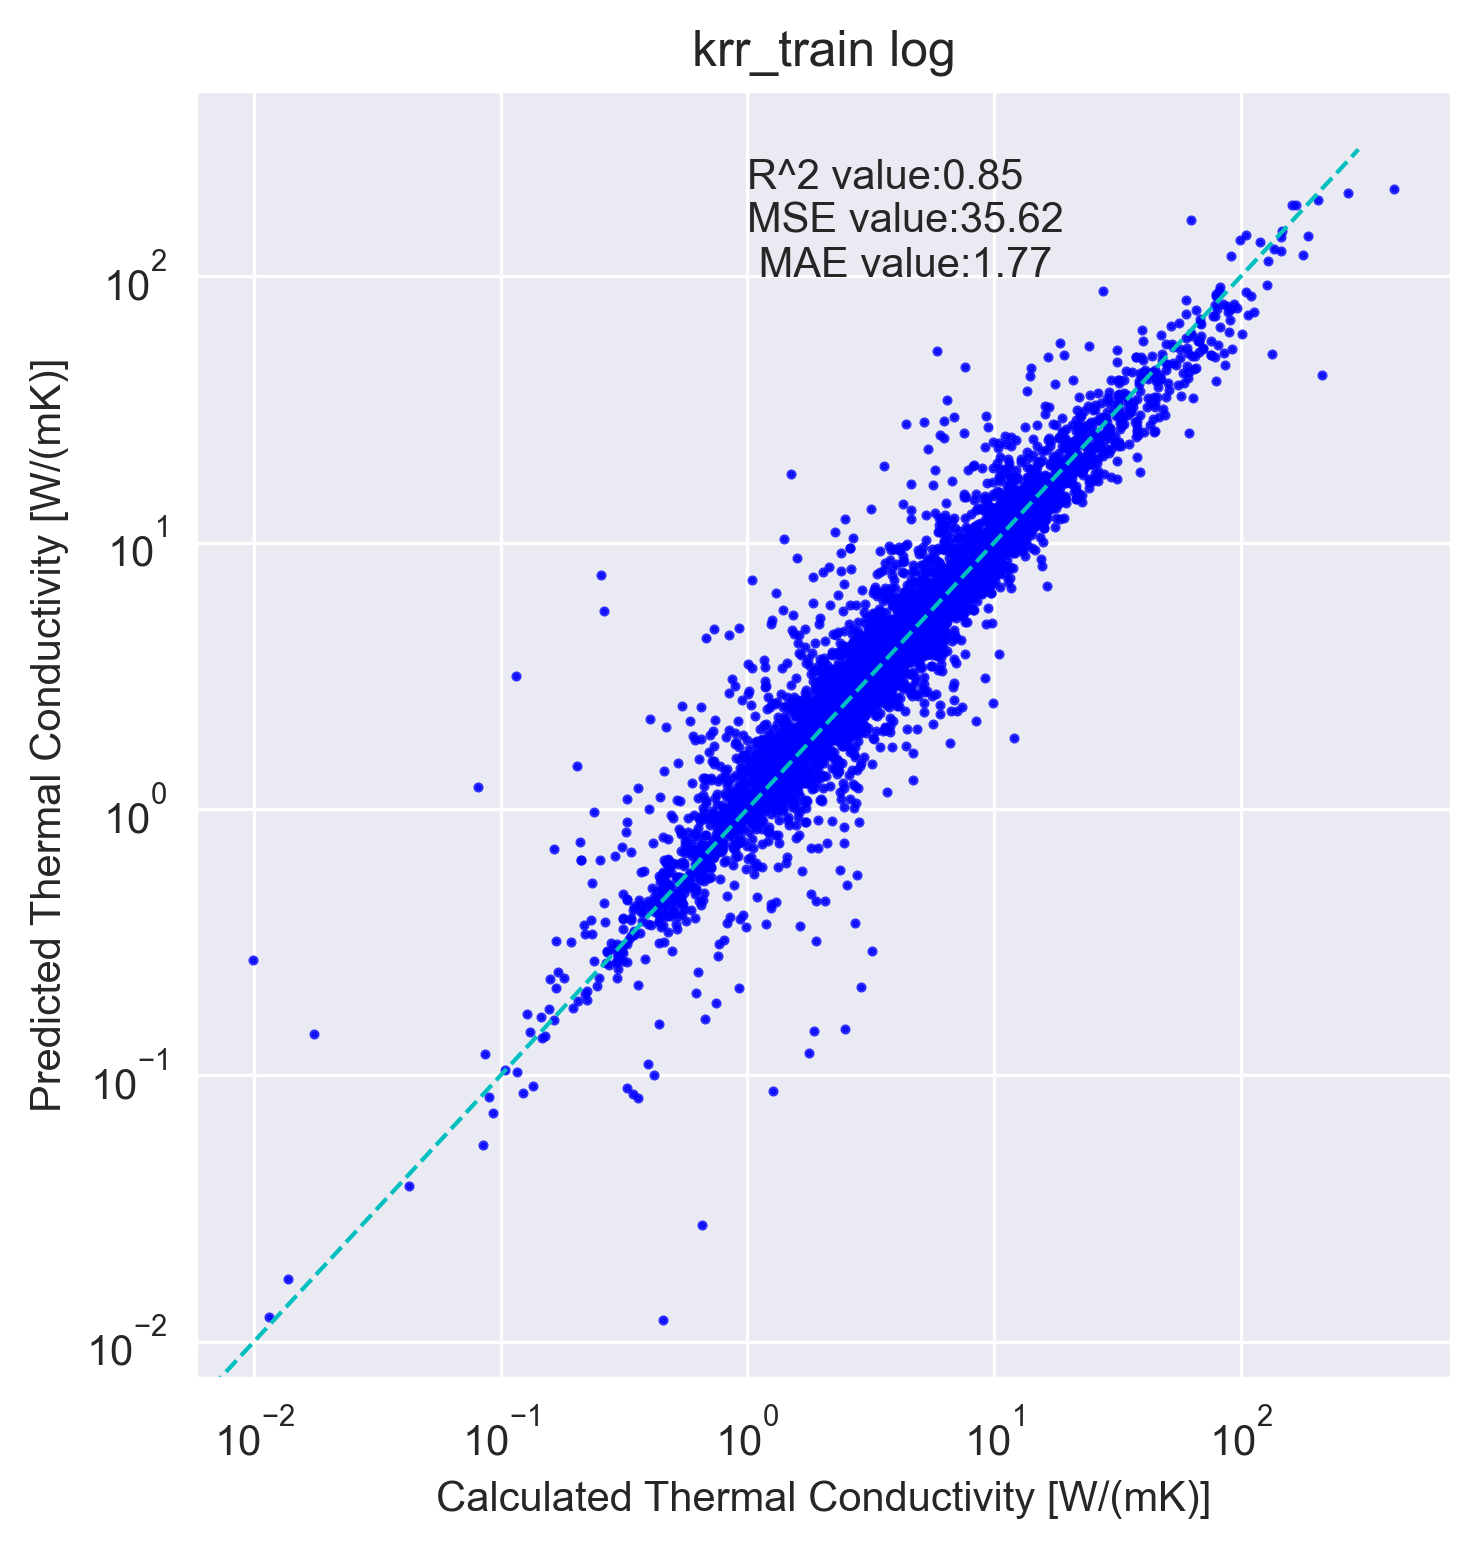

In [23]:
plot_log(y_train,y_train_predicted_kr,"krr_train")

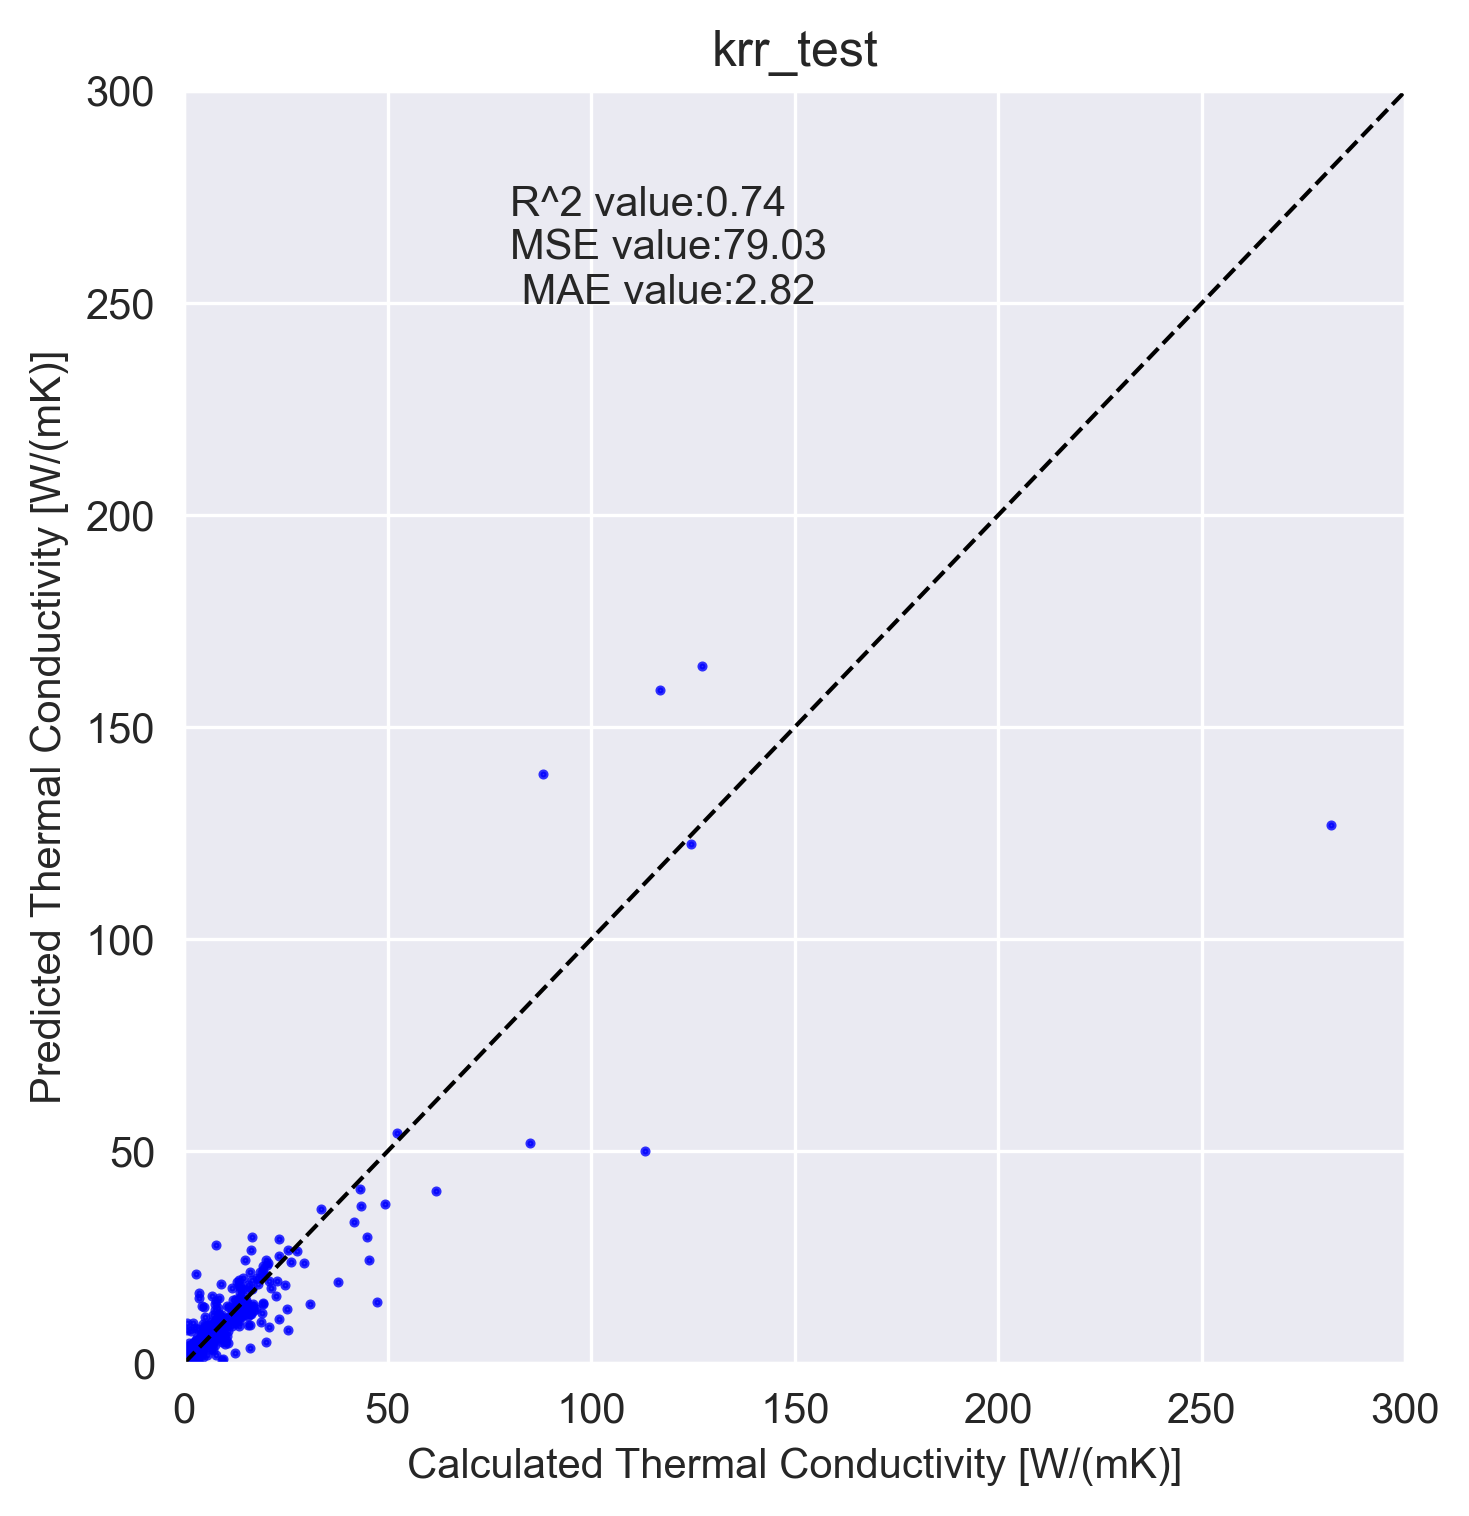

In [24]:
plot(y_test,y_test_predicted_krr,"krr_test")


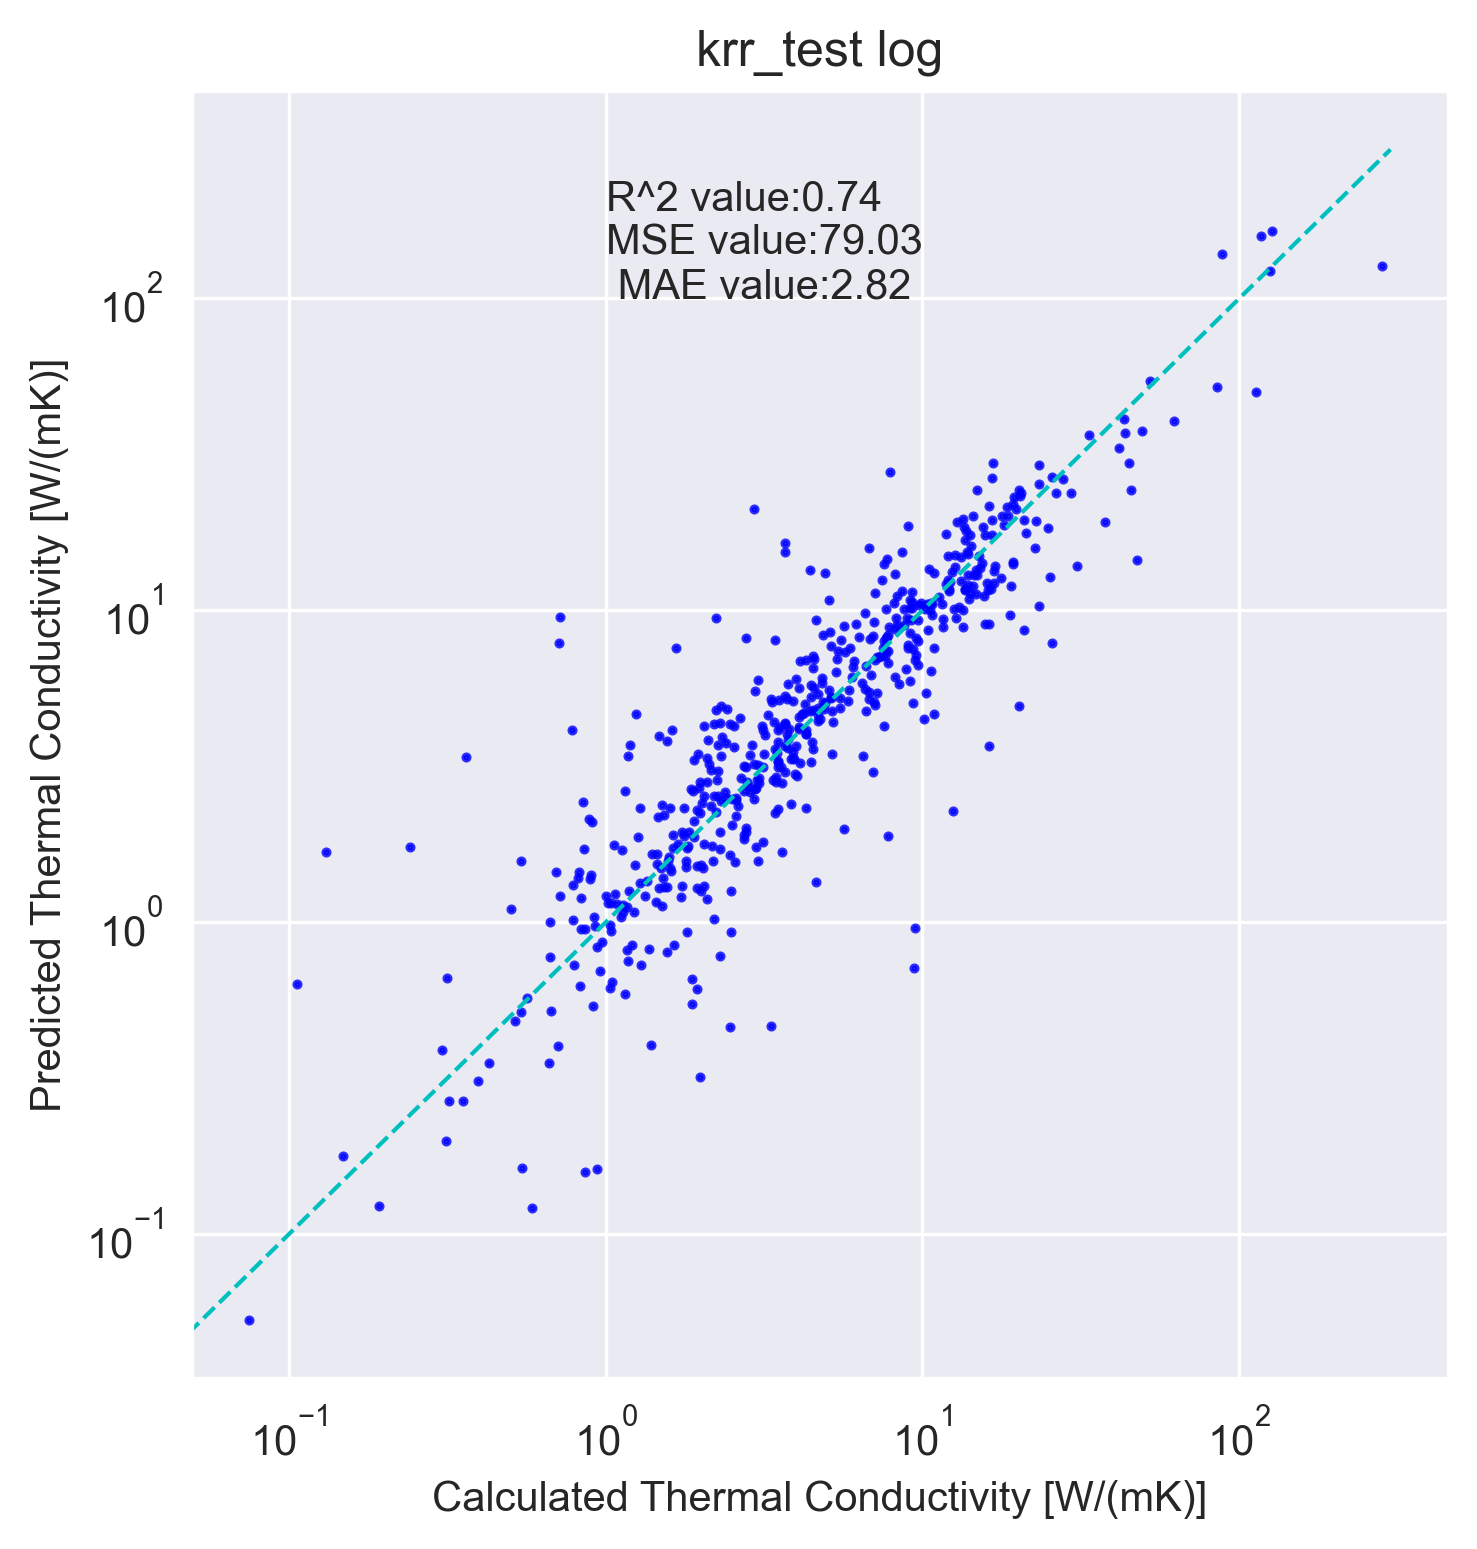

In [25]:
plot_log(y_test,y_test_predicted_krr,"krr_test")


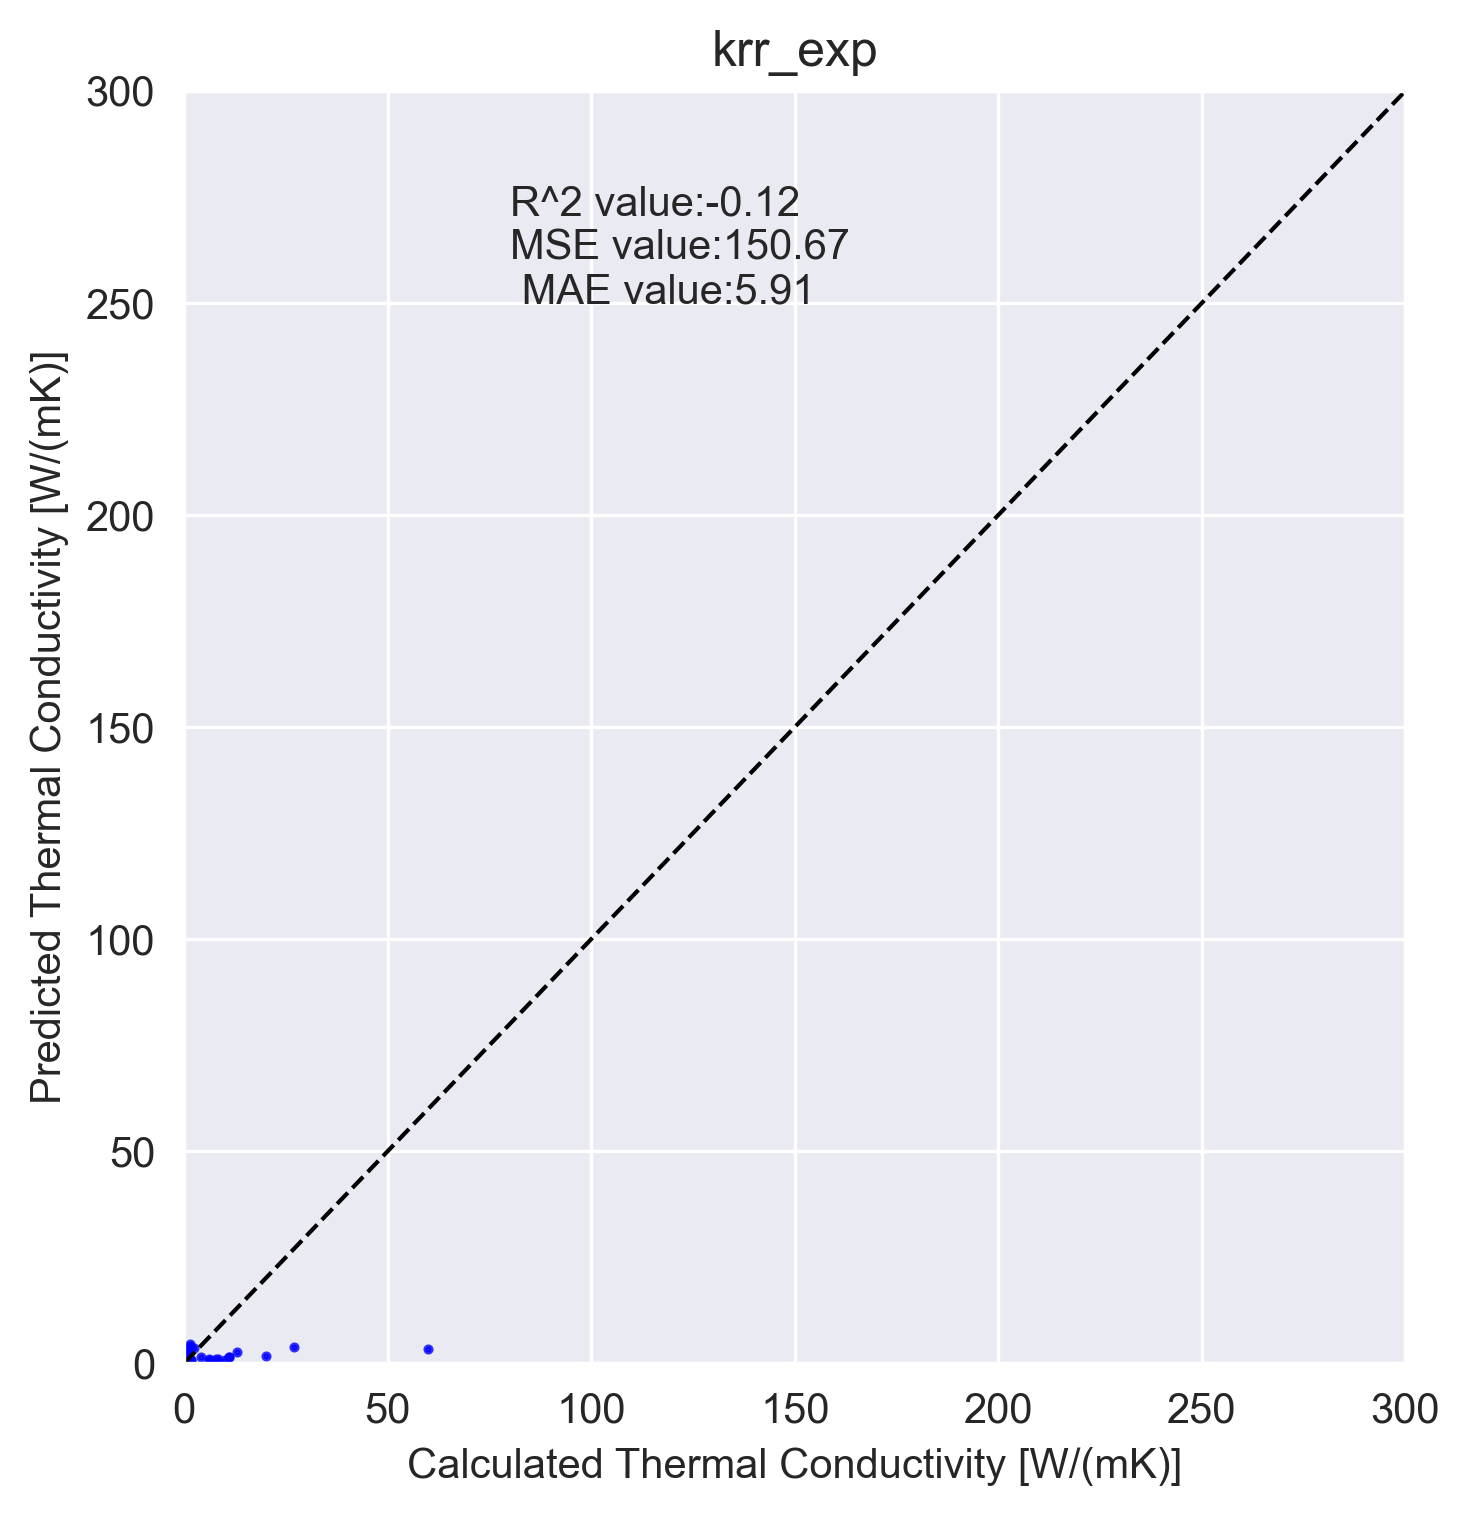

In [26]:
plot(exp_y_data, y_exp_predicted_krr, "krr_exp")

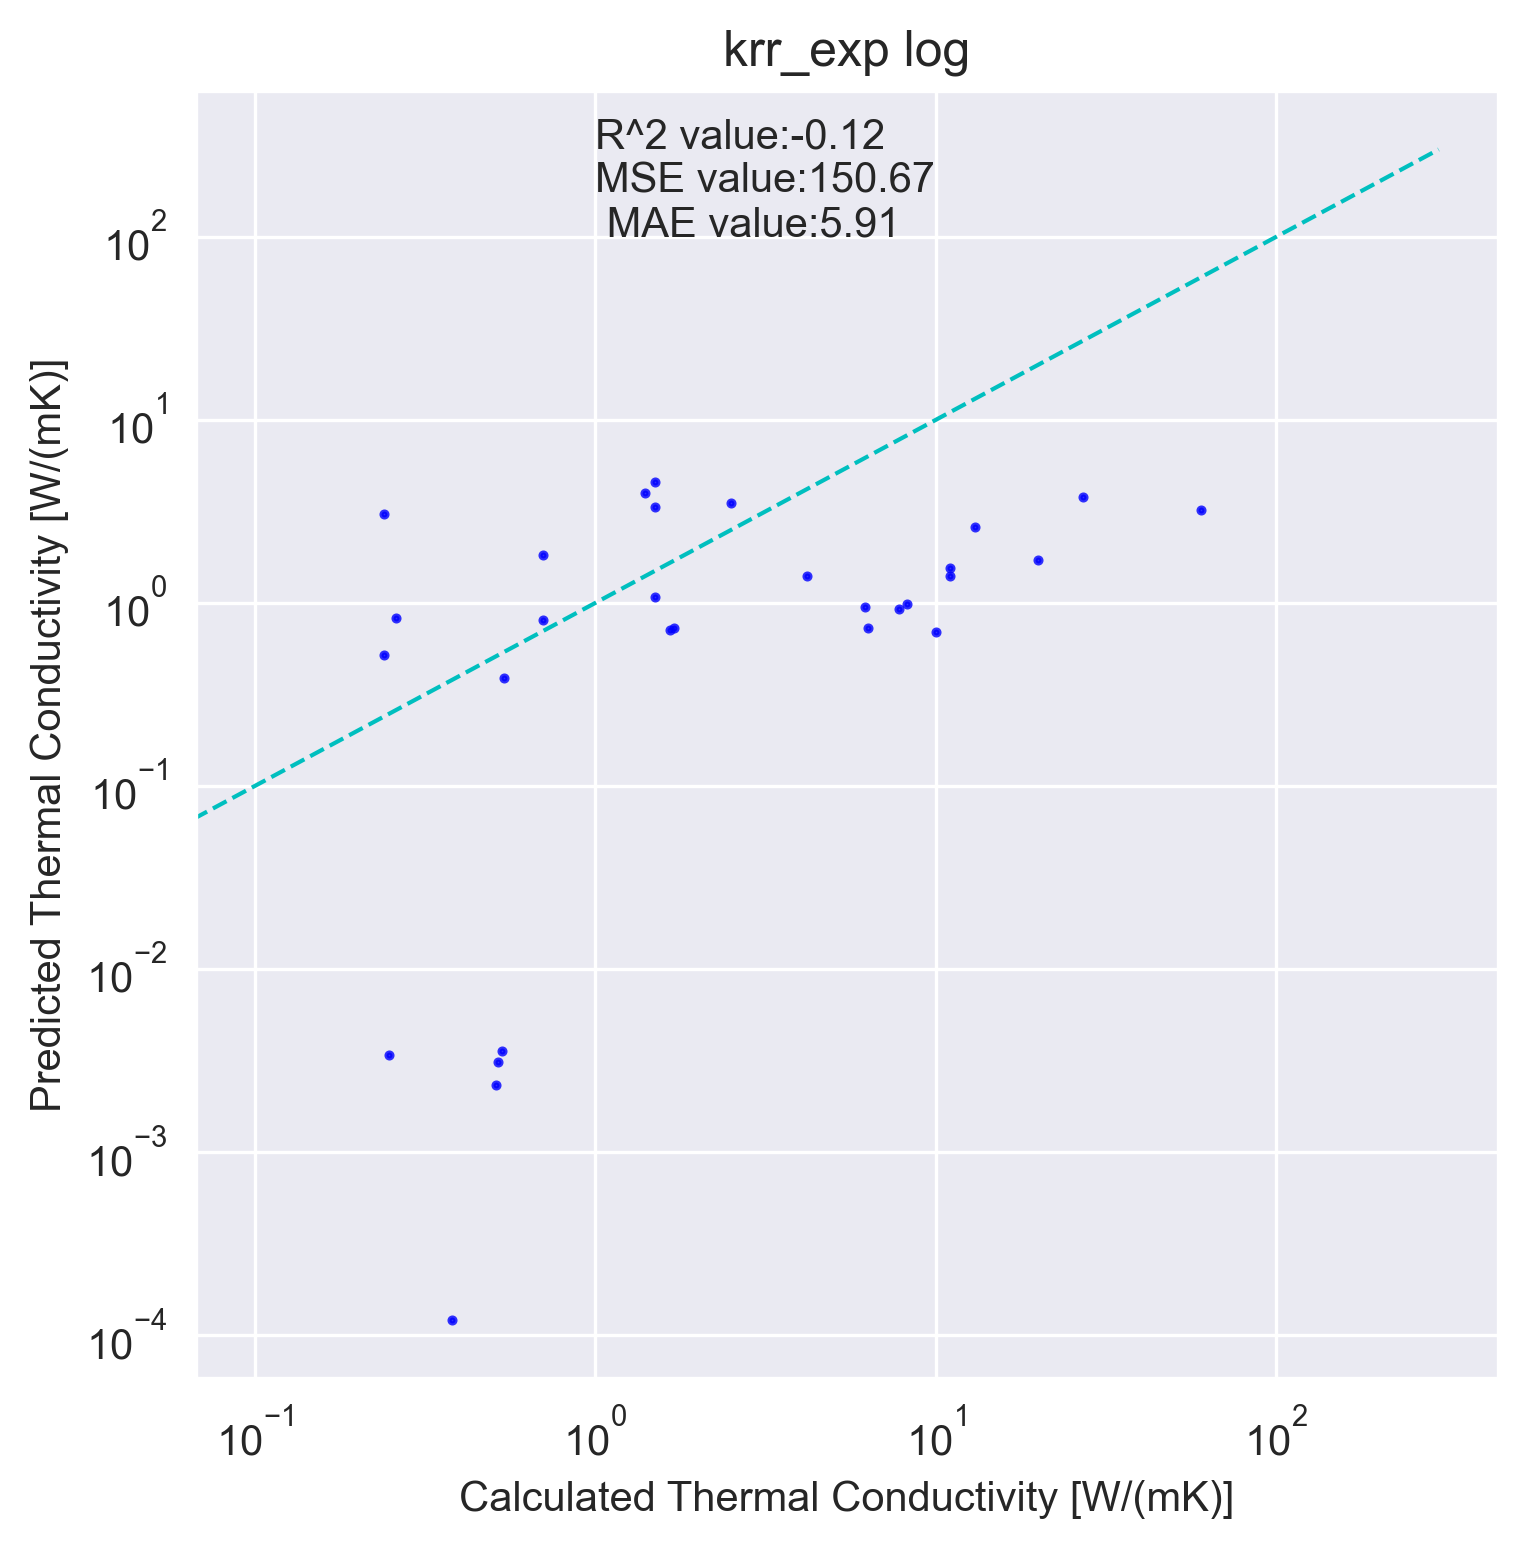

In [27]:
plot_log(exp_y_data, y_exp_predicted_krr, "krr_exp")

In [28]:
#sv = SVR()
#svr_predictor = GridSearchCV(sv, param_grid={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}, cv=10)
sv = SVR(kernel='rbf')
svr_predictor = GridSearchCV(sv, param_grid={"C": [0.1,1, 10, 100],
                                       "gamma": [1,0.1,0.01,0.001]}, cv=10)
## 'poly', 'sigmoid'
##fti_predict(svr_predictor)

In [29]:
#fti_predict(kr_predictor,x_train_transformed,y_train)
svr_predictor.fit(x_train_transformed,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [30]:
y_train_predicted_svr = svr_predictor.predict(x_train_transformed)

In [31]:
mse(y_train,y_train_predicted_svr)
#print("mean squared error of "+"kr_predictor"+ ' on training data is'+ mse(y_train,y_train_predicted_kr))

56.48648359646283

In [32]:
y_test_predicted_svr = svr_predictor.predict(x_test_transformed)
mse(y_test,y_test_predicted_svr)

95.37397769304371

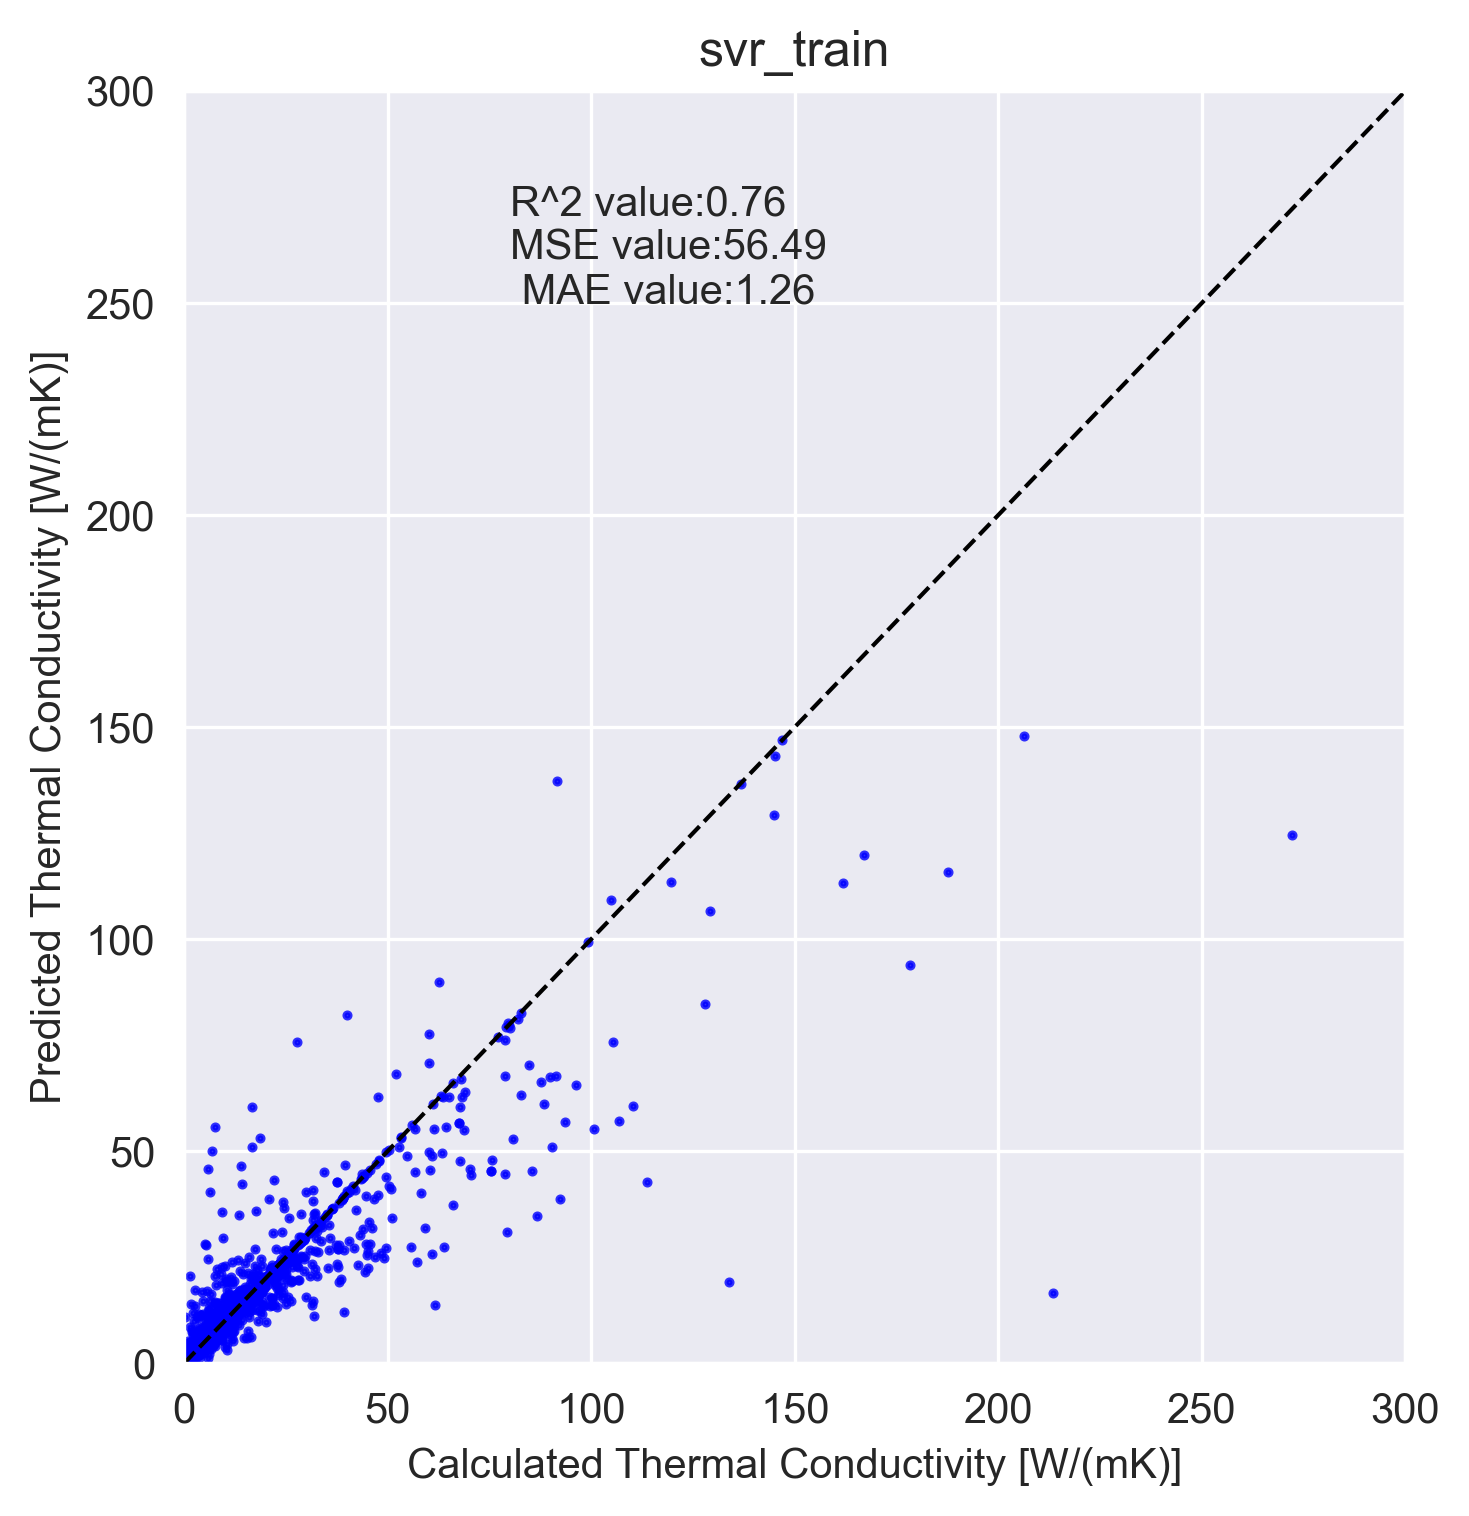

In [33]:
plot(y_train,y_train_predicted_svr,"svr_train")

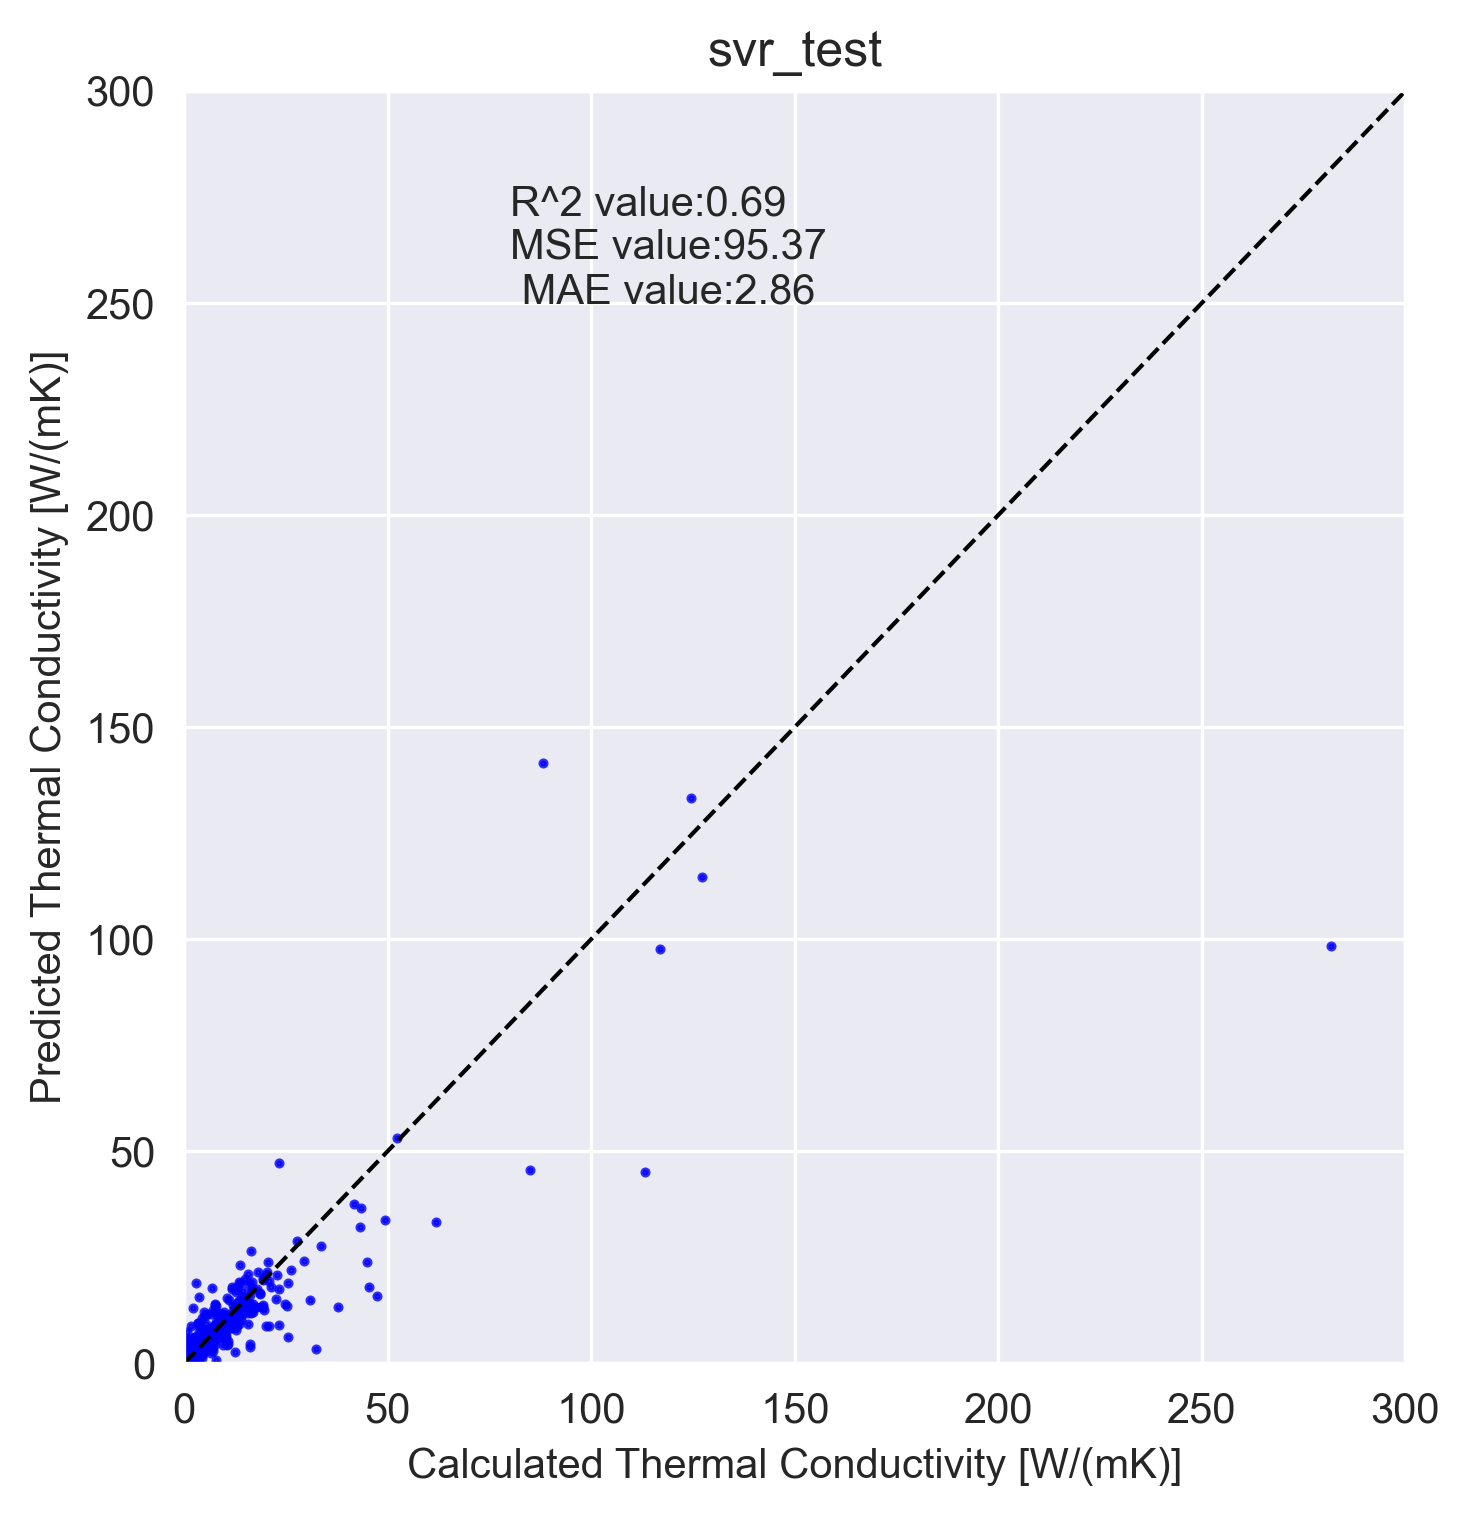

In [34]:
plot(y_test,y_test_predicted_svr,"svr_test")

In [35]:
cv_params = {'learning_rate': [0.01,0.02,0.03]}
other_params = {'learning_rate': 0.05, 'n_estimators': 1000,
                'max_depth': 5, 'min_child_weight': 3, 'seed': random_seed,
                'subsample': 0.8, 'colsample_bytree': 0.6, 'gamma': 0.1,
                'reg_alpha': 0.1, 'reg_lambda': 3}
model = xgb.XGBRegressor(objective='reg:squarederror', **other_params)
clf = GridSearchCV(model, param_grid=cv_params,
                   scoring='r2', cv=10, verbose=1)


In [36]:
clf.fit(x_train_transformed,y_train)



Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.6,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0.1, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.05, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=3, missing=nan,
                                    monotone_constraints=None,
                                    n_estimators=1000, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.02, 0.03]}, scoring='r2',
             verbose=1)

In [37]:
#clf.

In [38]:
y_train_predicted_xgb = clf.predict(x_train_transformed)

In [39]:
mse(y_train,y_train_predicted_xgb)
#print("mean squared error of "+"kr_predictor"+ ' on training data is'+ mse(y_train,y_train_predicted_kr))

6.219001735720091

In [40]:
y_test_predicted = clf.predict(x_test_transformed)
mse(y_test,y_test_predicted)


35.22053830828762

In [41]:
y_exp_predicted_xgb = clf.predict(x_exp_transformed)
mse(exp_y_data,y_exp_predicted_xgb)

150.64446423080253

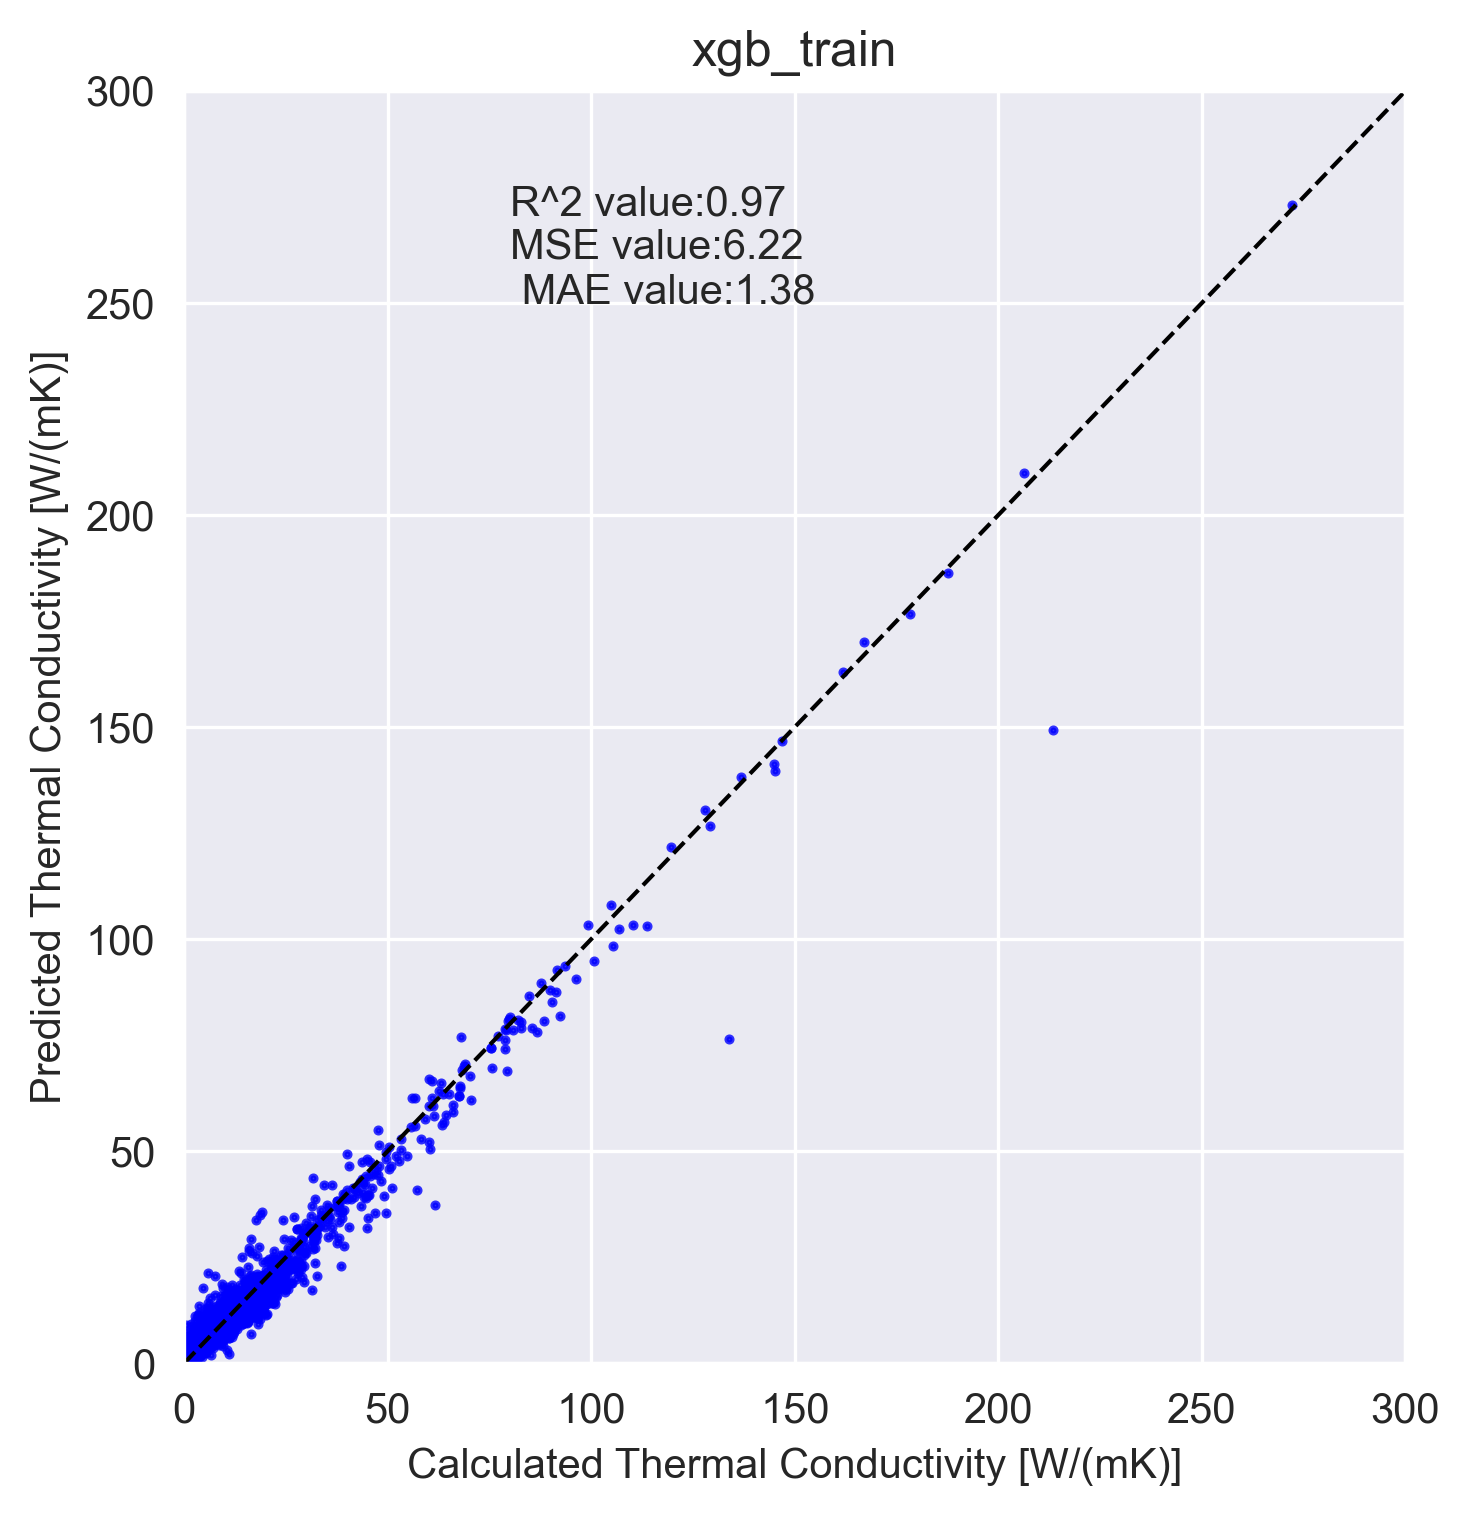

In [42]:
plot(y_train,y_train_predicted_xgb,"xgb_train")

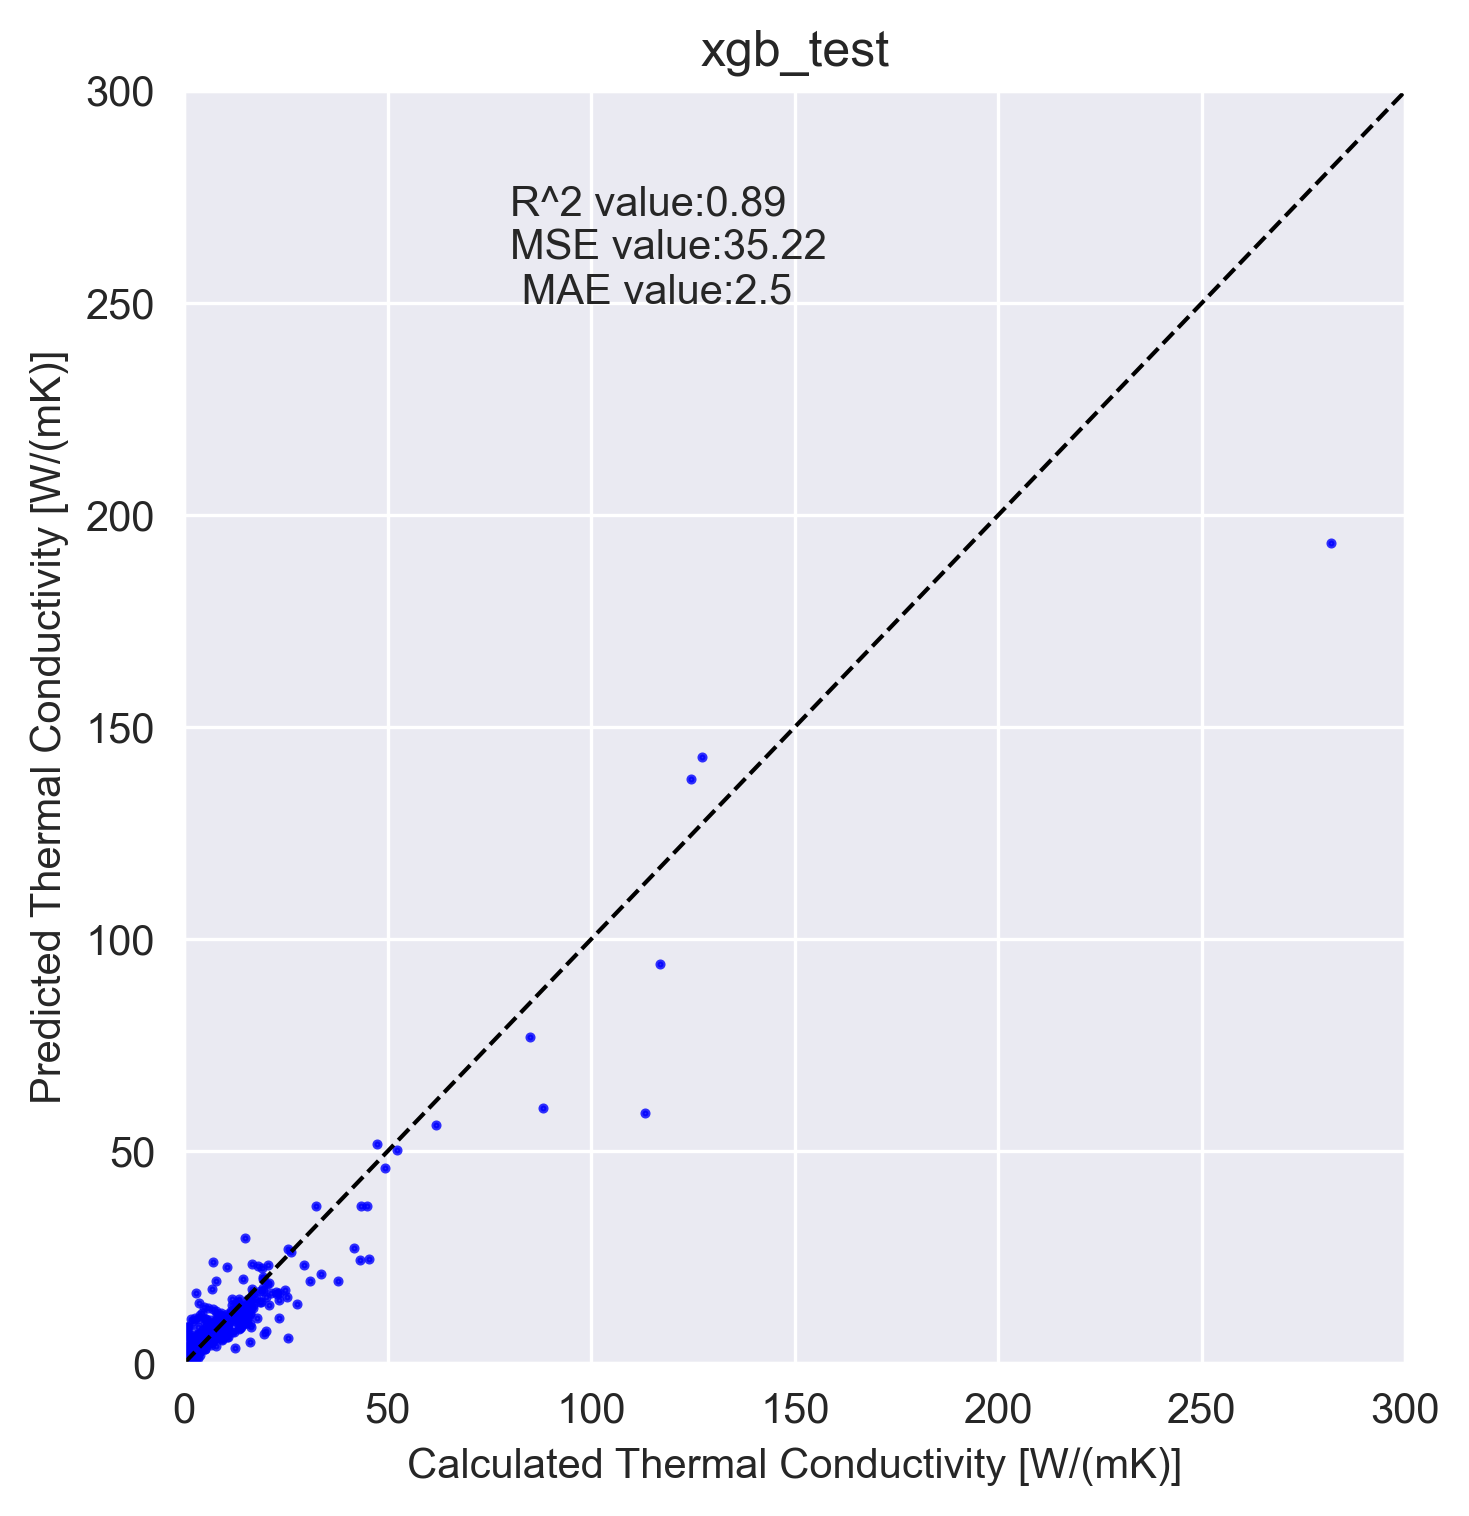

In [43]:
plot(y_test,y_test_predicted,"xgb_test")

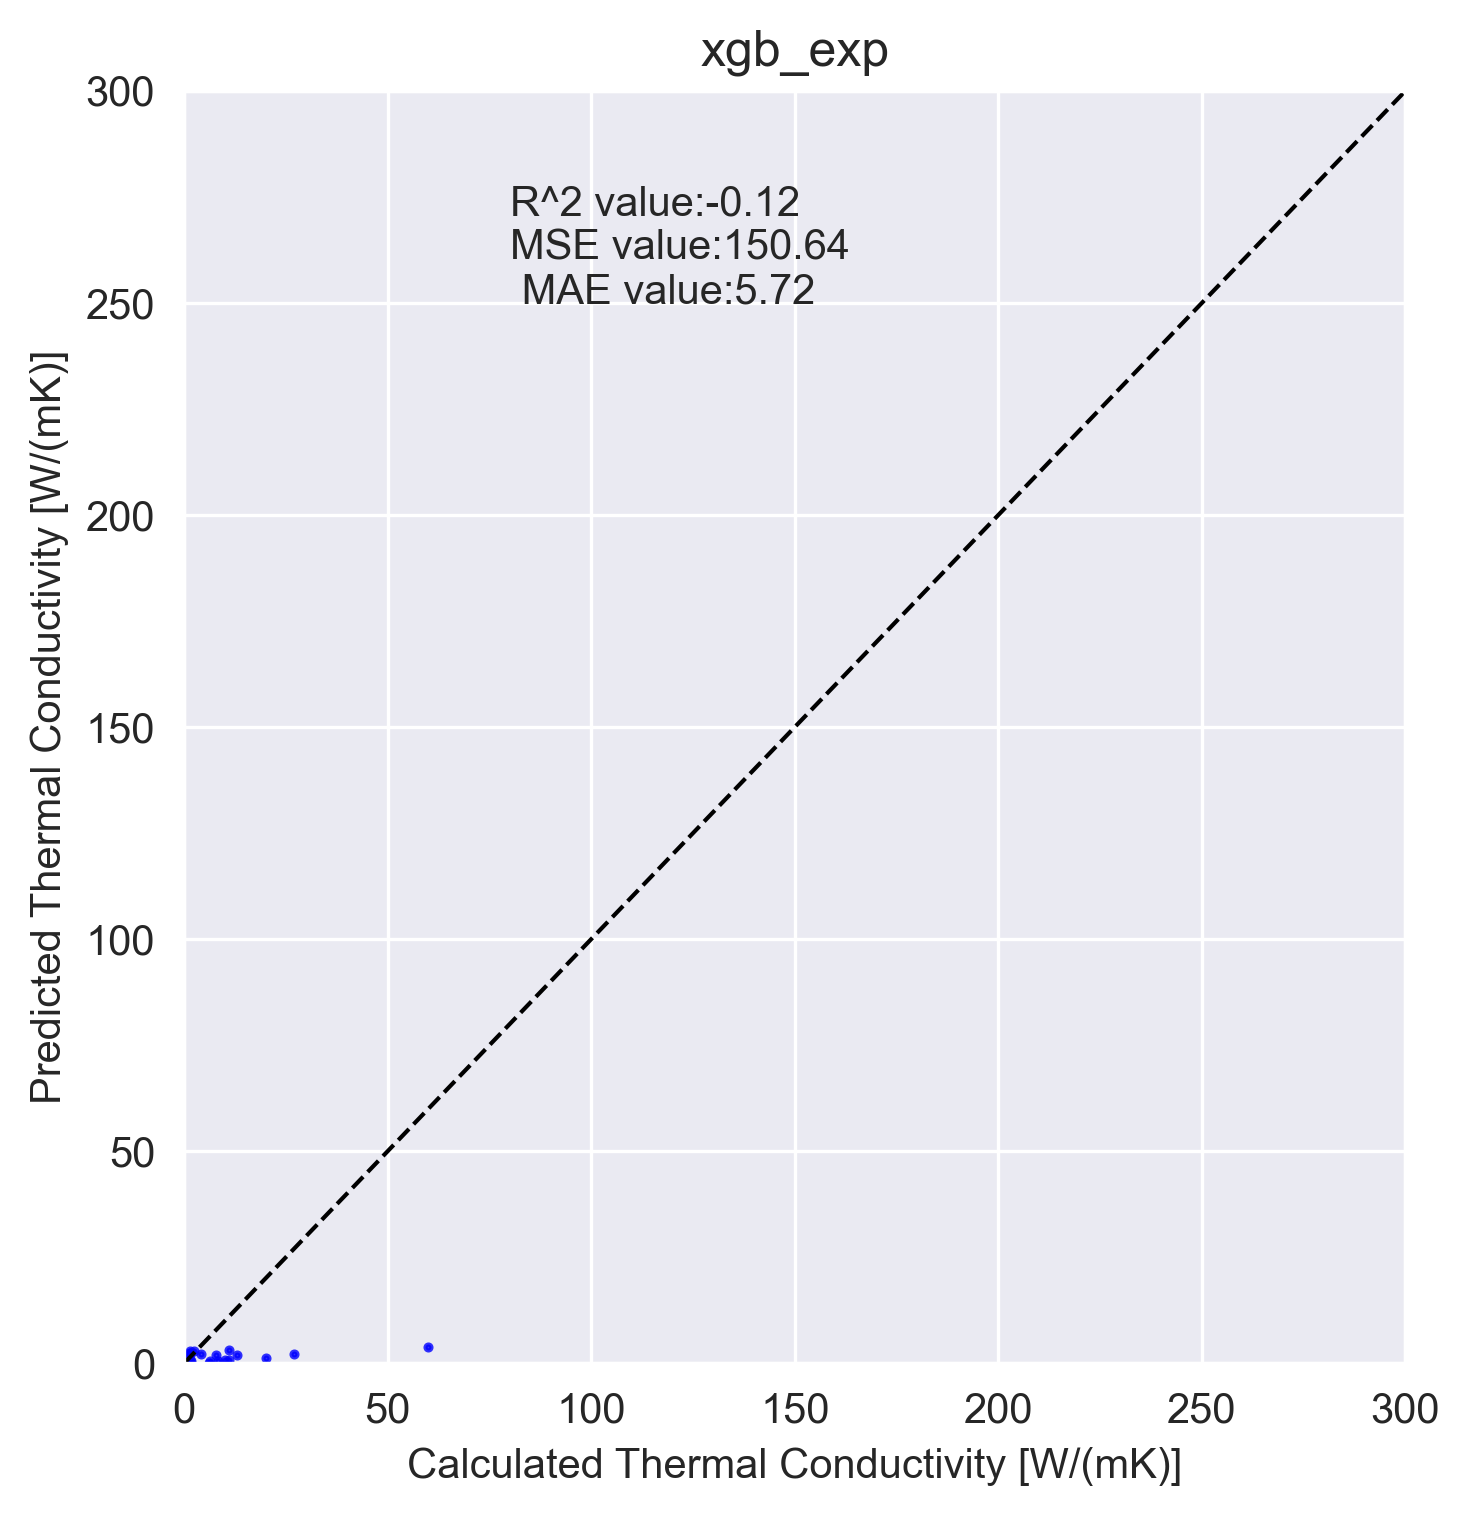

In [44]:
plot(exp_y_data,y_exp_predicted_xgb,"xgb_exp")

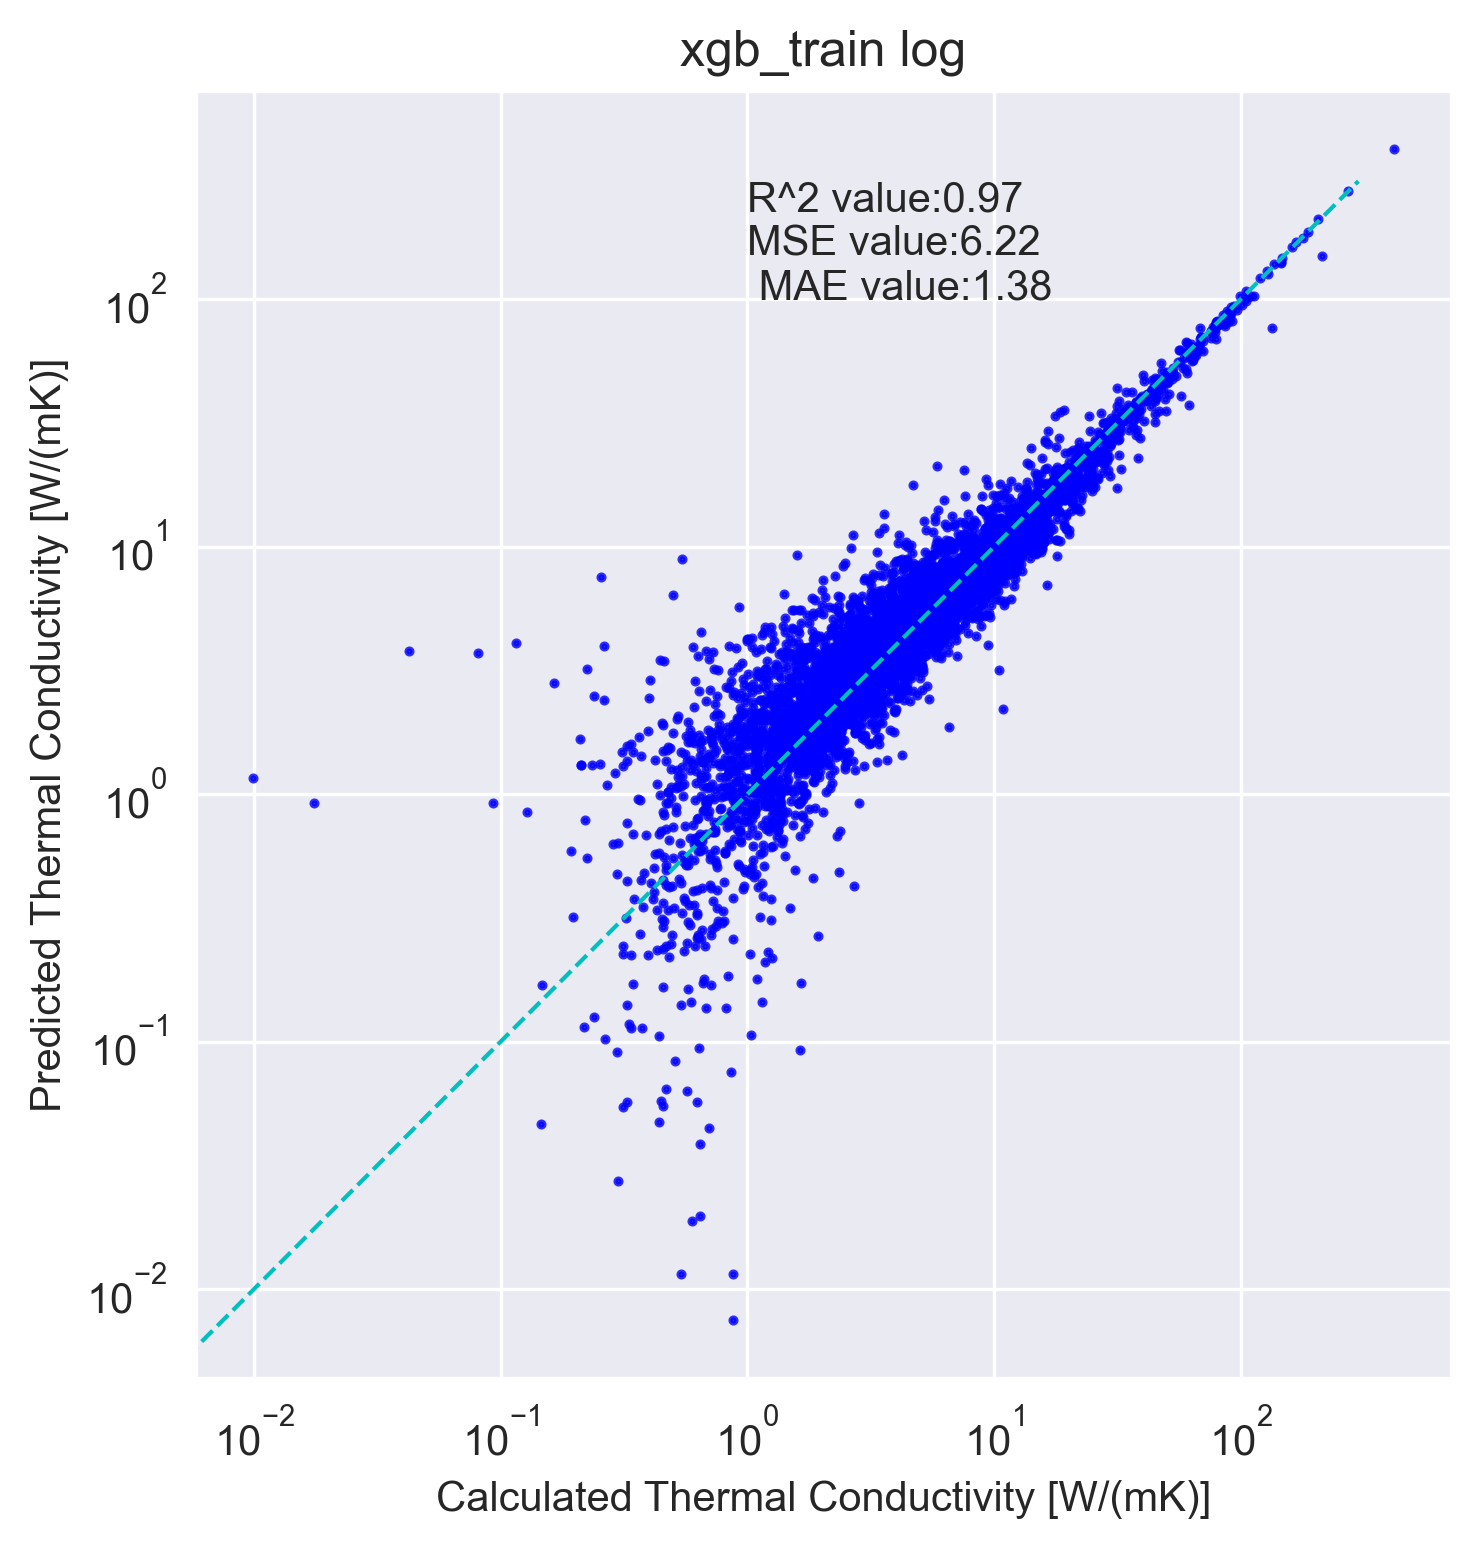

In [45]:
plot_log(y_train, y_train_predicted_xgb, "xgb_train")

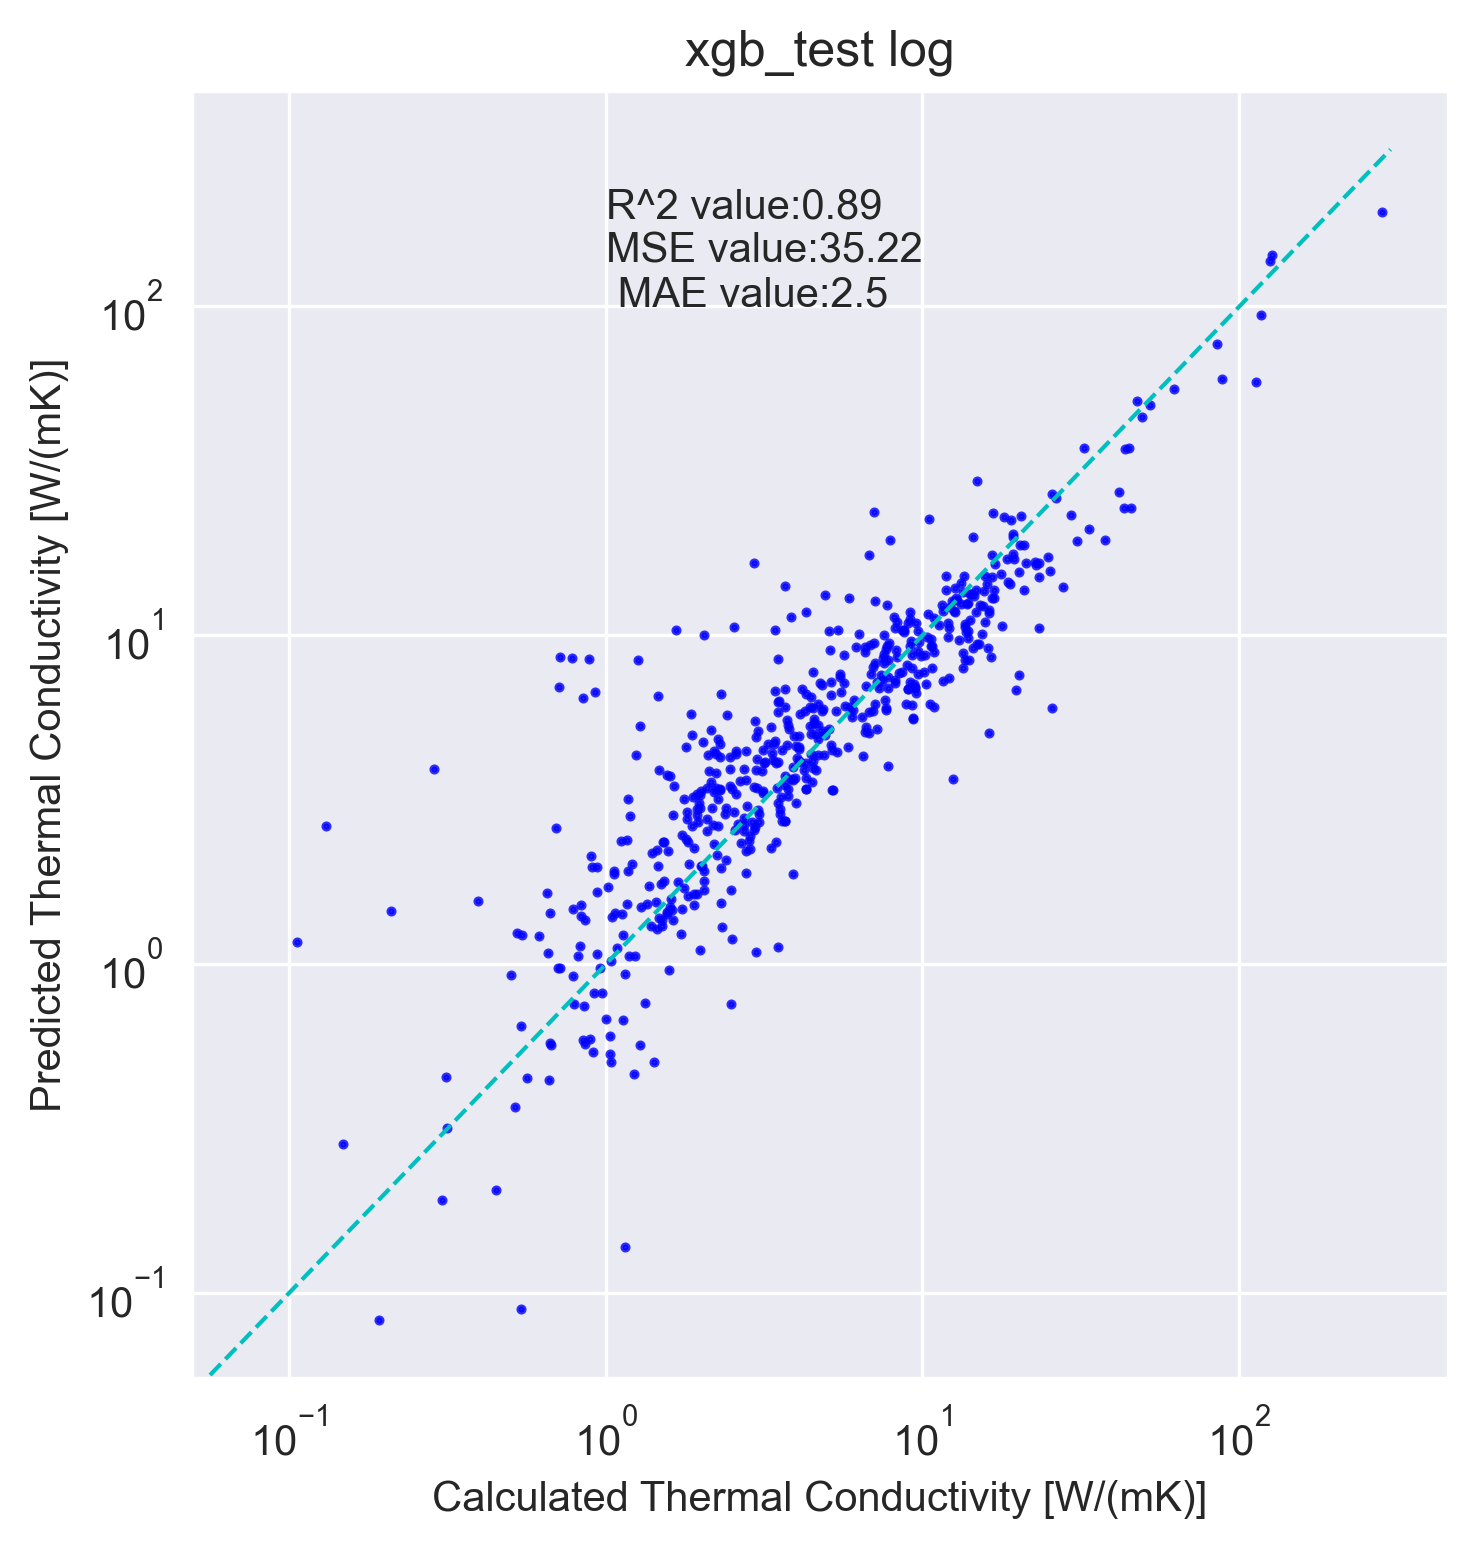

In [46]:
plot_log(y_test, y_test_predicted, "xgb_test")

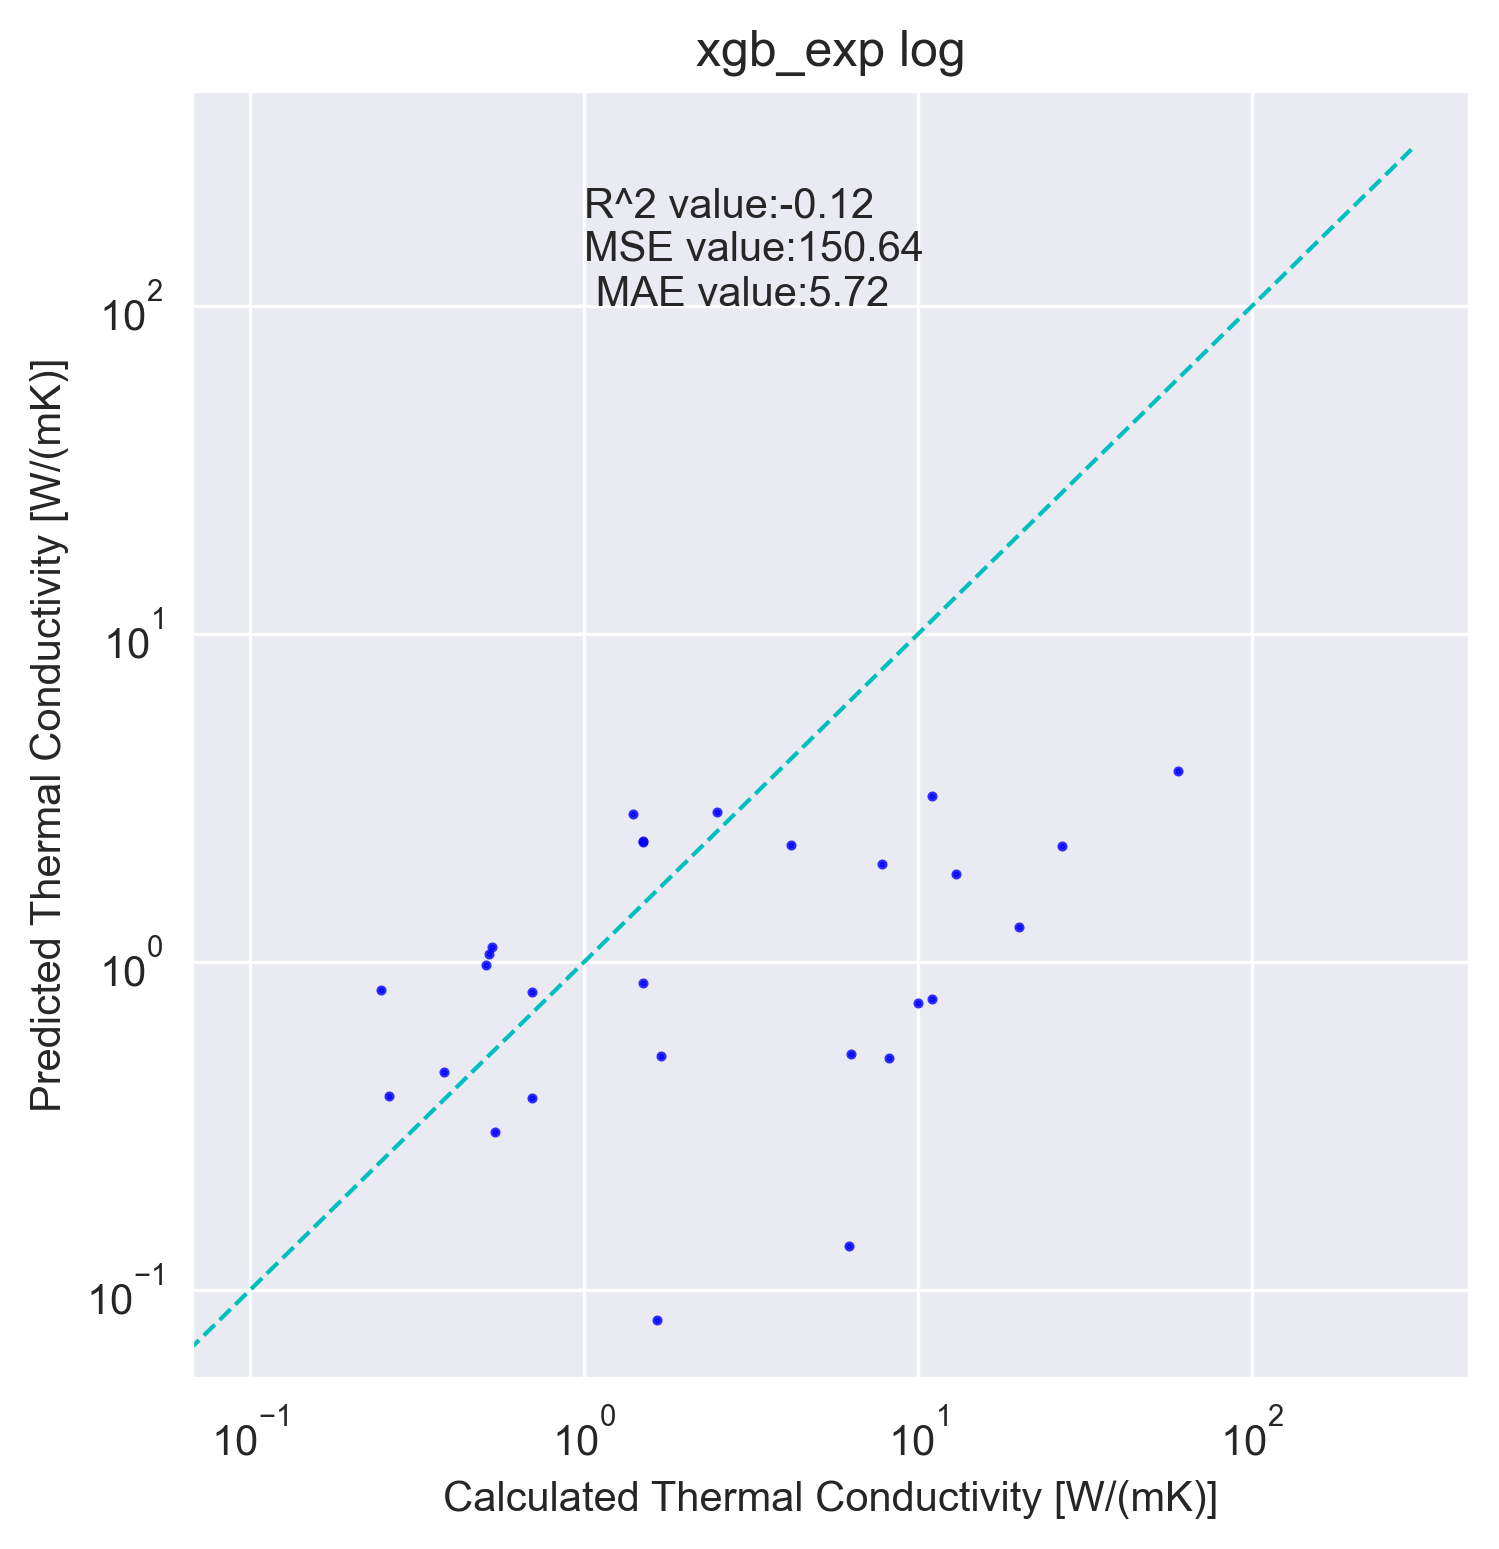

In [47]:
plot_log(exp_y_data, y_exp_predicted_xgb, "xgb_exp")

In [48]:
errors = []
for i,j in zip(exp_y_data, y_exp_predicted_xgb):
    errors.append(abs(i-j))
errors

[1.2028134846687317,
 0.5809559535980224,
 1.4282907009124757,
 0.23686451554298404,
 0.31584255099296565,
 0.45358750760555266,
 0.42995580077171325,
 0.13122501015663146,
 0.8285181522369385,
 56.16659593582153,
 0.469608952999115,
 0.57804802942276,
 0.08189740300178527,
 0.5425059862136841,
 10.227990925312042,
 11.141563892364502,
 24.737788438796997,
 0.6343584656715393,
 1.9030703830718991,
 0.8433041572570801,
 7.795051574707031,
 0.3752024173736572,
 6.064069625735283,
 7.690571916103362,
 5.810132789611816,
 1.1833663702011108,
 5.775600719451904,
 9.248401880264282,
 18.72292125225067,
 0.11064307689666752,
 1.5786554253101348]

In [49]:
y_test_predicted

array([ 3.73088574e+00,  3.18810964e+00,  1.19347715e+00,  2.70943928e+00,
       -5.69042087e-01,  2.76996708e+00,  1.27734351e+00,  2.90489459e+00,
        1.38021812e-01,  1.89924610e+00,  9.19147301e+00,  3.89677119e+00,
        3.62323809e+00,  7.62556195e-01,  1.13786726e+01,  1.63596764e+01,
        2.84152818e+00,  4.49950361e+00,  1.29931002e+01,  2.11295776e+01,
        2.90443373e+00,  2.33963346e+00,  4.10921907e+00,  9.42463531e+01,
        2.63025188e+00,  1.36877084e+00,  1.37673035e+02,  2.60466766e+00,
       -1.76499784e-02,  1.21719050e+00, -3.90225857e-01,  1.12413263e+00,
        1.03428535e+01,  4.34919930e+00,  3.47674656e+00,  1.47650802e+00,
        2.72158833e+01,  5.49422550e+00,  1.66066086e+00,  2.94230700e+00,
        1.70709085e+00,  2.36858988e+00,  5.16718674e+01,  1.87848454e+01,
        3.69836693e+01,  1.16380053e+01,  5.84448481e+00,  2.63288736e+00,
        3.96380901e+00,  4.44355631e+00,  7.22499752e+00,  3.17823124e+00,
        5.06357479e+00,  

In [50]:

errors_list = errors
value = 5.72

how_many_less = len([i for i in errors_list if i < value])

print(how_many_less)

20


In [51]:
how_many_less/len(errors)

0.6451612903225806

In [52]:
errors = []
for i, j in zip(y_test, y_test_predicted):
    errors.append(abs(i - j))
errors
y_test_predicted

errors_list = errors
value = 2.5

how_many_less = len([i for i in errors_list if i < value])

print(how_many_less)
how_many_less / len(errors)

427


0.7530864197530864

<Axes: >

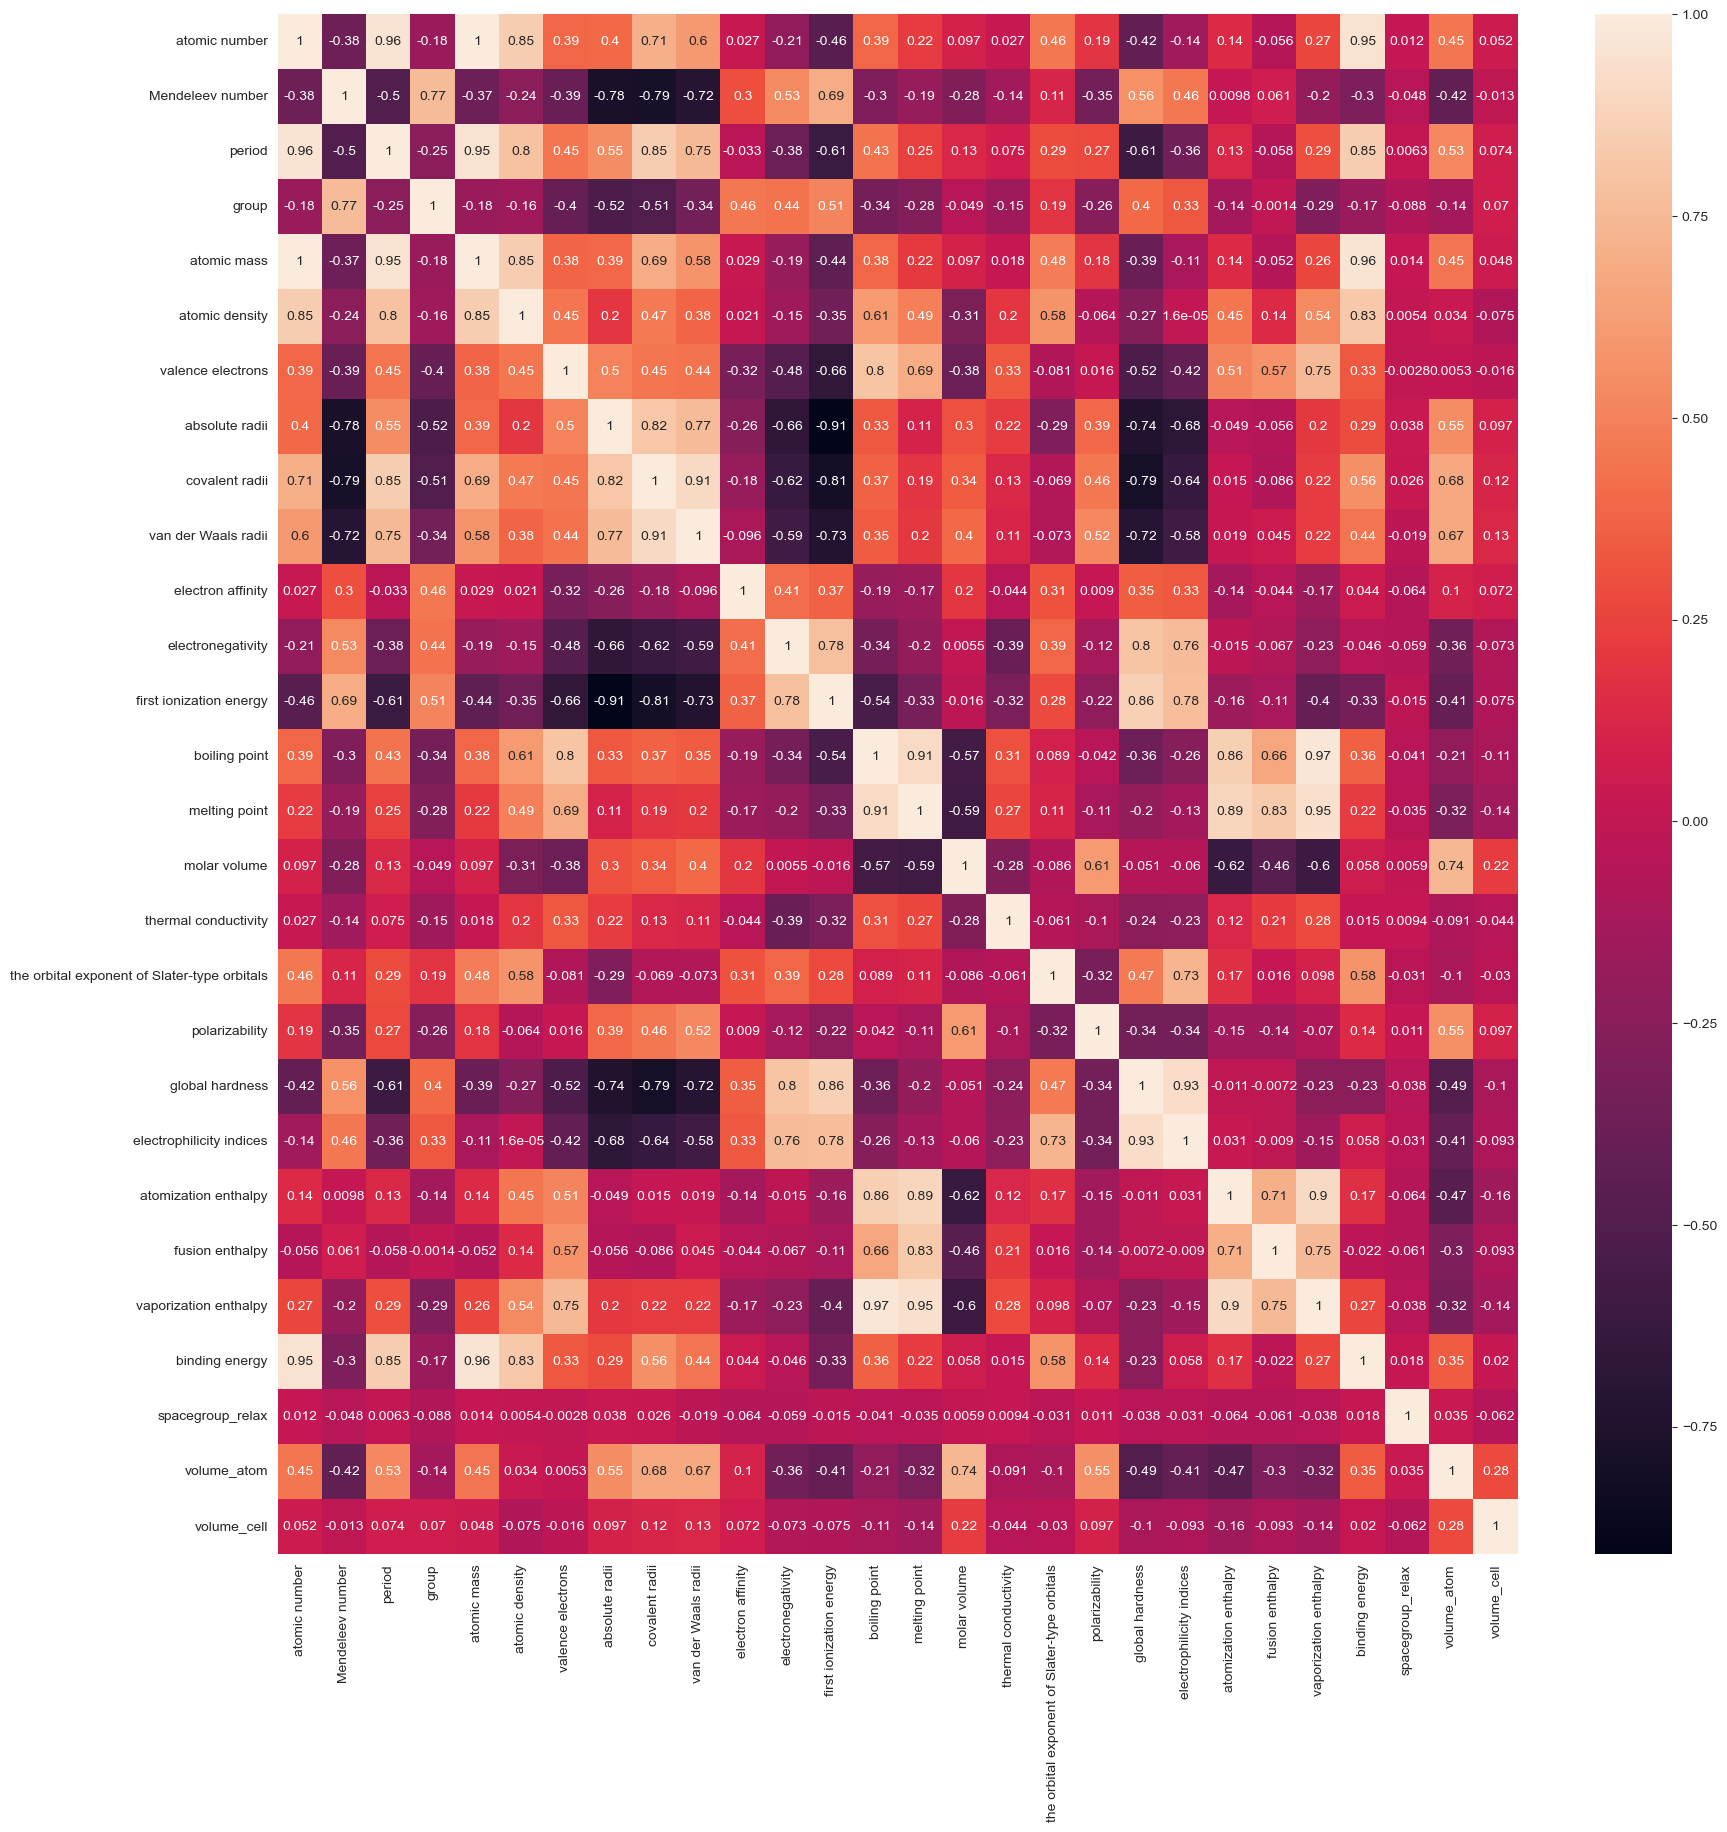

In [53]:
plt.figure(figsize = (20, 20))
sns.heatmap(x_data.corr(), annot = True)

In [82]:
#sns.pairplot(x_data)

In [83]:


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=random_seed)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
lasso_predicror = GridSearchCV( \
    lasso, grid, scoring='neg_mean_absolute_error', \
    cv=cv, n_jobs=-1)

In [84]:

lasso_predicror.fit(x_train_transformed, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=4844),
             estimator=Lasso(), n_jobs=-1, param_grid={},
             scoring='neg_mean_absolute_error')

In [85]:
y_train_predicted_lasso = lasso_predicror.predict(x_train_transformed)
mse(y_train, y_train_predicted_lasso)

154.8223604907786

In [86]:
y_test_predicted_lasso = lasso_predicror.predict(x_test_transformed)
mse(y_test, y_test_predicted_lasso)

205.23767182454776

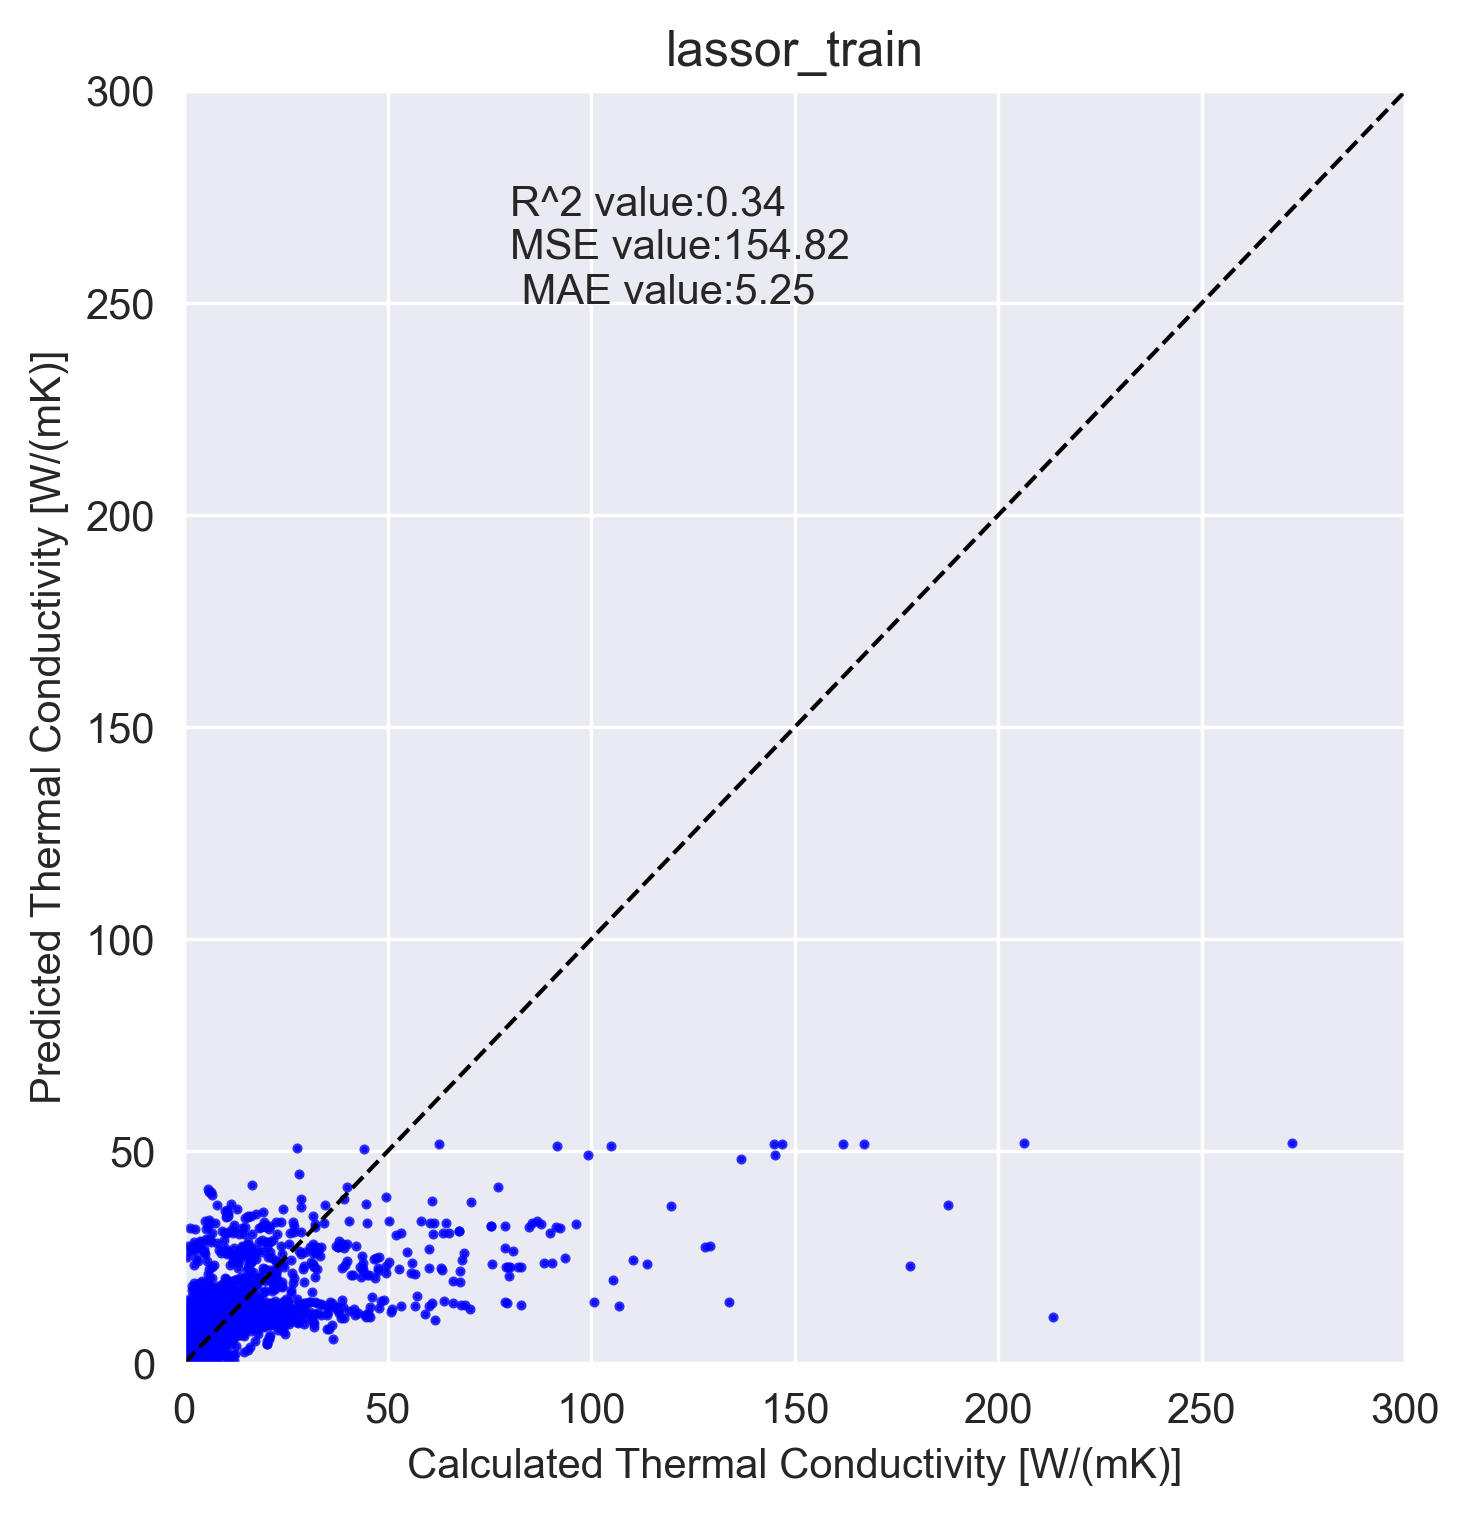

In [88]:
plot(y_train, y_train_predicted_lasso, "lassor_train")

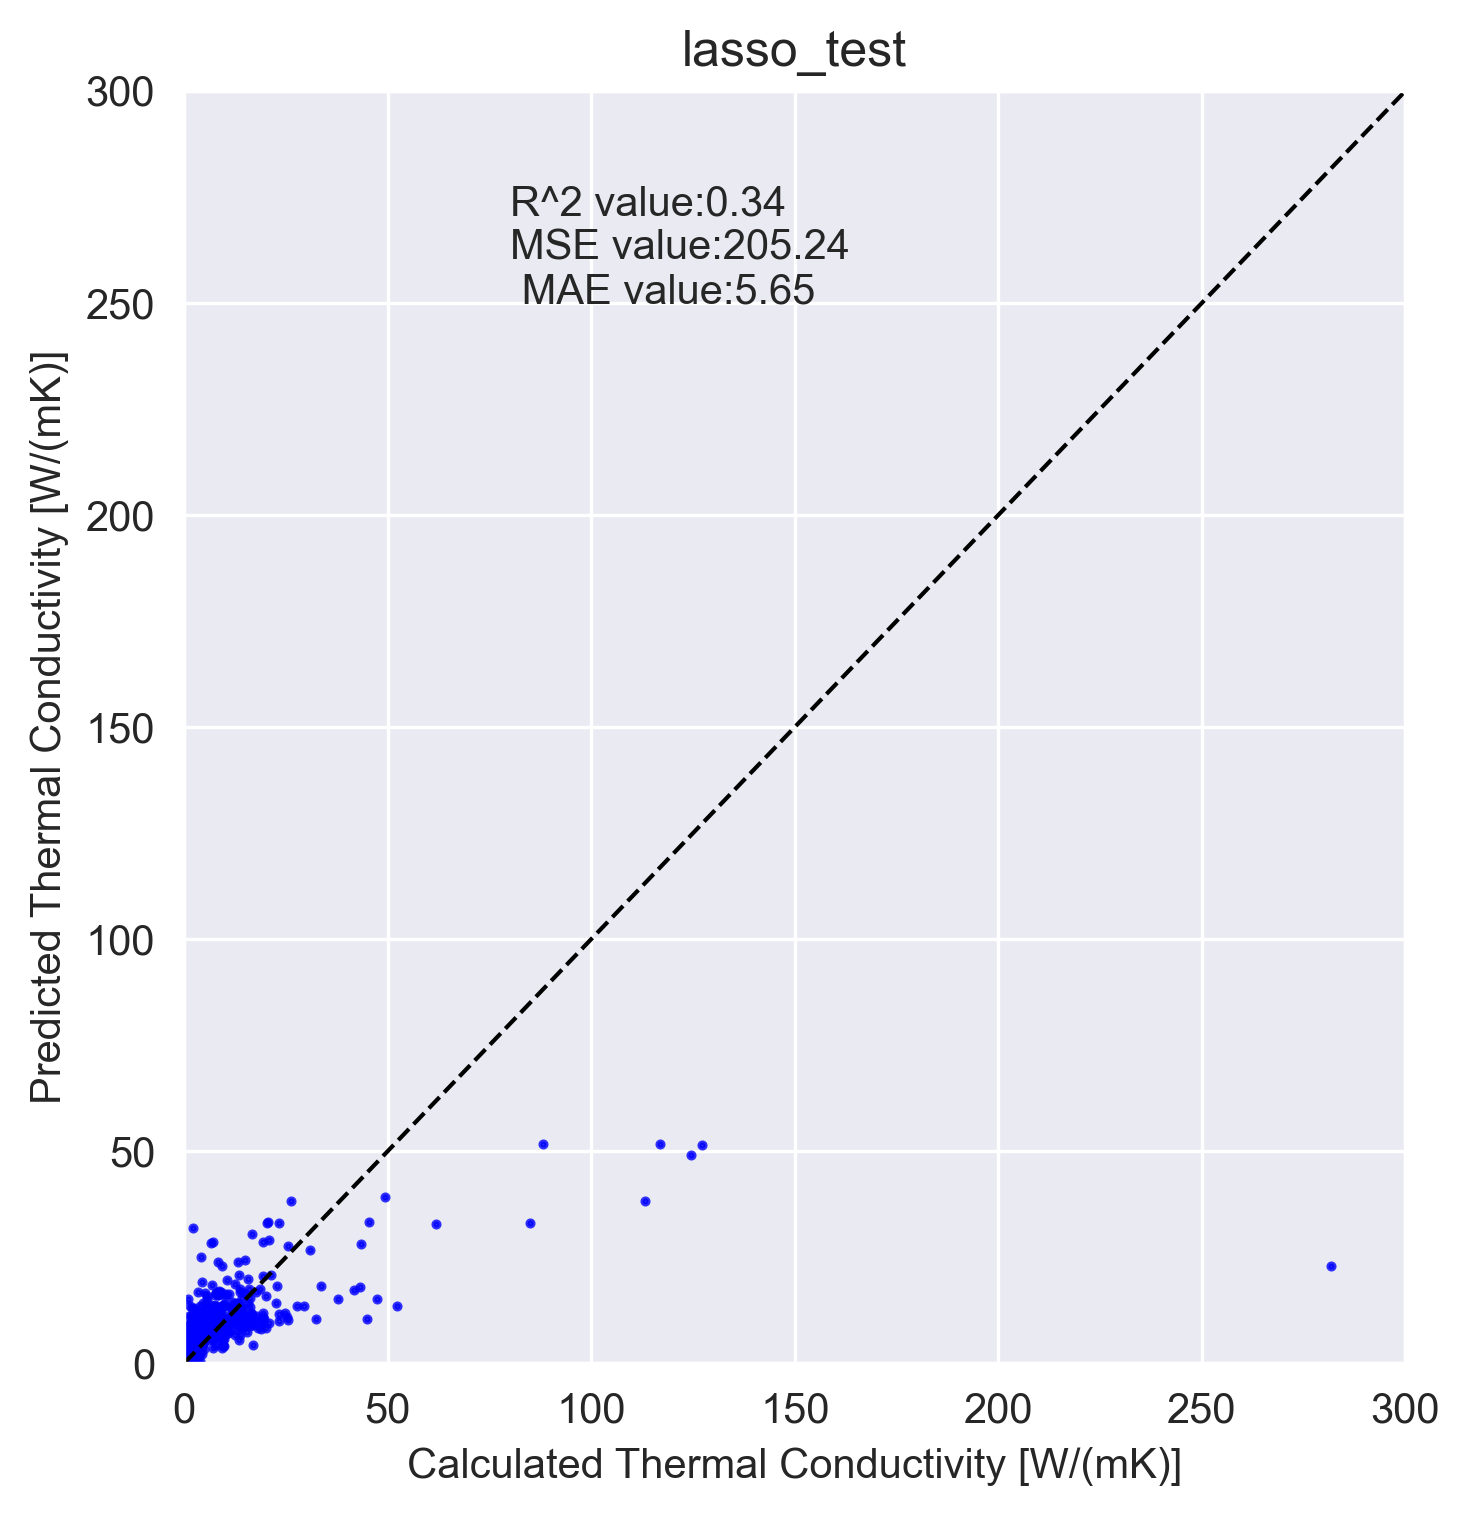

In [89]:
plot(y_test, y_test_predicted_lasso,'lasso_test')

In [90]:
rfr = RandomForestRegressor()



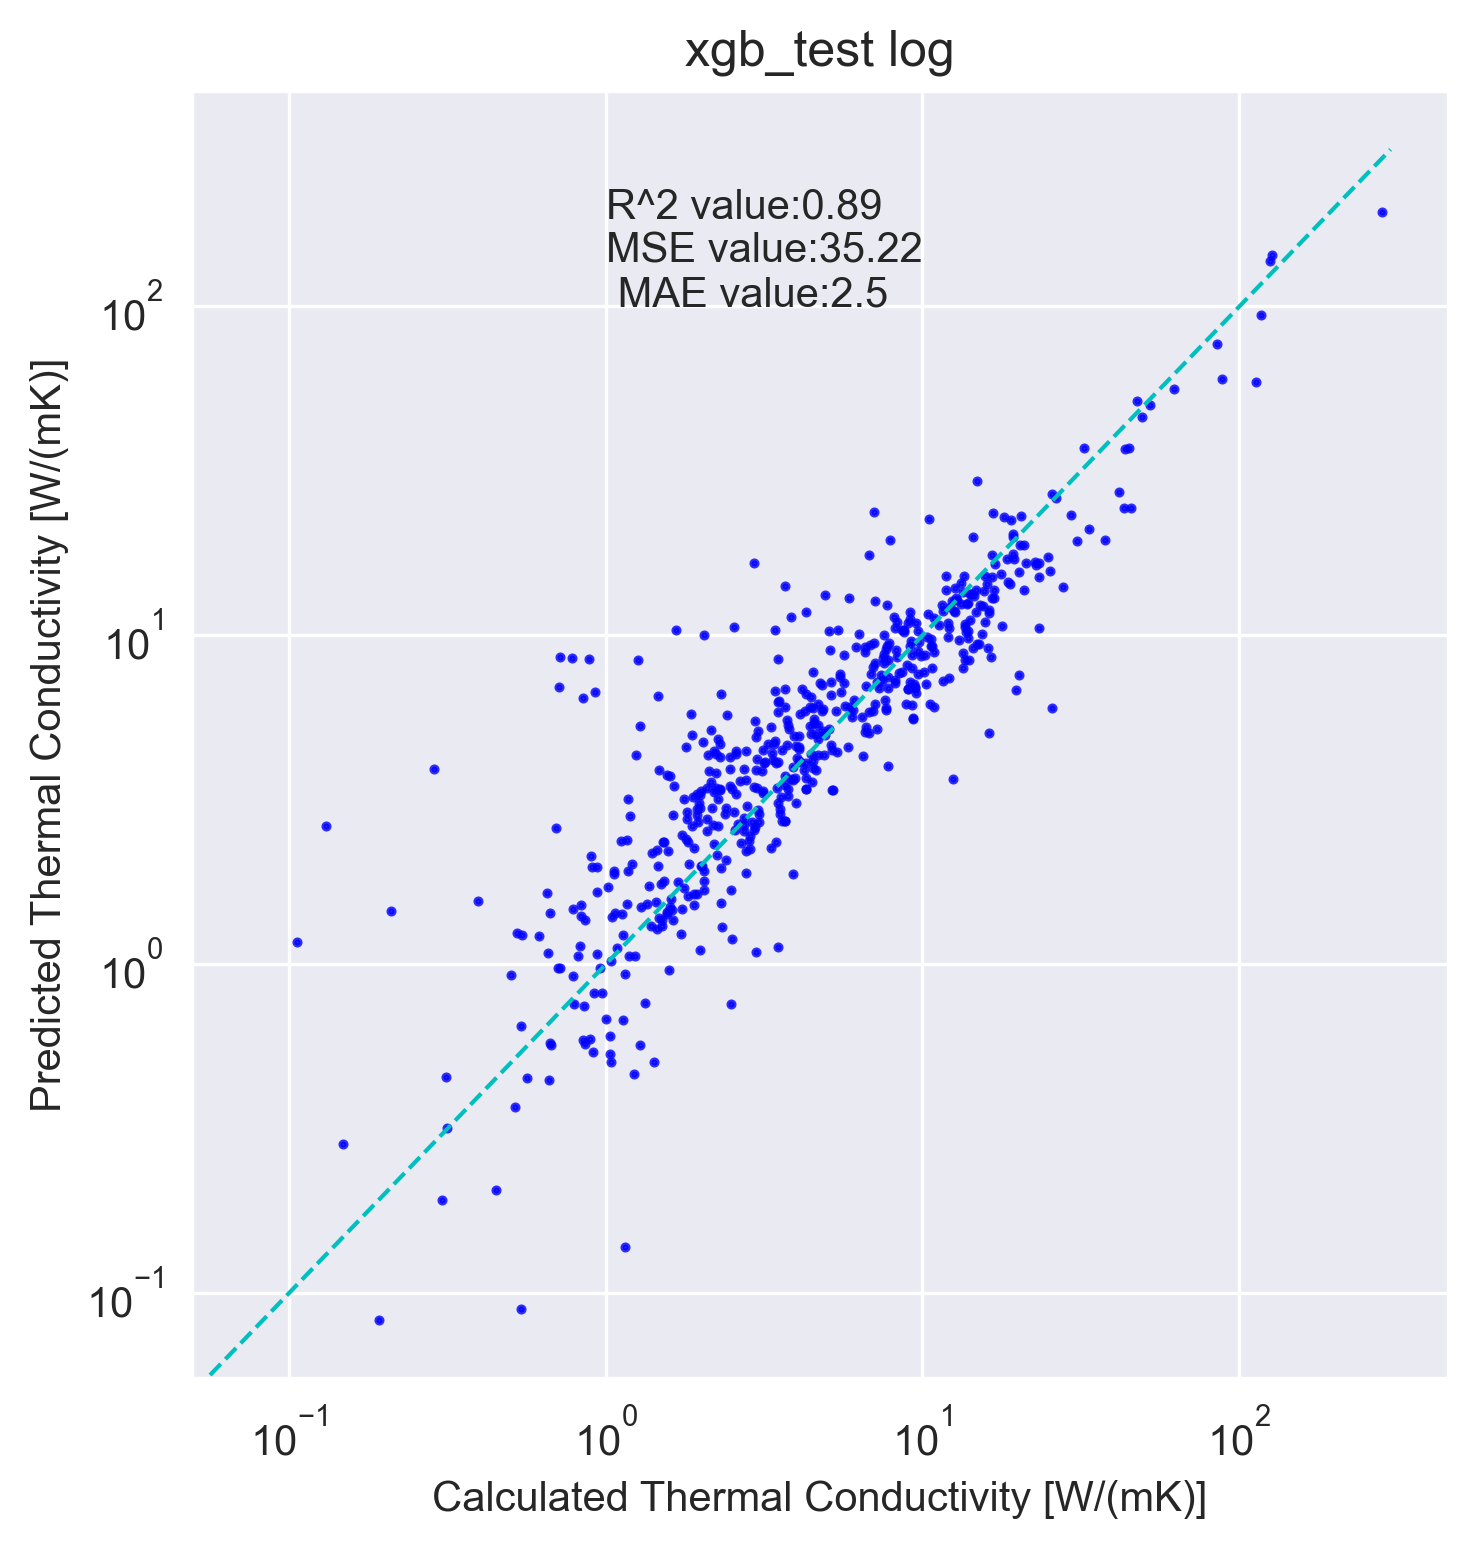

In [91]:
plot_log(y_test,y_test_predicted,"xgb_test")

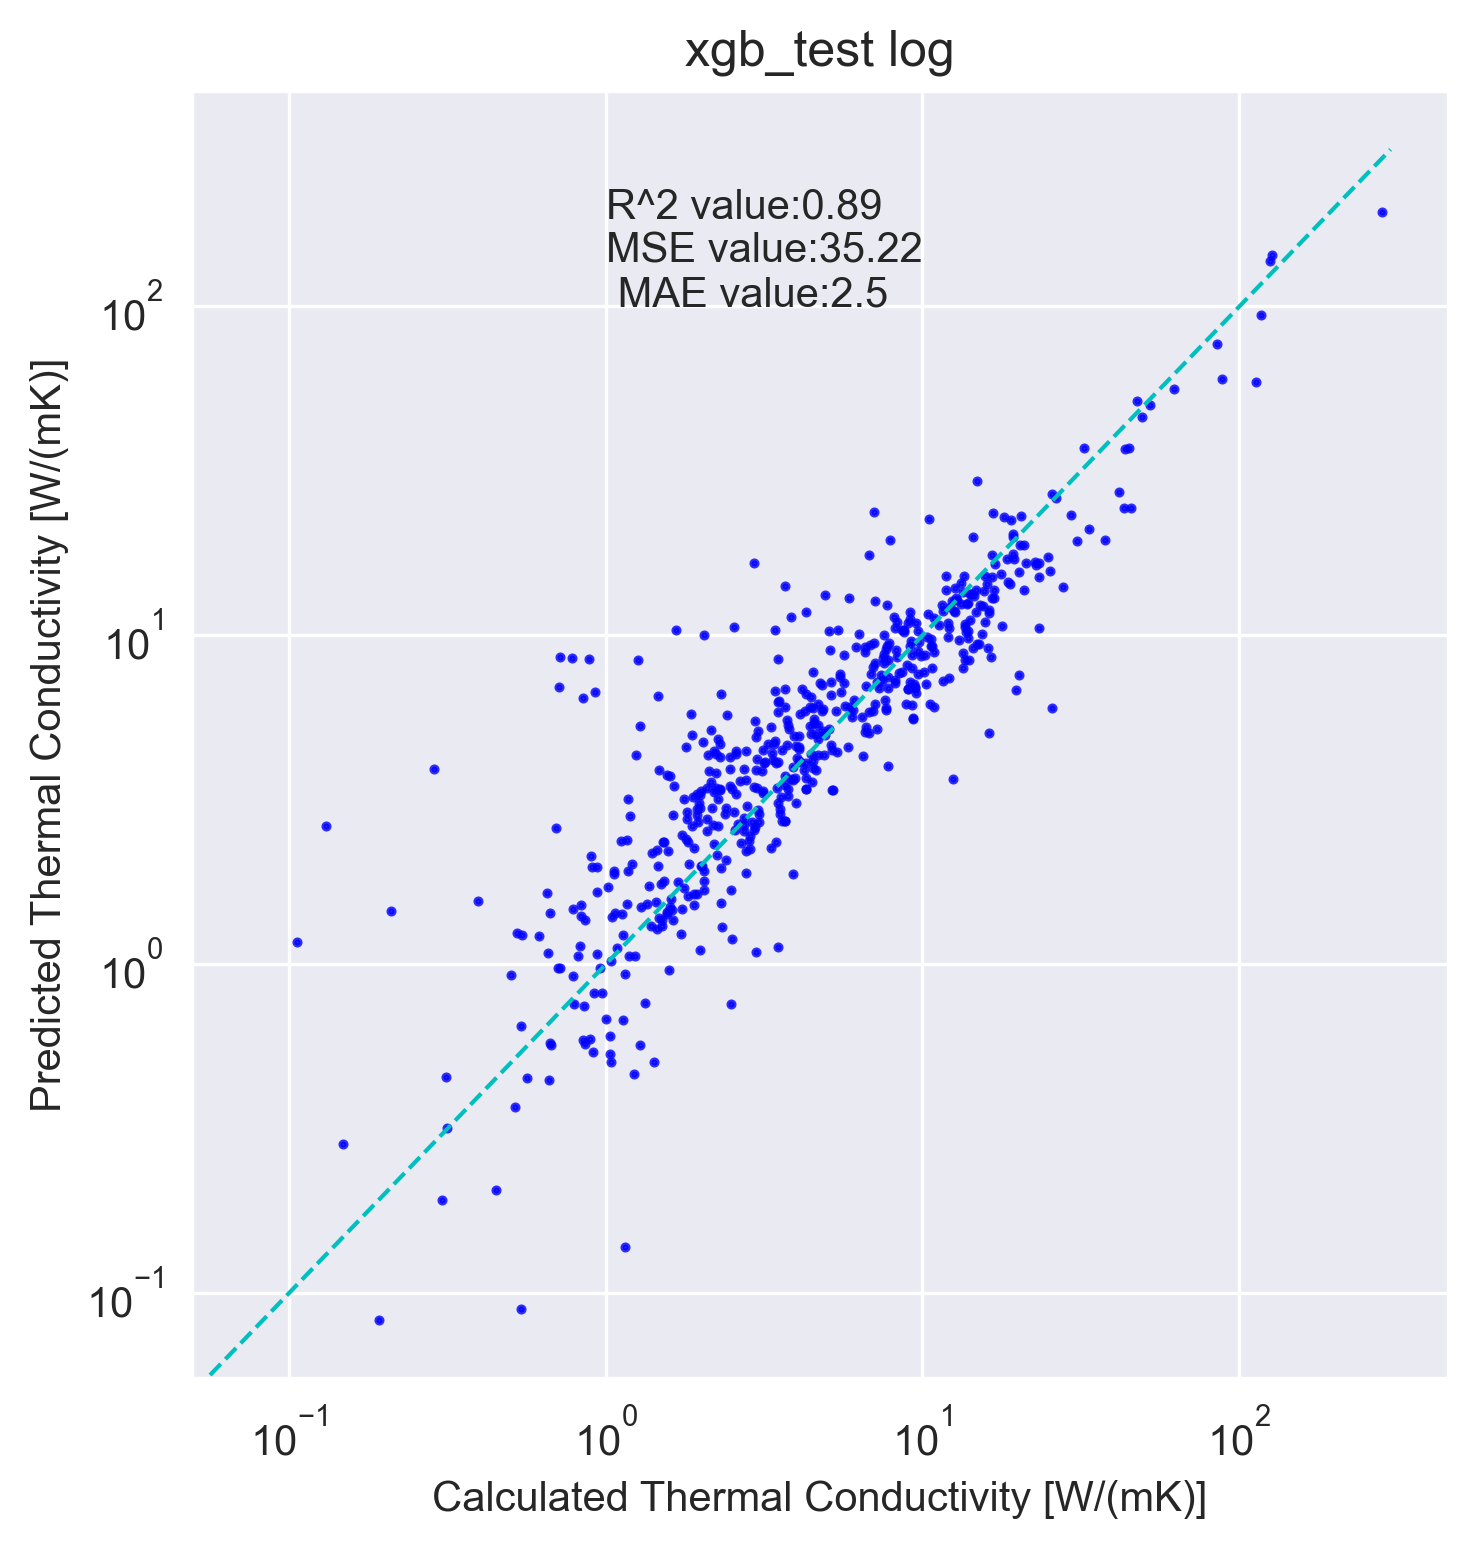

In [92]:
plot_log(y_test,y_test_predicted,"xgb_test")

In [93]:
#y_train_predicted_NN = clf.predict(x_train_transformed)
#mse(y_train, y_train_predicted_xgb)
##print("mean squared error of "+"kr_predictor"+ ' on training data is'+ mse(y_train,y_train_predicted_kr))
#y_test_predicted = clf.predict(x_test_transformed)
#mse(y_test, y_test_predicted)
#plot(y_train, y_train_predicted_xgb, "xgb_train")
#plot(y_test, y_test_predicted, "xgb_test")



Unnamed: 0 0
atomic number 1
Mendeleev number 2
period 3
group 4
atomic mass 5
atomic density 6
valence electrons 7
absolute radii 8
covalent radii 9
van der Waals radii 10
electron affinity 11
electronegativity 12
first ionization energy 13
boiling point 14
melting point 15
molar volume 16
thermal conductivity 17
the orbital exponent of Slater-type orbitals 18
polarizability 19
global hardness 20
electrophilicity indices 21
atomization enthalpy 22
fusion enthalpy 23
vaporization enthalpy 24
binding energy 25
compound 26
auid 27


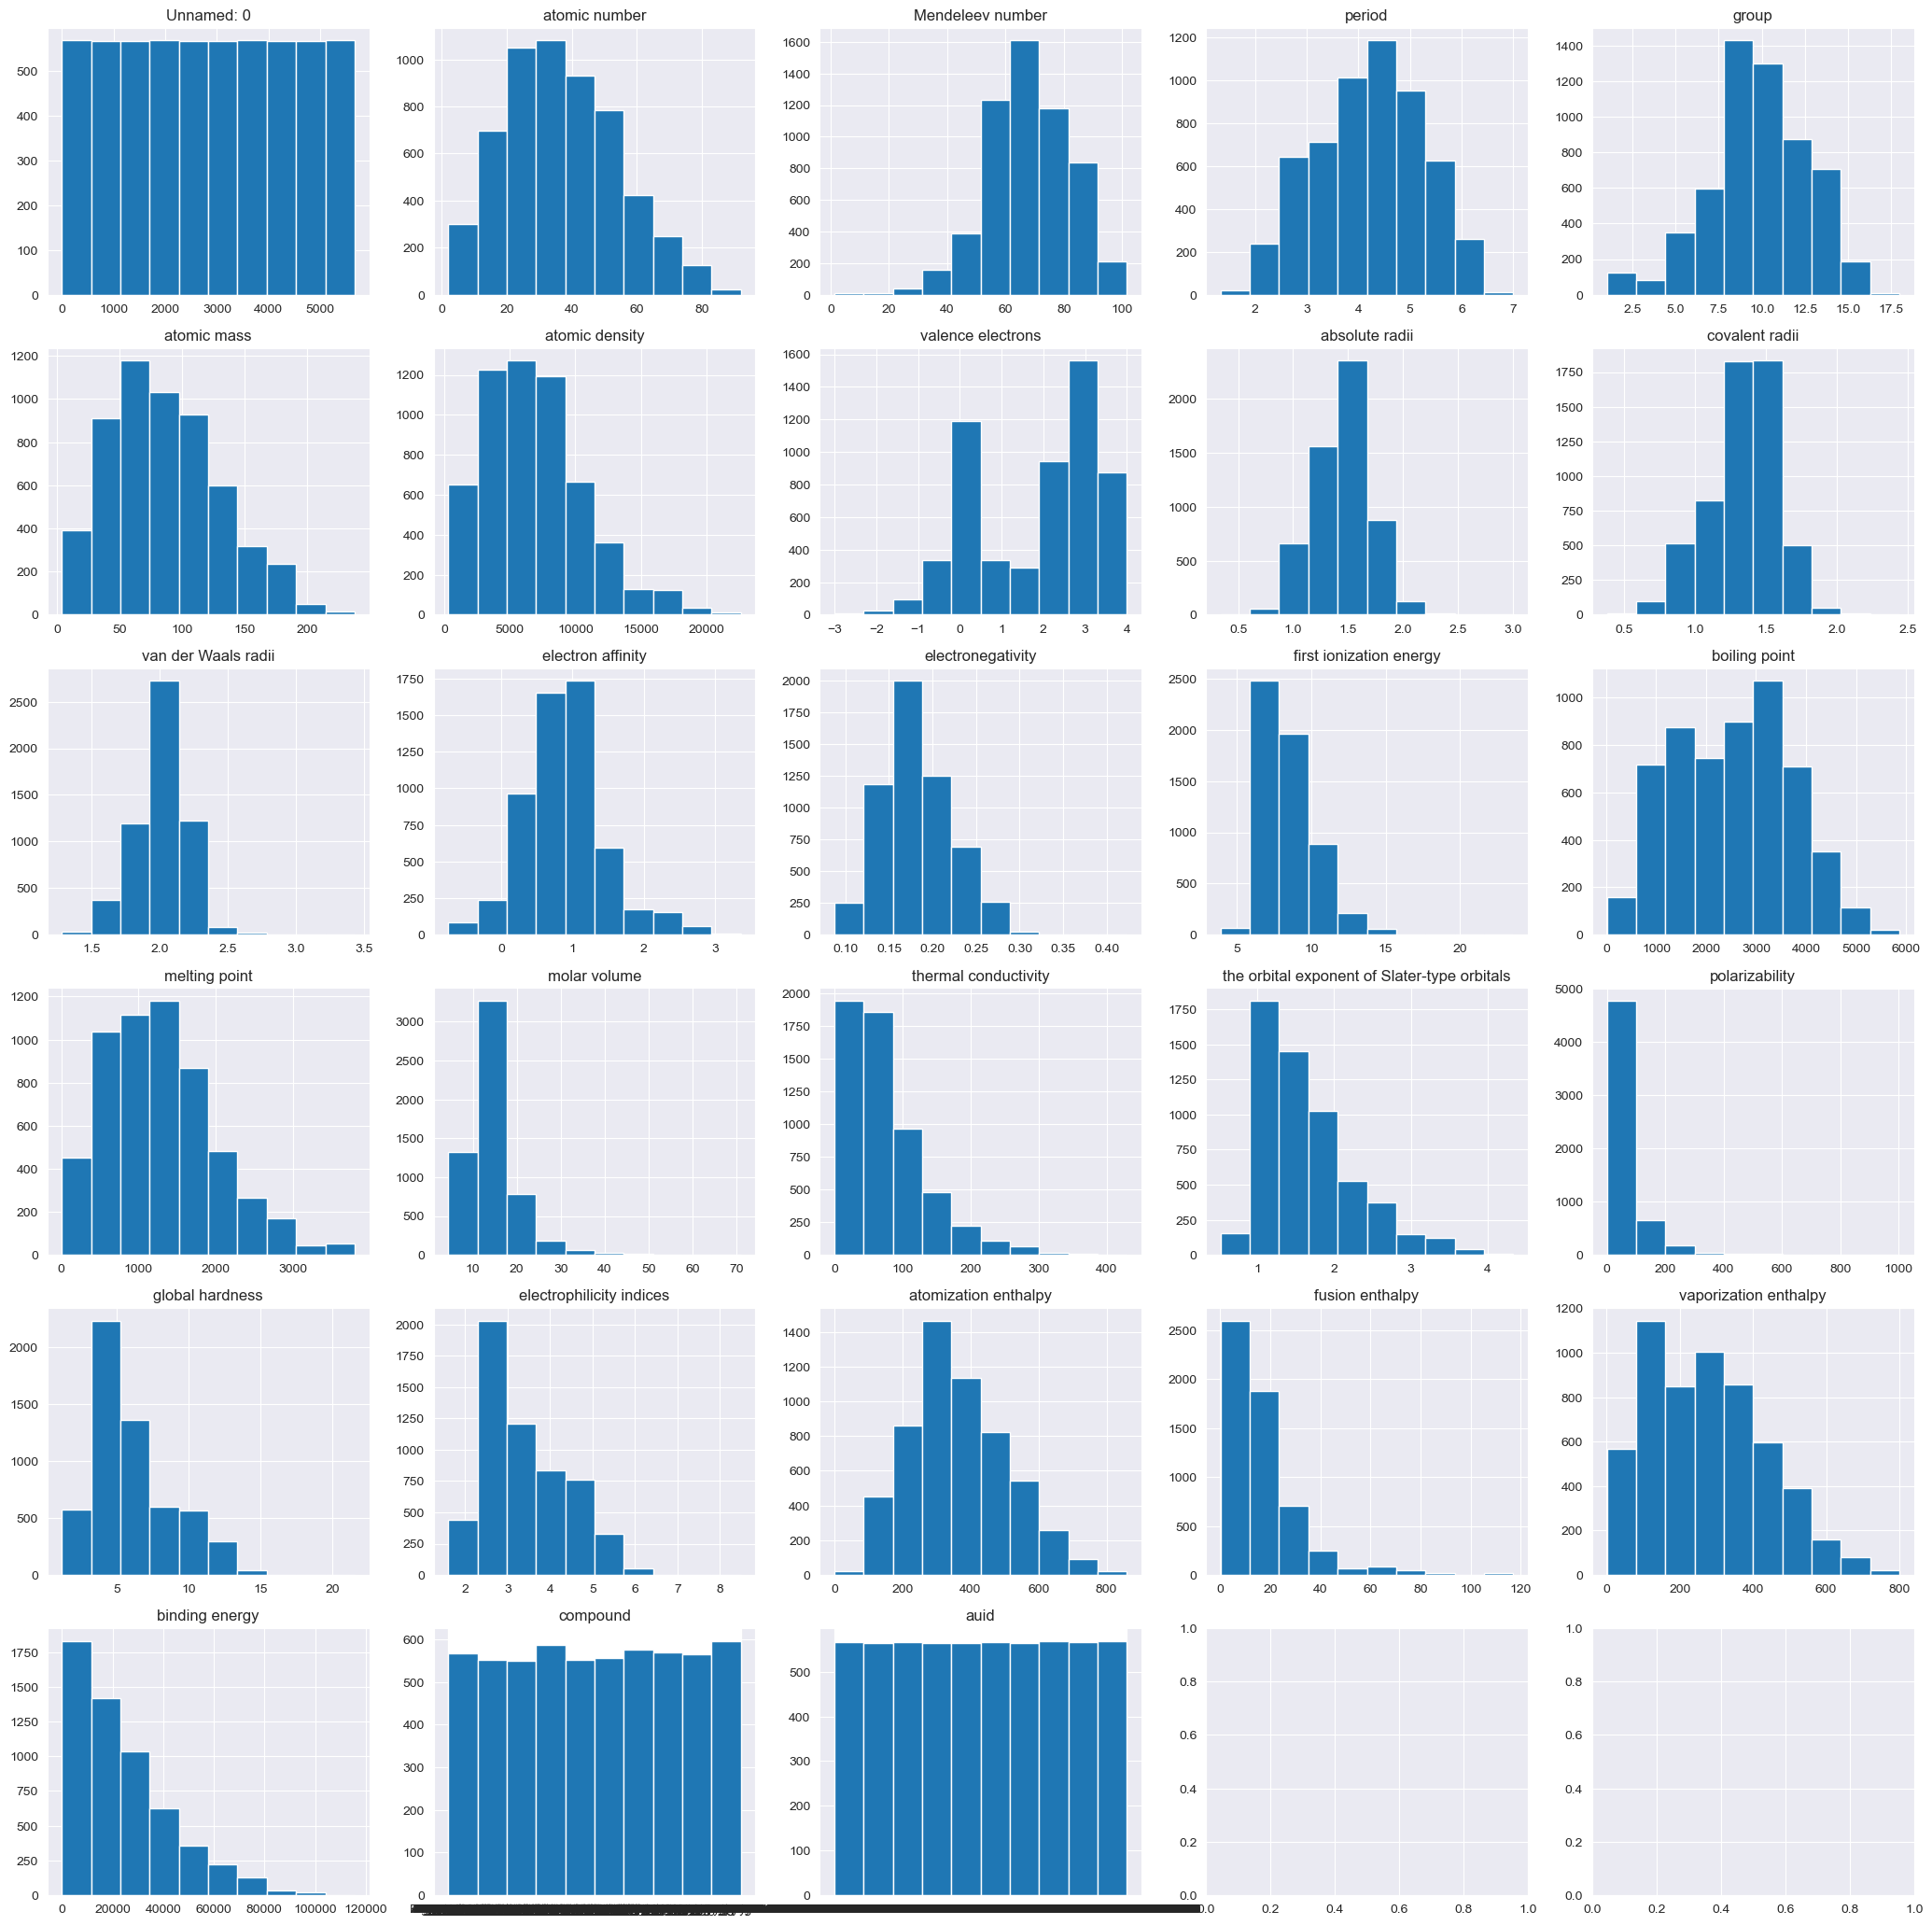

In [94]:


fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))



for i,j in zip(train_dataset.columns,range(28)):
    print(i,j)
    if j<5:
        axs[0, j].hist(train_dataset[i])
        axs[0, j].set_title(i)
    if 4<j<=9:
        axs[1, j-5].hist(train_dataset[i])
        axs[1, j-5].set_title(i)
    if 9<j<=14:
        axs[2, j-10].hist(train_dataset[i])
        axs[2, j-10].set_title(i)
    if 14<j<=19:
        axs[3, j-15].hist(train_dataset[i])
        axs[3, j-15].set_title(i)
    if 19<j<=24:
        axs[4, j-20].hist(train_dataset[i])
        axs[4, j-20].set_title(i)
    if 24<j<=29:
        axs[5, j-25].hist(train_dataset[i])
        axs[5, j-25].set_title(i)

plt.subplots_adjust(left=1.0, bottom=1.0, right=2.0, top=2.0)

plt.show()


atomic number 0
Mendeleev number 1
period 2
group 3
atomic mass 4
atomic density 5
valence electrons 6
absolute radii 7
covalent radii 8
van der Waals radii 9
electron affinity 10
electronegativity 11
first ionization energy 12
boiling point 13
melting point 14
molar volume 15
thermal conductivity 16
the orbital exponent of Slater-type orbitals 17
polarizability 18
global hardness 19
electrophilicity indices 20
atomization enthalpy 21
fusion enthalpy 22
vaporization enthalpy 23
binding energy 24
spacegroup_relax 25
volume_atom 26
volume_cell 27


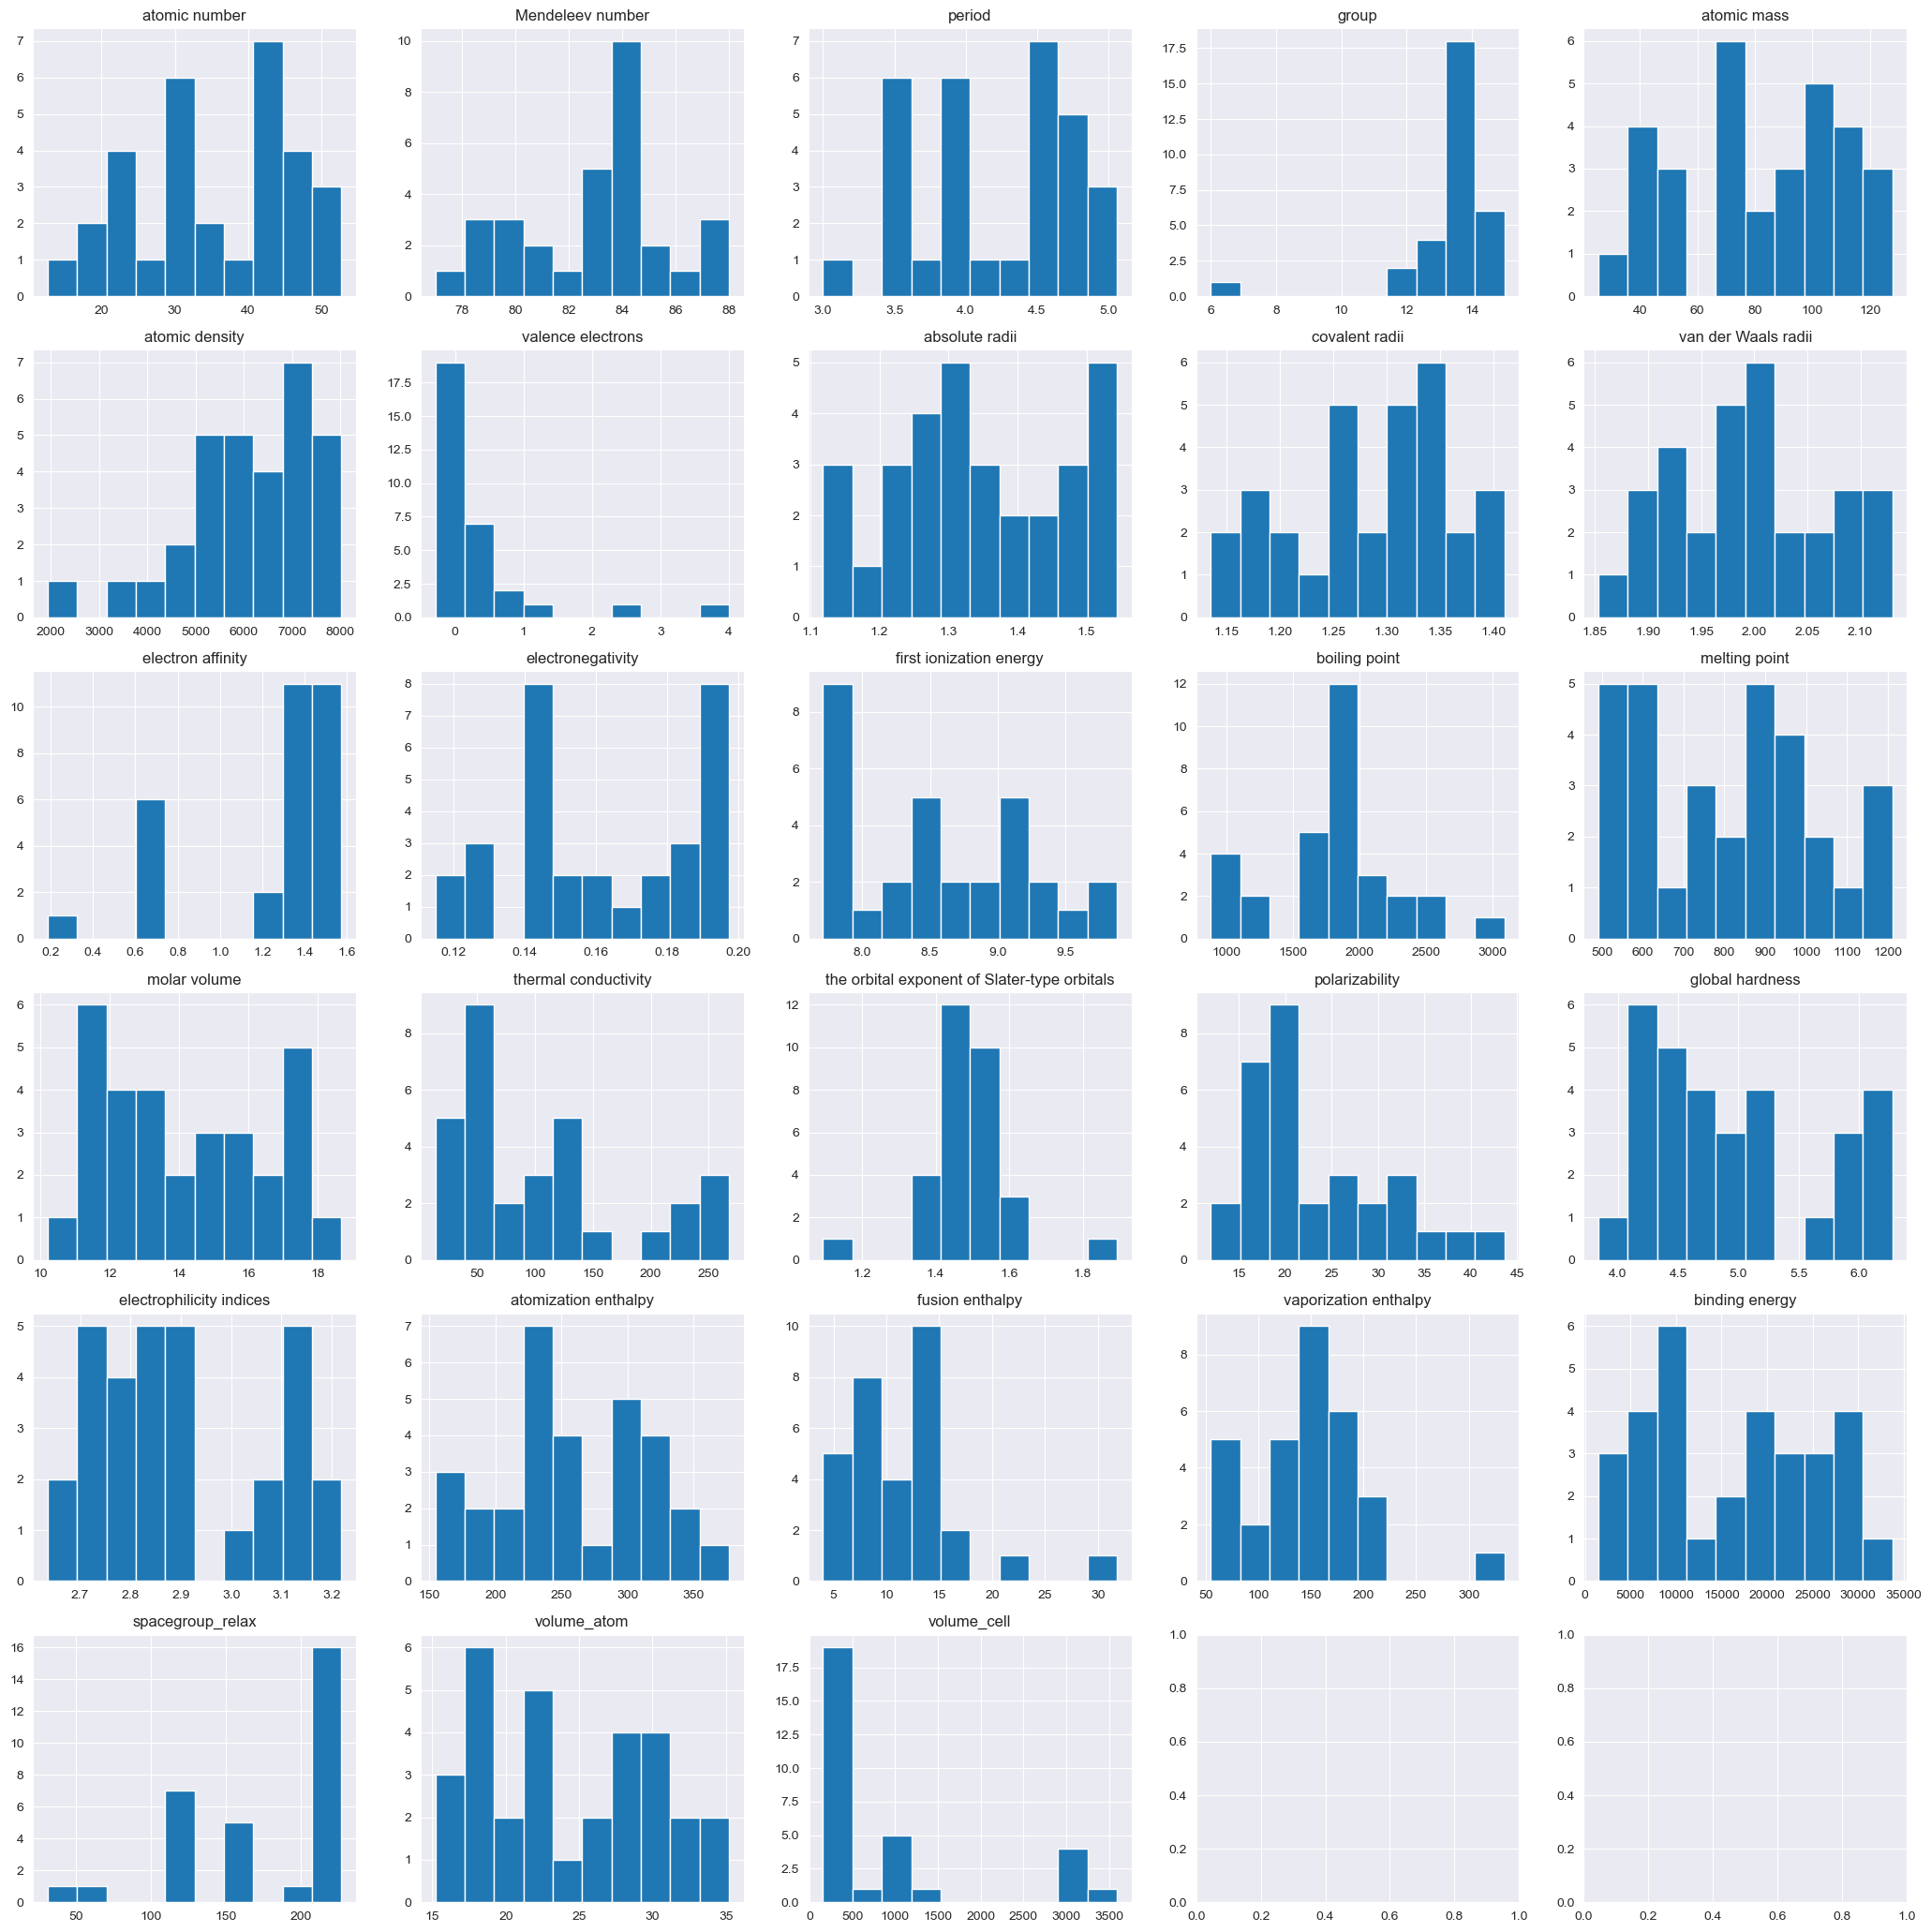

In [95]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

for i,j in zip(x_exp_data.columns,range(28)):
    print(i,j)
    if j<5:
        axs[0, j].hist(x_exp_data[i])
        axs[0, j].set_title(i)
    if 4<j<=9:
        axs[1, j-5].hist(x_exp_data[i])
        axs[1, j-5].set_title(i)
    if 9<j<=14:
        axs[2, j-10].hist(x_exp_data[i])
        axs[2, j-10].set_title(i)
    if 14<j<=19:
        axs[3, j-15].hist(x_exp_data[i])
        axs[3, j-15].set_title(i)
    if 19<j<=24:
        axs[4, j-20].hist(x_exp_data[i])
        axs[4, j-20].set_title(i)
    if 24<j<=29:
        axs[5, j-25].hist(x_exp_data[i])
        axs[5, j-25].set_title(i)

plt.subplots_adjust(left=1.0, bottom=1.0, right=2.0, top=2.0)

plt.show()

In [96]:
df = x_data.drop(['Mendeleev number'],axis=1)
df

atomic number    period      group  atomic mass  atomic density  \
0         83.000000  6.000000  15.000000   208.980000     9780.000000   
1         76.416667  5.916667  11.083333   190.996483    13135.166667   
2         74.916667  5.833333  11.083333   187.132358    13078.833333   
3         76.739130  6.000000  10.565217   191.761522    12584.217391   
4         34.000000  4.000000  12.666667    77.245133     7491.666667   
...             ...       ...        ...          ...             ...   
5659       6.000000  2.000000  14.000000    12.010700     2267.000000   
5660      22.250000  3.750000   8.750000    48.178725     6251.750000   
5661       6.000000  2.000000  14.000000    12.010700     2267.000000   
5662       6.000000  2.000000  14.000000    12.408850     1743.000000   
5663       6.000000  2.000000  14.000000    12.010700     2267.000000   

      valence electrons  absolute radii  covalent radii  van der Waals radii  \
0              3.000000        1.571200        1.480000             2.070000   
1              1.916667        1.218842        1.393333             2.131667   
2              1.916667        1.209525        1.379167             2.108333   
3              1.869565        1.327552        1.466087             2.230000   
4              0.000000        1.250233        1.186667             1.906667   
...                 ...             ...             ...                  ...   
5659           4.000000        0.942200        0.760000             1.700000   
5660           2.500000        1.607325        1.332500             1.997500   
5661           4.000000        0.942200        0.760000             1.700000   
5662           0.000000        1.012400        0.775000             1.735000   
5663           4.000000        0.942200        0.760000             1.700000   

      electron affinity  ...  polarizability  global hardness  \
0              0.942362  ...       42.676700         3.397200   
1             -0.436174  ...      160.589500         2.274700   
2             -0.434878  ...      135.758583         2.318467   
3             -0.390657  ...      243.457391         2.194387   
4              1.356683  ...       48.154333         7.054867   
...                 ...  ...             ...              ...   
5659           1.262120  ...        1.243200        11.040700   
5660           0.460338  ...       38.354800         3.834800   
5661           1.262120  ...        1.243200        11.040700   
5662           0.139499  ...        1.573650        11.041400   
5663           1.262120  ...        1.243200        11.040700   

      electrophilicity indices  atomization enthalpy  fusion enthalpy  \
0                     2.671040            207.000000        10.900000   
1                     5.495105             65.416667         2.281667   
2                     5.504012             66.083333         2.293333   
3                     5.290321             65.565217         2.263913   
4                     3.578853            273.000000         7.607333   
...                        ...                   ...              ...   
5659                  4.768960            717.000000       117.000000   
5660                  2.394932            412.250000        15.450000   
5661                  4.768960            717.000000       117.000000   
5662                  4.768800            518.000000        25.180000   
5663                  4.768960            717.000000       117.000000   

      vaporization enthalpy  binding energy  spacegroup_relax  volume_atom  \
0                160.000000    90526.000000               140     40.00310   
1                 60.266667    77443.500000               221     30.58650   
2                 60.675000    76477.533333               221     30.18190   
3                 59.956522    76956.304348               223     33.18990   
4                171.136667    17190.366667               224     19.36390   
...                     ...             ..

In [97]:
col_list = df.columns
reversed_list = col_list[::-1]
reversed_list

Index(['volume_cell', 'volume_atom', 'spacegroup_relax', 'binding energy',
       'vaporization enthalpy', 'fusion enthalpy', 'atomization enthalpy',
       'electrophilicity indices', 'global hardness', 'polarizability',
       'the orbital exponent of Slater-type orbitals', 'thermal conductivity',
       'molar volume', 'melting point', 'boiling point',
       'first ionization energy', 'electronegativity', 'electron affinity',
       'van der Waals radii', 'covalent radii', 'absolute radii',
       'valence electrons', 'atomic density', 'atomic mass', 'group', 'period',
       'atomic number'],
      dtype='object')

In [98]:
df_reverse = pd.DataFrame
df_reverse

pandas.core.frame.DataFrame

In [99]:

df_reverse = df.reindex(columns= reversed_list)
df_reverse

volume_cell  volume_atom  spacegroup_relax  binding energy  \
0        160.0120     40.00310               140    90526.000000   
1       1101.1100     30.58650               221    77443.500000   
2       1086.5500     30.18190               221    76477.533333   
3       1526.7300     33.18990               223    76956.304348   
4        116.1840     19.36390               224    17190.366667   
...           ...          ...               ...             ...   
5659      24.0853      6.02134               139      284.200000   
5660      55.5196     13.87990               225     5485.750000   
5661      22.8564      5.71410               194      284.200000   
5662      11.9159      5.95797               216      298.950000   
5663      11.4060      5.70301               227      284.200000   

      vaporization enthalpy  fusion enthalpy  atomization enthalpy  \
0                160.000000        10.900000            207.000000   
1                 60.266667         2.281667             65.416667   
2                 60.675000         2.293333             66.083333   
3                 59.956522         2.263913             65.565217   
4                171.136667         7.607333            273.000000   
...                     ...              ...                   ...   
5659             715.000000       117.000000            717.000000   
5660             367.000000        15.450000            412.250000   
5661             715.000000       117.000000            717.000000   
5662             254.895000        25.180000            518.000000   
5663             715.000000       117.000000            717.000000   

      electrophilicity indices  global hardness  polarizability  ...  \
0                     2.671040         3.397200       42.676700  ...   
1                     5.495105         2.274700      160.589500  ...   
2                     5.504012         2.318467      135.758583  ...   
3                     5.290321         2.194387      243.457391  ...   
4                     3.578853         7.054867       48.154333  ...   
...                        ...              ...             ...  ...   
5659                  4.768960        11.040700        1.243200  ...   
5660                  2.394932         3.834800       38.354800  ...   
5661                  4.768960        11.040700        1.243200  ...   
5662                  4.768800        11.041400        1.573650  ...   
5663                  4.768960        11.040700        1.243200  ...   

      electron affinity  van der Waals radii  covalent radii  absolute radii  \
0              0.942362             2.070000        1.480000        1.571200   
1             -0.436174             2.131667        1.393333        1.218842   
2             -0.434878             2.108333        1.379167        1.209525   
3             -0.390657             2.230000        1.466087        1.327552   
4              1.356683             1.906667        1.186667        1.250233   
...                 ...                  ...             ...             ...   
5659           1.262120             1.700000        0.760000        0.942200   
5660           0.460338             1.997500        1.332500        1.607325   
5661           1.262120             1.700000        0.760000        0.942200   
5662           0.139499             1.735000        0.775000        1.012400   
5663           1.262120             1.700000        0.760000        0.942200   

      valence electrons  atomic density  atomic mass      group    period  \
0              3.000000     9780.000000   208.980000  15.000000  6.000000   
1              1.916667    13135.166667   190.996483  11.083333  5.916667   
2              1.916667    13078.833333   187.132358  11.083333  5.833333   
3              1.869565    12584.217391   191.761522  10.565217  6.000000   
4              0.000000     7491.666667    77.245133  12.666667  4.000000   
...                 ...             ...          ...        

In [100]:
corr_matrix = df.corr().abs()
corr_matrix_reverse = df_reverse.corr().abs()

In [101]:

corr_matrix_reverse

volume_cell  volume_atom  \
volume_cell                                      1.000000     0.282180   
volume_atom                                      0.282180     1.000000   
spacegroup_relax                                 0.062079     0.034818   
binding energy                                   0.019688     0.349061   
vaporization enthalpy                            0.137033     0.319546   
fusion enthalpy                                  0.092798     0.301412   
atomization enthalpy                             0.160253     0.465697   
electrophilicity indices                         0.092777     0.410684   
global hardness                                  0.099508     0.492082   
polarizability                                   0.096929     0.553442   
the orbital exponent of Slater-type orbitals     0.029553     0.103871   
thermal conductivity                             0.043992     0.090617   
molar volume                                     0.220887     0.740720   
melting point                                    0.142798     0.318335   
boiling point                                    0.105673     0.210856   
first ionization energy                          0.075374     0.407812   
electronegativity                                0.072922     0.357326   
electron affinity                                0.072417     0.100213   
van der Waals radii                              0.133044     0.666721   
covalent radii                                   0.118678     0.677773   
absolute radii                                   0.097010     0.547520   
valence electrons                                0.015678     0.005323   
atomic density                                   0.074540     0.034259   
atomic mass                                      0.048042     0.445363   
group                                            0.069989     0.135905   
period                                           0.073986     0.528955   
atomic number                                    0.051552     0.453447   

                                              spacegroup_relax  \
volume_cell                                           0.062079   
volume_atom                                           0.034818   
spacegroup_relax                                      1.000000   
binding energy                                        0.017732   
vaporization enthalpy                                 0.038304   
fusion enthalpy                                       0.060700   
atomization enthalpy                                  0.064193   
electrophilicity indices                              0.030907   
global hardness                                       0.038464   
polarizability                                        0.011017   
the orbital exponent of Slater-type orbitals          0.031144   
thermal conductivity                                  0.009442   
molar volume                                          0.005910   
melting point                                         0.035208   
boiling point                                         0.040784   
first ionization energy                               0.014617   
electronegativity                                     0.058760   
electron affinity                                     0.063551   
van der Waals radii                                   0.018901   
covalent radii                                        0.025869   
absolute radii                                        0.038100   
valence electrons                                     0.002755   
atomic density                                        0.005396   
atomic mass                                           0.013769   
group                                                 0.088145   
period                                                0.006318   
atomic number                                         0.011994   

                                              binding energy  \
volume_cell                                         0.019688

In [102]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

C:\Users\Kacper\AppData\Local\Temp\ipykernel_18900\1372051229.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [104]:
upper

atomic number    period  \
atomic number                                           NaN  0.961845   
period                                                  NaN       NaN   
group                                                   NaN       NaN   
atomic mass                                             NaN       NaN   
atomic density                                          NaN       NaN   
valence electrons                                       NaN       NaN   
absolute radii                                          NaN       NaN   
covalent radii                                          NaN       NaN   
van der Waals radii                                     NaN       NaN   
electron affinity                                       NaN       NaN   
electronegativity                                       NaN       NaN   
first ionization energy                                 NaN       NaN   
boiling point                                           NaN       NaN   
melting point                                           NaN       NaN   
molar volume                                            NaN       NaN   
thermal conductivity                                    NaN       NaN   
the orbital exponent of Slater-type orbitals            NaN       NaN   
polarizability                                          NaN       NaN   
global hardness                                         NaN       NaN   
electrophilicity indices                                NaN       NaN   
atomization enthalpy                                    NaN       NaN   
fusion enthalpy                                         NaN       NaN   
vaporization enthalpy                                   NaN       NaN   
binding energy                                          NaN       NaN   
spacegroup_relax                                        NaN       NaN   
volume_atom                                             NaN       NaN   
volume_cell                                             NaN       NaN   

                                                 group  atomic mass  \
atomic number                                 0.175944     0.998684   
period                                        0.248925     0.949233   
group                                              NaN     0.177043   
atomic mass                                        NaN          NaN   
atomic density                                     NaN          NaN   
valence electrons                                  NaN          NaN   
absolute radii                                     NaN          NaN   
covalent radii                                     NaN          NaN   
van der Waals radii                                NaN          NaN   
electron affinity                                  NaN          NaN   
electronegativity                                  NaN          NaN   
first ionization energy                            NaN          NaN   
boiling point                                      NaN          NaN   
melting point                                      NaN          NaN   
molar volume                                       NaN          NaN   
thermal conductivity                               NaN          NaN   
the orbital exponent of Slater-type orbitals       NaN          NaN   
polarizability                                     NaN          NaN   
global hardness                                    NaN          NaN   
electrophilicity indices                           NaN          NaN   
atomization enthalpy                               NaN          NaN   
fusion enthalpy                                    NaN          NaN   
vaporization enthalpy                              NaN          NaN   
binding energy                                     NaN          NaN   
spacegroup_relax                                   NaN          NaN   
volume_atom                                        NaN          NaN   
volume_cell                                        NaN          NaN   

            

In [105]:
scaler_ = preprocessing.StandardScaler()
reduction = [0.95,0.90,0.85,0.8,0.75,0.7]

In [106]:
for i in reduction:
    to_drop = [column for column in upper.columns if upper[column].mean() > i]
    df = df.drop(df[to_drop], axis=1)
    df_train = x_train.drop(x_train[to_drop], axis=1)
    x_droped_transformed = scaler_.fit_transform(df_train)
    clf.fit(x_droped_transformed,y_train)
    y_droped = clf.predict(x_droped_transformed)

    print(len(to_drop))

    print(mse(y_train,y_droped))

Fitting 10 folds for each of 3 candidates, totalling 30 fits
1
6.53493361339197


KeyError: "None of [Index(['period'], dtype='object')] are in the [columns]"

In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

In [ ]:
df_train = x_train.drop(x_train[to_drop], axis=1)

In [ ]:
scaler_ = preprocessing.StandardScaler().fit(df_train)

In [ ]:
x_droped_transformed = scaler_.transform(df_train)

In [112]:
reduction = [1.1,1,0.95,0.90,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1]
reduction_dic = {}
red_name = []
red_fetures = []

In [113]:
for i in reduction:
    red_fetures.append([column for column in upper.columns if any(upper[column] > i)])
    red_name.append(f"red_{str(i)}")
    #reduction_dic[f"reduction_{str(reduction)}"] = [column for column in upper.columns if any(upper[column] > i)]

In [114]:
#reduction_dic
for i in red_fetures:
    i.append("Mendeleev number")

In [115]:
red_fetures

[['Mendeleev number'],
 ['Mendeleev number'],
 ['period',
  'atomic mass',
  'vaporization enthalpy',
  'binding energy',
  'Mendeleev number'],
 ['period',
  'atomic mass',
  'van der Waals radii',
  'first ionization energy',
  'melting point',
  'electrophilicity indices',
  'vaporization enthalpy',
  'binding energy',
  'Mendeleev number'],
 ['period',
  'atomic mass',
  'atomic density',
  'van der Waals radii',
  'first ionization energy',
  'melting point',
  'global hardness',
  'electrophilicity indices',
  'atomization enthalpy',
  'vaporization enthalpy',
  'binding energy',
  'Mendeleev number'],
 ['period',
  'atomic mass',
  'atomic density',
  'covalent radii',
  'van der Waals radii',
  'first ionization energy',
  'melting point',
  'global hardness',
  'electrophilicity indices',
  'atomization enthalpy',
  'fusion enthalpy',
  'vaporization enthalpy',
  'binding energy',
  'Mendeleev number'],
 ['period',
  'atomic mass',
  'atomic density',
  'covalent radii',
  'va

In [116]:
for i in red_fetures:
    print(len(i))

1
1
5
9
12
14
15
16
17
18
20
21
23
23
24
24
25
26
26
26


In [ ]:
resoults = []
xgb_R_Sq_train = []
xgb_R_Sq_test = []
xgb_R_Sq_exp = []
xgb_MSE_train = []
xgb_MSE_test = []
xgb_MSE_exp = []
xgb_MAE_train = []
xgb_MAE_test = []
xgb_MAE_exp = []
for i,j, in zip(red_fetures,red_name,):

    df_train = x_train.drop(x_train[i], axis=1)
    scaler_ = preprocessing.StandardScaler().fit(df_train)
    x_droped_transformed = scaler_.transform(df_train)
    clf.fit(x_droped_transformed, y_train)
    y_droped = clf.predict(x_droped_transformed)

    resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_train, y_droped),2)}\nMSE value:{round(mse(y_train, y_droped),2)}\nMAE value:{round(mae(y_train, y_droped),2)}')
    xgb_R_Sq_train.append( round(r2_score(y_train, y_droped),2))
    xgb_MSE_train.append(round(mse(y_train, y_droped),2))
    xgb_MAE_train.append(round(mae(y_train, y_droped),2))
    df_test = x_test.drop(x_test[i], axis=1)
    x_droped_transformed_test = scaler_.transform(df_test)
    y_droped = clf.predict(x_droped_transformed_test)
    resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_test, y_droped),2)}\nMSE value:{round(mse(y_test, y_droped),2)}\nMAE value:{round(mae(y_test, y_droped),2)}')
    xgb_R_Sq_test.append(round(r2_score(y_test, y_droped),2))
    xgb_MSE_test.append(round(mse(y_test, y_droped),2))
    xgb_MAE_test.append(round(mae(y_test, y_droped),2))
#
    df_exp = x_exp_data.drop(x_exp_data[i], axis=1)
    x_droped_transformed_test = scaler_.transform(df_exp)
    y_droped = clf.predict(x_droped_transformed_test)
    resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(exp_y_data, y_droped),2)}\nMSE value:{round(mse(exp_y_data, y_droped),2)}\nMAE value:{round(mae(exp_y_data, y_droped),2)}')
    xgb_R_Sq_exp.append(round(r2_score(exp_y_data, y_droped),2))
    xgb_MSE_exp.append(round(mse(exp_y_data, y_droped),2))
    xgb_MAE_exp.append(round(mae(exp_y_data, y_droped),2))

In [ ]:
resoults


In [ ]:
df_train = x_train.drop(x_train[red_fetures[-1]], axis=1)
scaler_ = preprocessing.StandardScaler().fit(df_train)
x_droped_transformed = scaler_.transform(df_train)
clf.fit(x_droped_transformed, y_train)
y_droped = clf.predict(x_droped_transformed)
print(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_train, y_droped),2)}\nMSE value:{round(mse(y_train, y_droped),2)}\nMAE value:{round(mae(y_train, y_droped),2)}')

In [ ]:
df_train

In [ ]:
x_droped_transformed

In [ ]:
resoults = []
krr_R_Sq_train = []
krr_R_Sq_test = []
krr_R_Sq_exp = []
krr_MSE_train = []
krr_MSE_test = []
krr_MSE_exp = []
krr_MAE_train = []
krr_MAE_test = []
krr_MAE_exp = []
for i,j, in zip(red_fetures,red_name,):

    df_train = x_train.drop(x_train[i], axis=1)
    scaler_ = preprocessing.StandardScaler().fit(df_train)
    x_droped_transformed = scaler_.transform(df_train)
    kr_predictor.fit(x_droped_transformed, y_train)
    y_droped = kr_predictor.predict(x_droped_transformed)

    resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_train, y_droped),2)}\nMSE value:{round(mse(y_train, y_droped),2)}\nMAE value:{round(mae(y_train, y_droped),2)}')
    krr_R_Sq_train.append( round(r2_score(y_train, y_droped),2))
    krr_MSE_train.append(round(mse(y_train, y_droped),2))
    krr_MAE_train.append(round(mae(y_train, y_droped),2))
    df_test = x_test.drop(x_test[i], axis=1)
    x_droped_transformed_test = scaler_.transform(df_test)
    y_droped = kr_predictor.predict(x_droped_transformed_test)
    resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_test, y_droped),2)}\nMSE value:{round(mse(y_test, y_droped),2)}\nMAE value:{round(mae(y_test, y_droped),2)}')
    krr_R_Sq_test.append(round(r2_score(y_test, y_droped),2))
    krr_MSE_test.append(round(mse(y_test, y_droped),2))
    krr_MAE_test.append(round(mae(y_test, y_droped),2))

    df_exp = x_exp_data.drop(x_exp_data[i], axis=1)
    x_droped_transformed_test = scaler_.transform(df_exp)
    y_droped = kr_predictor.predict(x_droped_transformed_test)
    resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(exp_y_data, y_droped),2)}\nMSE value:{round(mse(exp_y_data, y_droped),2)}\nMAE value:{round(mae(exp_y_data, y_droped),2)}')
    krr_R_Sq_exp.append(round(r2_score(exp_y_data, y_droped),2))
    krr_MSE_exp.append(round(mse(exp_y_data, y_droped),2))
    krr_MAE_exp.append(round(mae(exp_y_data, y_droped),2))

In [ ]:

xgb_R_Sq_train

In [ ]:
xgb_R_Sq_test

In [ ]:
xgb_R_Sq_exp

In [ ]:
xgb_MSE_train

In [ ]:
xgb_MSE_test

In [ ]:
xgb_MSE_exp

In [ ]:
xgb_MAE_train

In [ ]:
xgb_MAE_test

In [ ]:
xgb_MAE_exp

In [ ]:
red_fetures


In [117]:
df_train = x_train.drop(x_train[red_fetures[-1]], axis=1)
df_train

atomic number  spacegroup_relax
1697      53.333333               189
146       33.333333               128
3885      35.800000               139
3562      27.090909               227
4447      37.750000                62
...             ...               ...
4654      50.000000                65
759       48.000000                62
225       77.200000                87
3466      51.000000               223
555       41.000000               225

[5097 rows x 2 columns]

In [118]:
alive = []
for i in red_fetures:
    alive.append(df.drop(x_train[i], axis=1).columns)
alive

KeyError: "['Mendeleev number'] not found in axis"

In [119]:
red_fetures[2]

['period',
 'atomic mass',
 'vaporization enthalpy',
 'binding energy',
 'Mendeleev number']

In [120]:
len(alive[-1])

IndexError: list index out of range

In [121]:
print(set(df.columns).difference(set(alive[-18])))

IndexError: list index out of range

In [122]:
krr_R_Sq_train

NameError: name 'krr_R_Sq_train' is not defined

In [123]:
krr_R_Sq_test

NameError: name 'krr_R_Sq_test' is not defined

In [ ]:
krr_R_Sq_exp

In [ ]:
krr_MSE_train

In [ ]:
krr_MSE_test

In [ ]:
krr_MSE_exp

In [ ]:
krr_MAE_train

In [ ]:
krr_MAE_test

In [ ]:
krr_MAE_exp

In [ ]:
red_fetures

In [ ]:
red_name


In [ ]:
red_fetures[0]

In [ ]:
for i in alive:
    print(len(i))

In [ ]:
alive[-10]

In [ ]:
df.columns

In [ ]:
alive[0]

In [ ]:
alive

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

df_train = x_train.drop(x_train[red_fetures[-6]], axis=1)
#df_train
for i,j in zip(df_train.columns,range(5)):
    print(i,j)
    if j<5:
        axs[0, j].df_train(x_data[i])
        axs[0, j].set_title(i)
    if 4<j<=9:
        axs[1, j-5].df_train(x_data[i])
        axs[1, j-5].set_title(i)
    if 9<j<=14:
        axs[2, j-10].df_train(x_data[i])
        axs[2, j-10].set_title(i)
    if 14<j<=19:
        axs[3, j-15].df_train(x_data[i])
        axs[3, j-15].set_title(i)
    if 19<j<=24:
        axs[4, j-20].df_train(x_data[i])
        axs[4, j-20].set_title(i)
    if 24<j<=29:
        axs[5, j-25].df_train(x_data[i])
        axs[5, j-25].set_title(i)

plt.subplots_adjust(left=1.0, bottom=1.0, right=2.0, top=2.0)

plt.show()

In [ ]:
for i,j in zip(df_train.columns,range(28)):
    print(i,j)
    if j<5:
        axs[0, j].hist(x_data[i])
        axs[0, j].set_title(i)
    if 4<j<=9:
        axs[1, j-5].hist(x_data[i])
        axs[1, j-5].set_title(i)
    if 9<j<=14:
        axs[2, j-10].hist(x_data[i])
        axs[2, j-10].set_title(i)
    if 14<j<=19:
        axs[3, j-15].hist(x_data[i])
        axs[3, j-15].set_title(i)
    if 19<j<=24:
        axs[4, j-20].hist(x_data[i])
        axs[4, j-20].set_title(i)
    if 24<j<=29:
        axs[5, j-25].hist(x_data[i])
        axs[5, j-25].set_title(i)

plt.subplots_adjust(left=1.0, bottom=1.0, right=2.0, top=2.0)

plt.show()

In [124]:
df_train = x_exp_data.drop(x_train[red_fetures[-7]], axis=1)
df_train

atomic number      group  thermal conductivity  spacegroup_relax  \
0       40.000000  13.000000            256.757500               216   
1       42.705882  14.117647             23.764706               155   
2       19.928571  12.214286             69.117143               227   
3       30.666667  12.666667            266.840000               225   
4       36.666667  12.666667            267.666667               216   
5       22.428571  13.428571            200.104714               198   
6       31.200000  13.200000            217.541333               216   
7       30.000000  13.200000            223.541333                31   
8       21.000000  13.285714             85.831429               227   
9       32.000000  14.000000             60.000000               227   
10      46.352941  14.823529             14.058824               154   
11      42.444444  13.888889             43.000000               155   
12      52.705882  14.823529             32.764706               155   
13      44.470588  14.823529             15.941176               155   
14      41.000000  14.000000             61.500000               216   
15      32.000000  14.000000             60.260000               216   
16      23.000000  14.000000             60.102500               216   
17      33.875000  13.625000            121.135000               121   
18      24.875000  13.625000            120.977500               121   
19      42.000000  15.000000             33.760000                62   
20      12.666667   6.000000            156.666667               225   
21      19.571429  11.857143             63.545714               227   
22      45.500000  14.000000            122.000000               122   
23      41.000000  14.000000            108.750000               122   
24      21.750000  12.750000            120.102500               122   
25      47.250000  14.000000            110.037500               122   
26      50.000000  14.000000             50.000000               216   
27      41.000000  14.000000             48.760000               216   
28      32.000000  14.000000             48.602500               216   
29      50.500000  14.500000            115.000000               225   
30      45.500000  14.000000            116.250000               122   

    volume_cell  
0   1365.672800  
1   3178.378600  
2    966.305700  
3    184.608800  
4    219.256200  
5    903.950500  
6   1067.775900  
7    536.594400  
8    851.432200  
9    181.009300  
10  3210.570600  
11  3221.497600  
12  3591.875800  
13  3187.527600  
14   227.651400  
15   182.670300  
16   158.252600  
17   363.444100  
18   314.094700  
19   212.309447  
20   256.047863  
21   999.699909  
22   476.397700  
23   433.203161  
24   291.568000  
25   445.880500  
26   272.438000  
27   224.423200  
28   198.196100  
29   224.534000  
30   475.279000

atomic number 0
group 1
thermal conductivity 2
spacegroup_relax 3
volume_cell 4


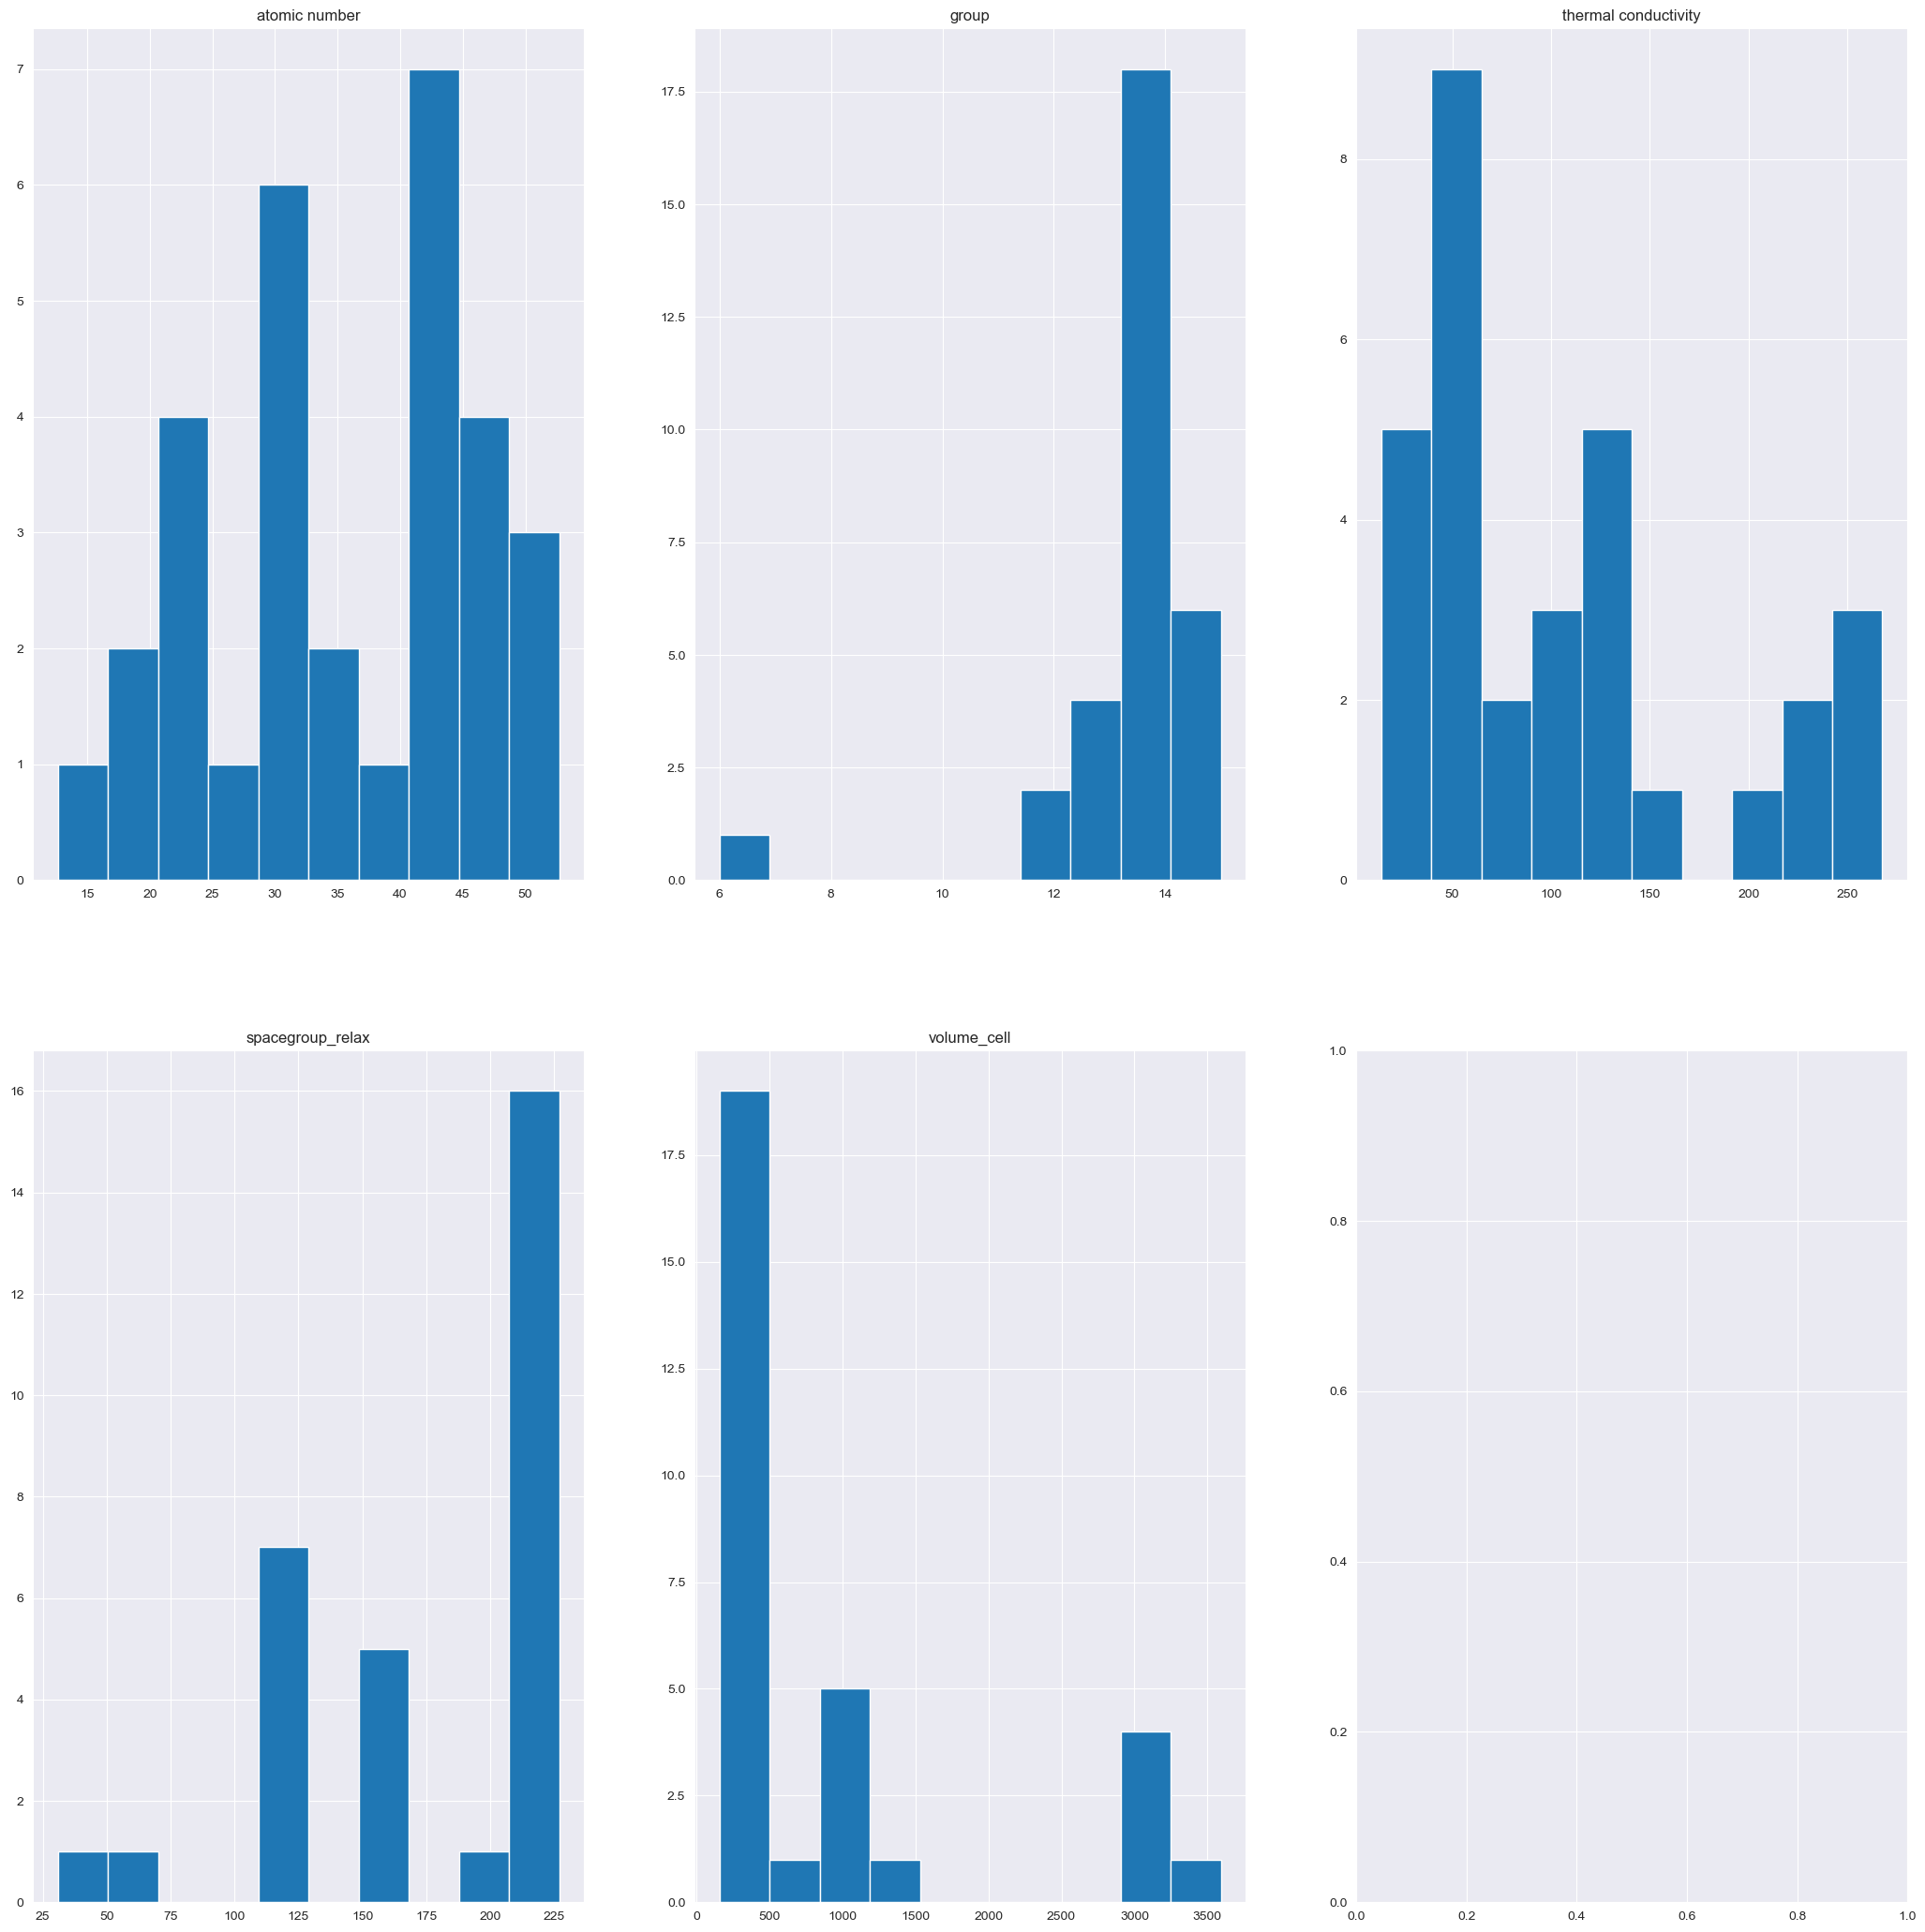

In [125]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))


for i,j in zip(df_train.columns,range(5)):
    print(i,j)
    if j<3:
        axs[0, j].hist(df_train[i])
        axs[0, j].set_title(i)
    if 2<j<=9:
        axs[1, j-3].hist(df_train[i])
        axs[1, j-3].set_title(i)
    if 9<j<=14:
        axs[2, j-10].hist(df_train[i])
        axs[2, j-10].set_title(i)
    if 14<j<=19:
        axs[3, j-15].hist(df_train[i])
        axs[3, j-15].set_title(i)
    if 19<j<=24:
        axs[4, j-20].hist(df_train[i])
        axs[4, j-20].set_title(i)
    if 24<j<=29:
        axs[5, j-25].hist(df_train[i])
        axs[5, j-25].set_title(i)

plt.subplots_adjust(left=1.0, bottom=1.0, right=2.0, top=2.0)

plt.show()

In [126]:
clf.fit(x_exp_data.drop(x_train[red_fetures[-7]], axis=1), y_train)

#clf.
y_train_predicted_xgb = clf.predict(x_train_transformed)
mse(y_train, y_train_predicted_xgb)
#print("mean squared error of "+"kr_predictor"+ ' on training data is'+ mse(y_train,y_train_predicted_kr))
y_test_predicted = clf.predict(x_test_transformed)
mse(y_test, y_test_predicted)

y_exp_predicted_xgb = clf.predict(x_exp_transformed)
mse(exp_y_data, y_exp_predicted_xgb)
#plot(y_train,y_train_predicted_xgb,"xgb_train")
#plot(y_test,y_test_predicted,"xgb_test")
#plot(exp_y_data,y_exp_predicted_xgb,"xgb_exp")
#plot_log(y_train, y_train_predicted_xgb, "xgb_train")

ValueError: Found input variables with inconsistent numbers of samples: [31, 5097]

In [127]:
df_train_droped = x_train.drop(x_train[red_fetures[-7]], axis=1)
df_train_droped


atomic number      group  thermal conductivity  spacegroup_relax  \
1697      53.333333   8.666667             76.000000               189   
146       33.333333  13.333333             22.635556               128   
3885      35.800000  10.600000             59.000000               139   
3562      27.090909  13.272727             28.016915               227   
4447      37.750000   9.250000             38.250000                62   
...             ...        ...                   ...               ...   
4654      50.000000   7.000000             90.500000                65   
759       48.000000   8.333333             64.666667                62   
225       77.200000   9.400000            263.800000                87   
3466      51.000000   7.000000            122.250000               223   
555       41.000000   9.500000            239.500000               225   

      volume_cell  
1697     193.2210  
146      653.7000  
3885      86.8419  
3562     292.2630  
4447     201.8340  
...           ...  
4654     111.3060  
759      223.0390  
225       99.9044  
3466     126.7250  
555       79.6109  

[5097 rows x 5 columns]

In [128]:
df_exp_train_droped = x_exp_data.drop(x_exp_data[red_fetures[-7]], axis=1)
df_exp_train_droped

atomic number      group  thermal conductivity  spacegroup_relax  \
0       40.000000  13.000000            256.757500               216   
1       42.705882  14.117647             23.764706               155   
2       19.928571  12.214286             69.117143               227   
3       30.666667  12.666667            266.840000               225   
4       36.666667  12.666667            267.666667               216   
5       22.428571  13.428571            200.104714               198   
6       31.200000  13.200000            217.541333               216   
7       30.000000  13.200000            223.541333                31   
8       21.000000  13.285714             85.831429               227   
9       32.000000  14.000000             60.000000               227   
10      46.352941  14.823529             14.058824               154   
11      42.444444  13.888889             43.000000               155   
12      52.705882  14.823529             32.764706               155   
13      44.470588  14.823529             15.941176               155   
14      41.000000  14.000000             61.500000               216   
15      32.000000  14.000000             60.260000               216   
16      23.000000  14.000000             60.102500               216   
17      33.875000  13.625000            121.135000               121   
18      24.875000  13.625000            120.977500               121   
19      42.000000  15.000000             33.760000                62   
20      12.666667   6.000000            156.666667               225   
21      19.571429  11.857143             63.545714               227   
22      45.500000  14.000000            122.000000               122   
23      41.000000  14.000000            108.750000               122   
24      21.750000  12.750000            120.102500               122   
25      47.250000  14.000000            110.037500               122   
26      50.000000  14.000000             50.000000               216   
27      41.000000  14.000000             48.760000               216   
28      32.000000  14.000000             48.602500               216   
29      50.500000  14.500000            115.000000               225   
30      45.500000  14.000000            116.250000               122   

    volume_cell  
0   1365.672800  
1   3178.378600  
2    966.305700  
3    184.608800  
4    219.256200  
5    903.950500  
6   1067.775900  
7    536.594400  
8    851.432200  
9    181.009300  
10  3210.570600  
11  3221.497600  
12  3591.875800  
13  3187.527600  
14   227.651400  
15   182.670300  
16   158.252600  
17   363.444100  
18   314.094700  
19   212.309447  
20   256.047863  
21   999.699909  
22   476.397700  
23   433.203161  
24   291.568000  
25   445.880500  
26   272.438000  
27   224.423200  
28   198.196100  
29   224.534000  
30   475.279000

In [129]:
scaler_ = preprocessing.StandardScaler().fit(df_train_droped)
x_droped_transformed = scaler_.transform(df_train_droped)
x_exp_droped_transformed = scaler_.transform(df_exp_train_droped)

In [130]:
clf.fit(x_droped_transformed, y_train)
y_exp_predicted_xgb_droped = clf.predict(x_exp_droped_transformed)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


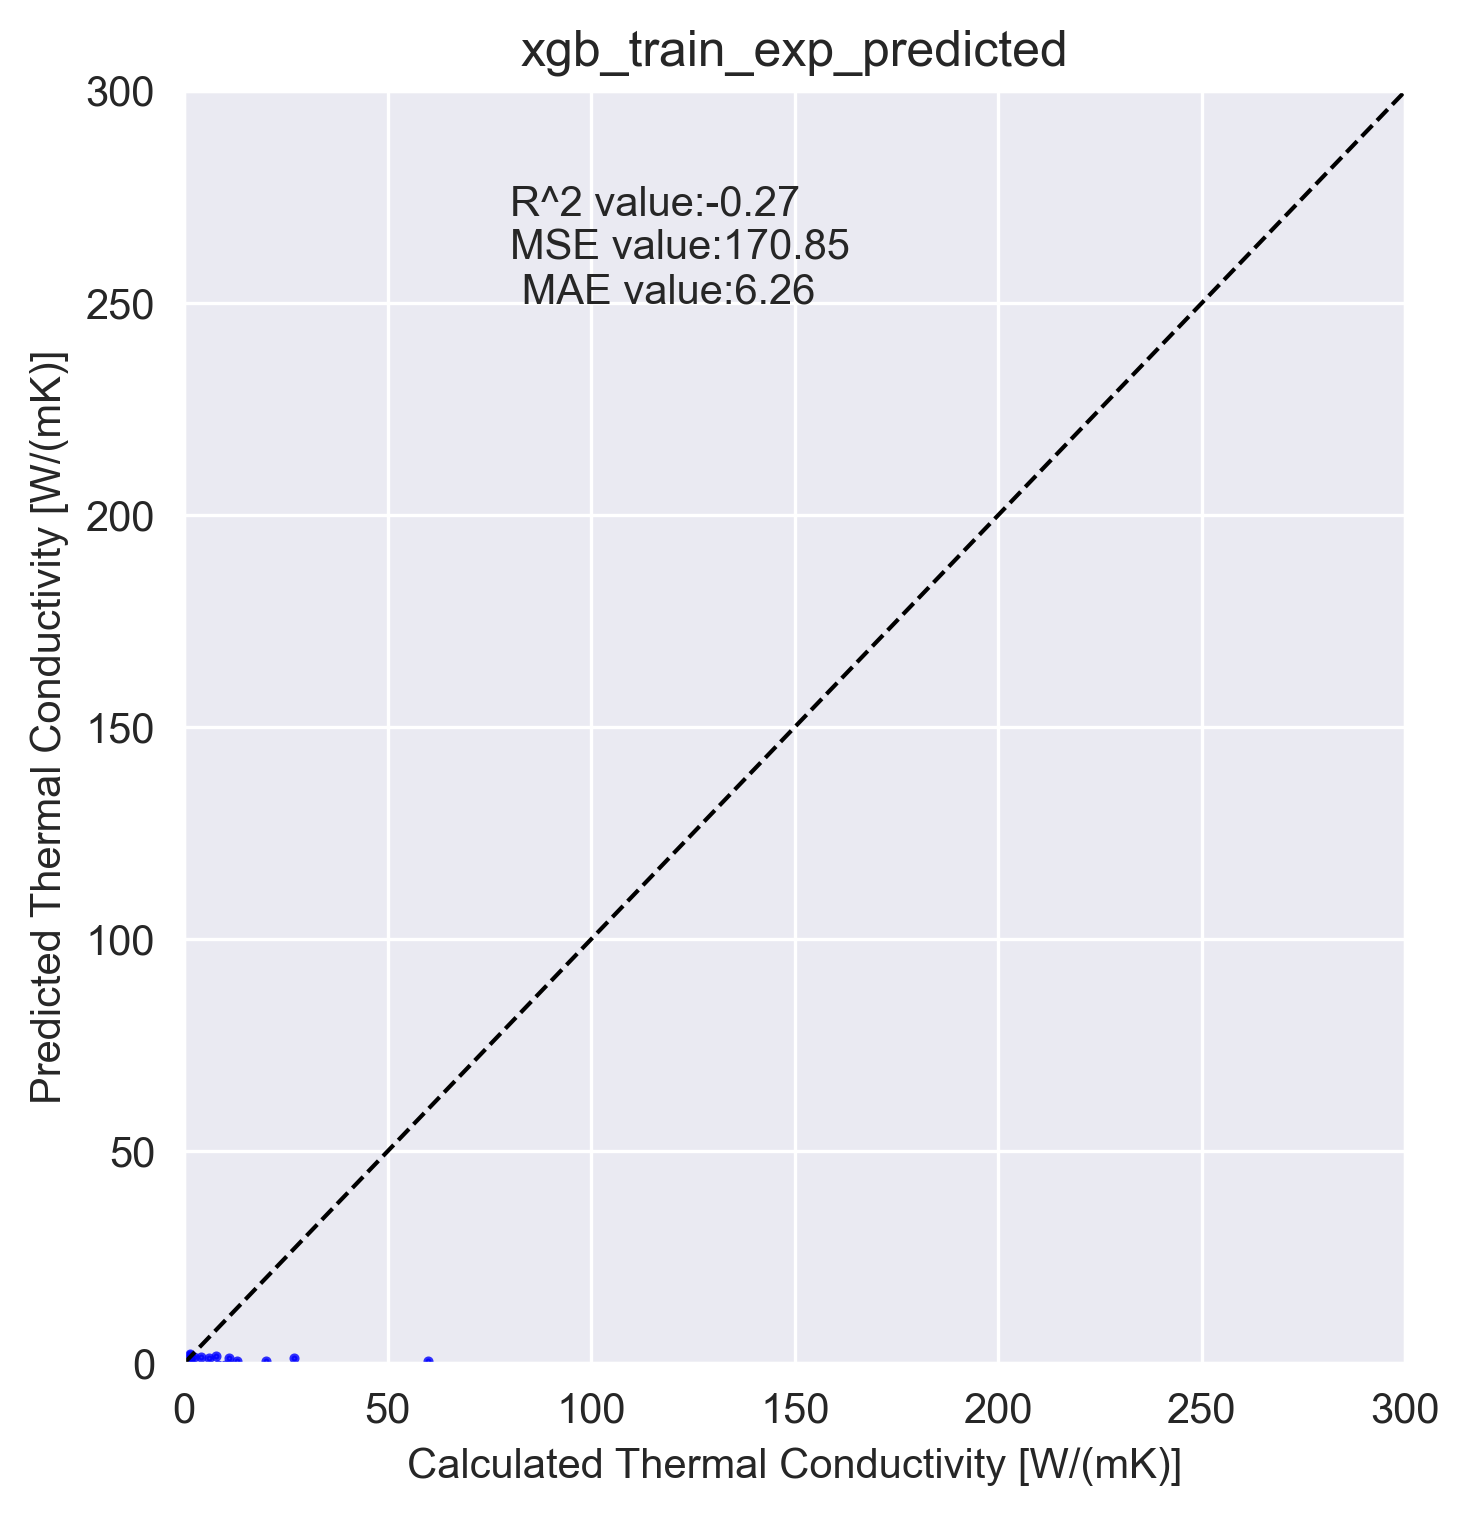

In [135]:
plot(exp_y_data,y_exp_predicted_xgb_droped,"xgb_train_exp_predicted")

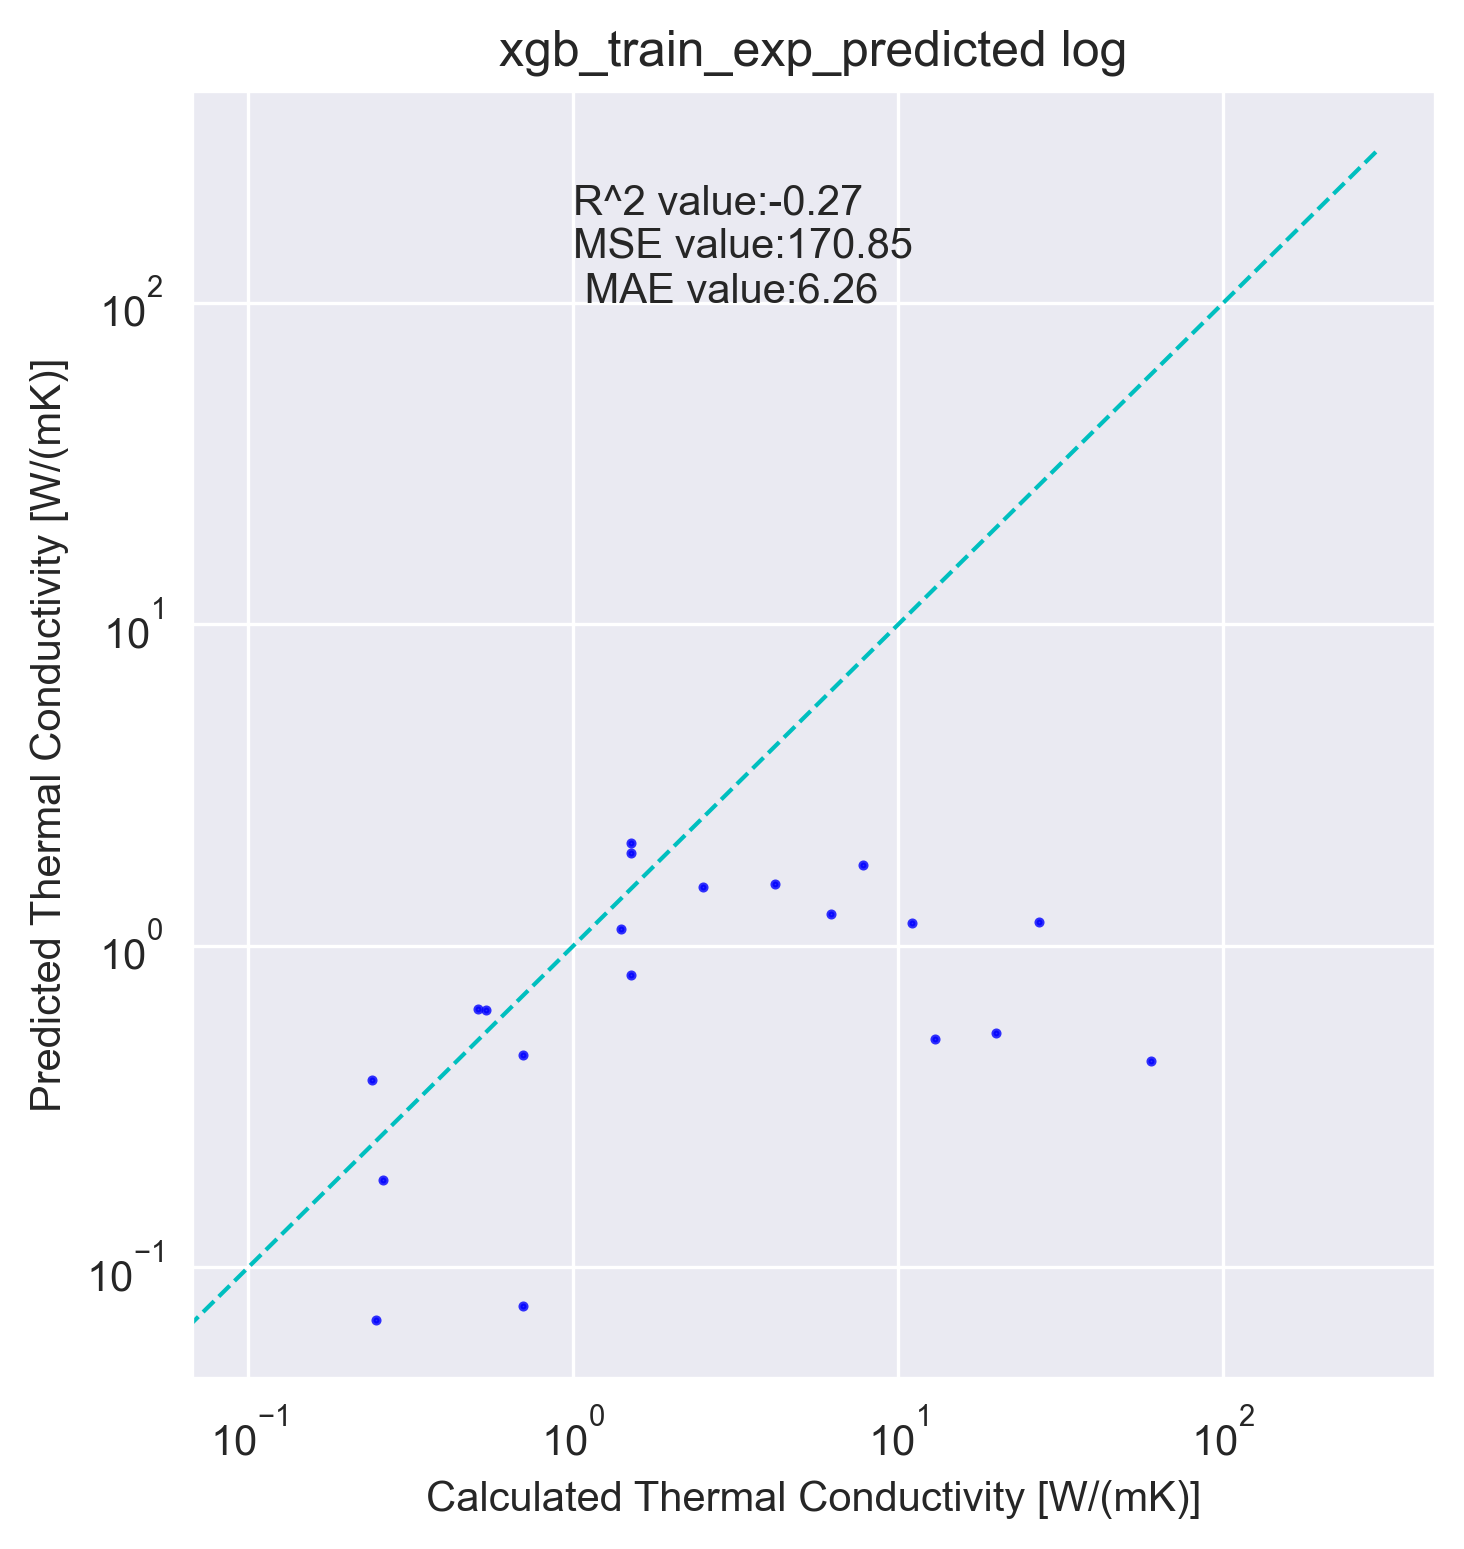

In [132]:
plot_log(exp_y_data,y_exp_predicted_xgb_droped,"xgb_train_exp_predicted")

In [133]:
y_exp_predict_list =list(y_exp_predicted_xgb_droped)
y_exp_predict_list

[-1.5702236,
 -0.5388125,
 1.127468,
 0.63103884,
 0.07568349,
 0.38244098,
 -1.2157027,
 0.18627603,
 0.811089,
 0.4383287,
 0.63740706,
 0.06873725,
 -1.421679,
 -0.41574028,
 -0.3771238,
 0.5142277,
 1.1894441,
 1.945042,
 1.5529853,
 2.0902545,
 1.1789047,
 1.5227268,
 1.2571882,
 -0.5281411,
 1.7830371,
 -0.2569656,
 -0.637494,
 -0.33287483,
 0.53357625,
 0.45828098,
 -0.79613423]

In [134]:
y_exp_real = list(exp_y_data)
y_exp_real

[0.29,
 0.53,
 1.4,
 0.54,
 0.7,
 0.24,
 0.24,
 0.26,
 1.5,
 60.0,
 0.51,
 0.247,
 0.38,
 0.518,
 11.0,
 13.0,
 27.0,
 1.5,
 4.18,
 1.5,
 11.0,
 2.5,
 6.2,
 8.2,
 7.8,
 1.7,
 6.3,
 10.0,
 20.0,
 0.7,
 1.66]

In [ ]:
r2_score(y_exp_real,y_exp_predict_list)

In [108]:
predicted_abs = []
for i in y_exp_predict_list:
    predicted_abs.append(abs(i))

NameError: name 'y_exp_predict_list' is not defined

In [109]:
r2_score(y_exp_real,predicted_abs)

NameError: name 'y_exp_real' is not defined

In [107]:
plot_log(exp_y_data,predicted_abs,"xgb_train_exp_predicted")

NameError: name 'predicted_abs' is not defined

In [75]:
predicted_abs

[1.3682578,
 1.056243,
 1.5024078,
 0.710378,
 0.0293092,
 0.32529724,
 1.128093,
 0.556224,
 0.34758666,
 1.1405228,
 0.93256223,
 0.9295004,
 1.6471038,
 0.24579148,
 0.1516424,
 1.0715532,
 2.4317572,
 2.243506,
 1.4571083,
 0.97755206,
 1.343377,
 1.6841539,
 2.1835897,
 0.7001915,
 0.70360106,
 0.49947724,
 0.55521613,
 0.73675,
 0.3436508,
 0.9730559,
 1.0472049]

In [80]:
def adj_r2_score(r2_score, n_samples, n_features):
    return 1 - ((1 - r2_score) * (n_samples - 1)) / (n_samples - n_features - 1)

r2 = r2_score(y_exp_real,predicted_abs)
adj_r2 = adj_r2_score(r2, len(y_exp_real), len(predicted_abs))

print(f"R^2 score: {r2:.4f}")
print(f"Adjusted R^2 score: {adj_r2:.4f}")

R^2 score: -0.2480
Adjusted R^2 score: 38.4386


In [77]:
predicted_abs

[1.3682578,
 1.056243,
 1.5024078,
 0.710378,
 0.0293092,
 0.32529724,
 1.128093,
 0.556224,
 0.34758666,
 1.1405228,
 0.93256223,
 0.9295004,
 1.6471038,
 0.24579148,
 0.1516424,
 1.0715532,
 2.4317572,
 2.243506,
 1.4571083,
 0.97755206,
 1.343377,
 1.6841539,
 2.1835897,
 0.7001915,
 0.70360106,
 0.49947724,
 0.55521613,
 0.73675,
 0.3436508,
 0.9730559,
 1.0472049]

In [79]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

def adj_r2_score(r2_score, n_samples, n_features):
    return 1 - ((1 - r2_score) * (n_samples - 1)) / (n_samples - n_features - 1)

r2 = r2_score(y_true, y_pred)
adj_r2 = adj_r2_score(r2, len(y_true), len(y_true))

print(f"R^2 score: {r2:.4f}")
print(f"Adjusted R^2 score: {adj_r2:.4f}")

R^2 score: 0.9486
Adjusted R^2 score: 1.1542


In [50]:
data_to_save = {
'xgb_R_Sq_train ':xgb_R_Sq_train,
'xgb_R_Sq_test':xgb_R_Sq_test,
'xgb_R_Sq_exp ':xgb_R_Sq_exp,
'xgb_MSE_train':xgb_MSE_train,
'xgb_MSE_test ':xgb_MSE_test,
'xgb_MSE_exp ':xgb_MSE_exp,
'xgb_MAE_train':xgb_MAE_train,
'xgb_MAE_test ':xgb_MAE_test,
'xgb_MAE_exp ':xgb_MAE_exp}
results_xgb = pd.DataFrame(data_to_save)
results_xgb.to_csv("results_xgb_14.06",index =False)

In [114]:
results_xgb

xgb_R_Sq_train   xgb_R_Sq_test  xgb_R_Sq_exp   xgb_MSE_train  \
0              0.99           0.92           0.08           1.46   
1              0.99           0.92           0.08           1.46   
2              0.97           0.88           0.16           6.93   
3              0.98           0.88           0.09           4.42   
4              0.99           0.84           0.12           2.57   
5              0.99           0.86           0.07           2.74   
6              0.98           0.87           0.10           3.98   
7              0.99           0.80          -0.12           1.77   
8              0.99           0.77          -0.12           1.81   
9              0.99           0.79          -0.11           2.96   
10             0.99           0.85          -0.12           2.46   
11             0.97           0.77          -0.12           6.16   
12             0.99           0.73          -0.16           3.42   
13             0.99           0.73          -0.16           3.42   
14             0.98           0.79          -0.13           5.49   
15             0.98           0.79          -0.13           5.49   
16             0.51           0.51           0.13         115.30   
17             0.45           0.45          -0.04         129.36   
18             0.45           0.45          -0.04         129.36   
19             0.45           0.45          -0.04         129.36   

    xgb_MSE_test   xgb_MSE_exp   xgb_MAE_train  xgb_MAE_test   xgb_MAE_exp   
0           26.20        125.62           0.75           2.18          4.97  
1           26.20        125.62           0.75           2.18          4.97  
2           37.61        114.79           1.45           2.44          4.95  
3           35.85        123.61           1.21           2.39          5.09  
4           49.02        119.22           1.00           2.46          4.99  
5           42.98        125.87           1.03           2.48          5.07  
6           40.50        122.34           1.23           2.56          4.95  
7           62.70        151.75           0.85           2.66          5.72  
8           72.00        152.98           0.86           2.66          5.74  
9           63.94        151.48           1.08           2.68          5.71  
10          45.16        152.29           1.01           2.62          5.74  
11          69.98        152.60           1.55           2.87          5.78  
12          83.18        157.77           1.25           3.33          5.87  
13          83.18        157.77           1.25           3.33          5.87  
14          63.90        154.36           1.57           3.54          6.00  
15          63.90        154.36           1.57           3.54          6.00  
16         152.34        118.71           4.90           5.51          5.74  
17         171.61        141.72           5.18           5.97          6.81  
18         171.61        141.72           5.18           5.97          6.81  
19         171.61        141.72           5.18           5.97          6.81

In [116]:
red_fetures[-1]

['period',
 'group',
 'atomic mass',
 'atomic density',
 'valence electrons',
 'absolute radii',
 'covalent radii',
 'van der Waals radii',
 'electron affinity',
 'electronegativity',
 'first ionization energy',
 'boiling point',
 'melting point',
 'molar volume',
 'thermal conductivity',
 'the orbital exponent of Slater-type orbitals',
 'polarizability',
 'global hardness',
 'electrophilicity indices',
 'atomization enthalpy',
 'fusion enthalpy',
 'vaporization enthalpy',
 'binding energy',
 'volume_atom',
 'volume_cell',
 'Mendeleev number']

In [119]:
red_name[-2]

'red_0.15'

In [120]:
clf.best_params_

{'learning_rate': 0.02}

In [45]:
list(y_exp_predicted_xgb_droped)

NameError: name 'y_exp_predicted_xgb_droped' is not defined

In [123]:
exp_y_data


0      0.290
1      0.530
2      1.400
3      0.540
4      0.700
5      0.240
6      0.240
7      0.260
8      1.500
9     60.000
10     0.510
11     0.247
12     0.380
13     0.518
14    11.000
15    13.000
16    27.000
17     1.500
18     4.180
19    15.000
20    11.000
21     2.500
22     6.200
23     8.200
24     7.800
25     1.700
26     6.300
27    10.000
28    20.000
29     0.700
30     1.660
Name: thermal_conductivity_exp , dtype: float64

In [124]:
exp_dattaset

Unnamed: 0  atomic number  Mendeleev number    period      group  \
0            0      40.000000         79.812500  4.500000  13.000000   
1            1      42.705882         83.647059  4.588235  14.117647   
2            2      19.928571         79.500000  3.428571  12.214286   
3            3      30.666667         79.000000  4.000000  12.666667   
4            4      36.666667         78.666667  4.333333  12.666667   
5            5      22.428571         82.714286  3.500000  13.428571   
6            6      31.200000         81.200000  4.000000  13.200000   
7            7      30.000000         81.266667  3.933333  13.200000   
8            8      21.000000         82.285714  3.428571  13.285714   
9            9      32.000000         84.000000  4.000000  14.000000   
10          10      46.352941         87.529412  4.705882  14.823529   
11          11      42.444444         82.666667  4.555556  13.888889   
12          12      52.705882         86.823529  5.058824  14.823529   
13          13      44.470588         87.588235  4.647059  14.823529   
14          14      41.000000         84.000000  4.500000  14.000000   
15          15      32.000000         84.500000  4.000000  14.000000   
16          16      23.000000         85.000000  3.500000  14.000000   
17          17      33.875000         82.875000  4.125000  13.625000   
18          18      24.875000         83.375000  3.625000  13.625000   
19          19      42.000000         88.000000  4.500000  15.000000   
20          20      12.666667         77.000000  3.000000   6.000000   
21          21      19.571429         78.571429  3.428571  11.857143   
22          22      45.500000         83.750000  4.750000  14.000000   
23          23      41.000000         84.250000  4.500000  14.000000   
24          24      21.750000         80.250000  3.500000  12.750000   
25          25      47.250000         83.750000  4.750000  14.000000   
26          26      50.000000         83.500000  5.000000  14.000000   
27          27      41.000000         84.000000  4.500000  14.000000   
28          28      32.000000         84.500000  4.000000  14.000000   
29          29      50.500000         85.750000  5.000000  14.500000   
30          30      45.500000         84.000000  4.750000  14.000000   

    atomic mass  atomic density  valence electrons  absolute radii  \
0     91.972094     7876.500000           0.000000        1.387875   
1    102.024471     5845.529412           0.000000        1.525476   
2     41.867586     3995.785714          -0.071429        1.272243   
3     68.684000     7553.000000           0.666667        1.354600   
4     84.897333     8026.666667           0.666667        1.389633   
5     47.727557     5430.214286          -0.071429        1.259293   
6     70.317867     7039.800000           0.533333        1.331913   
7     67.347567     6840.266667           0.533333        1.327853   
8     44.238914     4937.142857          -0.285714        1.222357   
9     72.640000     5323.000000           4.000000        1.436300   
10   111.855176     6421.411765           0.117647        1.506365   
11   101.399767     6071.222222           0.000000        1.543906   
12   127.771059     6917.647059           0.117647        1.533153   
13   106.649882     6184.352941           0.117647        1.507318   
14    96.504500     6690.000000           0.000000        1.212300   
15    72.184500     5979.500000           0.000000        1.159750   
16    48.737000     4550.000000           0.000000        1.118550   
17    77.571900     6665.750000           0.250000        1.309425   
18    54.124400     5236.250000           0.250000        1.268225   
19    98.835000     6064.500000           1.000000        1.349300   
20    25.565167     1935.333333           2.666667        1.429333   
21    41.077143     3682.000000           0.000000        1.288871   
22   108.391000     7177.500000           0.250000        1.490950   
23    97.117250    

In [6]:
train_dataset.columns

Index(['Unnamed: 0', 'atomic number', 'Mendeleev number', 'period', 'group',
       'atomic mass', 'atomic density', 'valence electrons', 'absolute radii',
       'covalent radii', 'van der Waals radii', 'electron affinity',
       'electronegativity', 'first ionization energy', 'boiling point',
       'melting point', 'molar volume', 'thermal conductivity',
       'the orbital exponent of Slater-type orbitals', 'polarizability',
       'global hardness', 'electrophilicity indices', 'atomization enthalpy',
       'fusion enthalpy', 'vaporization enthalpy', 'binding energy',
       'compound', 'auid', 'aurl', 'spacegroup_relax', 'Pearson_symbol_relax',
       'agl_thermal_conductivity_300K', 'volume_atom', 'volume_cell',
       'spacegroup_orig', 'geometry'],
      dtype='object')

In [12]:
data_to_hist = train_dataset.drop(axis=1,labels=['Pearson_symbol_relax','spacegroup_orig', 'Unnamed: 0','auid','compound',
'aurl' ])

atomic number 0
Mendeleev number 1
period 2
group 3
atomic mass 4
atomic density 5
valence electrons 6
absolute radii 7
covalent radii 8
van der Waals radii 9
electron affinity 10
electronegativity 11
first ionization energy 12
boiling point 13
melting point 14
molar volume 15
thermal conductivity 16
the orbital exponent of Slater-type orbitals 17
polarizability 18
global hardness 19
electrophilicity indices 20
atomization enthalpy 21
fusion enthalpy 22
vaporization enthalpy 23
binding energy 24
spacegroup_relax 25
agl_thermal_conductivity_300K 26
volume_atom 27


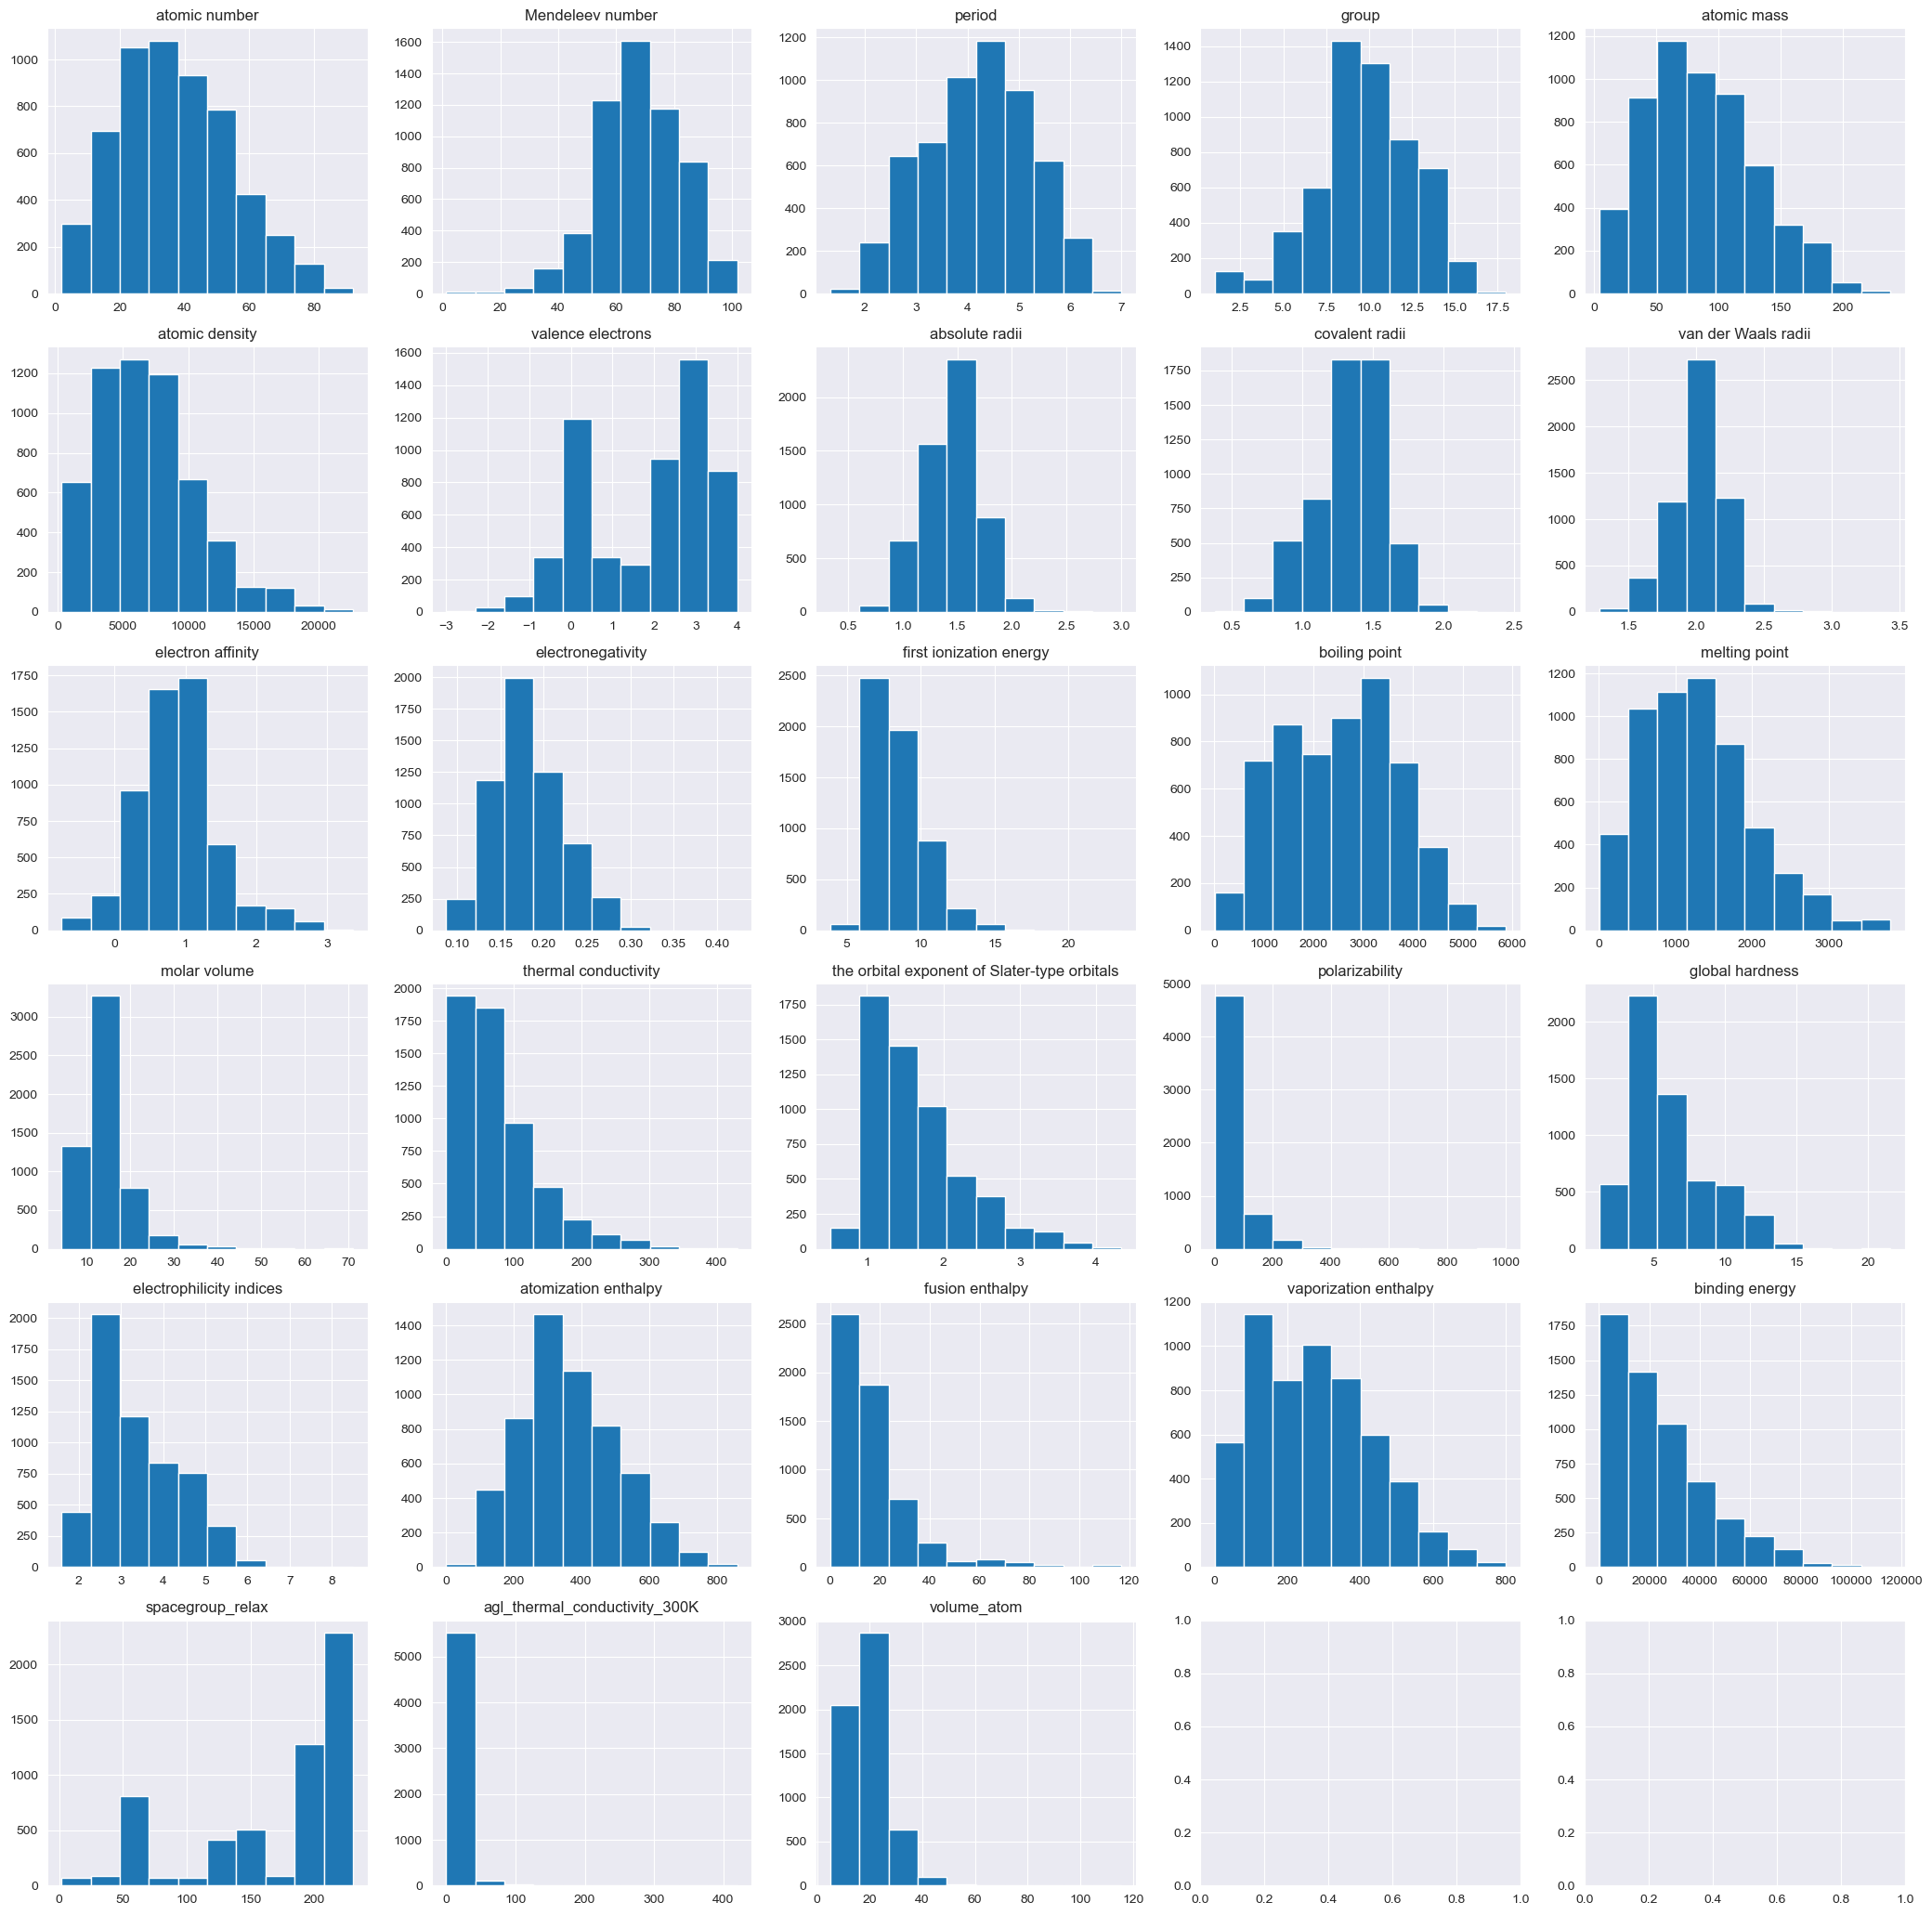

In [13]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))



for i,j in zip(data_to_hist.columns,range(28)):
    print(i,j)
    if j<5:
        axs[0, j].hist(data_to_hist[i])
        axs[0, j].set_title(i)
    if 4<j<=9:
        axs[1, j-5].hist(data_to_hist[i])
        axs[1, j-5].set_title(i)
    if 9<j<=14:
        axs[2, j-10].hist(data_to_hist[i])
        axs[2, j-10].set_title(i)
    if 14<j<=19:
        axs[3, j-15].hist(data_to_hist[i])
        axs[3, j-15].set_title(i)
    if 19<j<=24:
        axs[4, j-20].hist(data_to_hist[i])
        axs[4, j-20].set_title(i)
    if 24<j<=29:
        axs[5, j-25].hist(data_to_hist[i])
        axs[5, j-25].set_title(i)

plt.subplots_adjust(left=1.0, bottom=1.0, right=2.0, top=2.0)

plt.show()

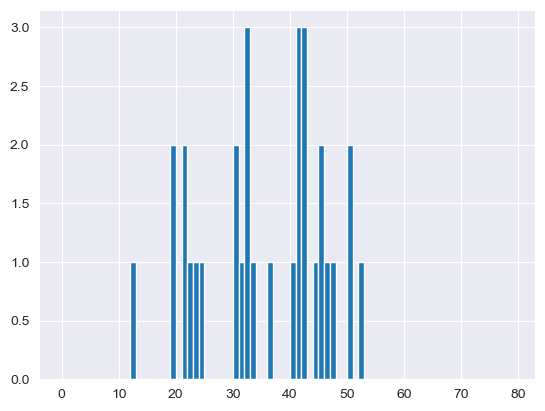

In [61]:
from matplotlib.pyplot import hist


# wygeneruj histogram dla jednej kolumny
ax = hist(exp_dattaset['atomic number'],bins=range(0,80))

# zmień skalę osi x na logarytmiczną


# zmień skalę osi y na logarytmiczną


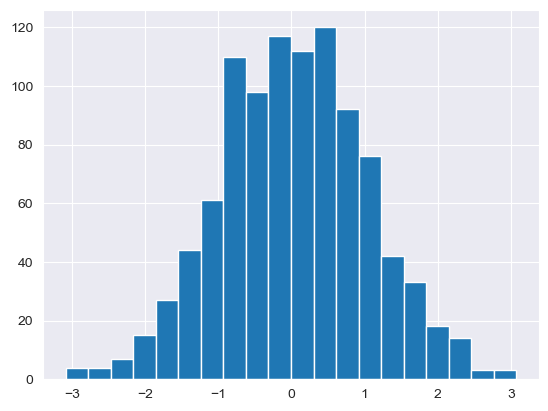

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data = np.random.normal(size=1000)

# Plot the histogram with 20 bins
plt.hist(data, bins=20)

# Show the plot
plt.show()


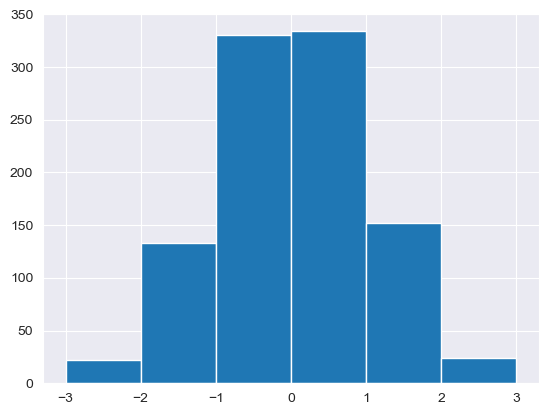

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data = np.random.normal(size=1000)

# Define the bin edges manually
bin_edges = [-3, -2, -1, 0, 1, 2, 3]

# Plot the histogram with the specified bin edges
plt.hist(data, bins=bin_edges)

# Show the plot
plt.show()

In [68]:
exp_dattaset.loc[9]

Unnamed: 0                                             9
atomic number                                       32.0
Mendeleev number                                    84.0
period                                               4.0
group                                               14.0
atomic mass                                        72.64
atomic density                                    5323.0
valence electrons                                    4.0
absolute radii                                    1.4363
covalent radii                                       1.2
van der Waals radii                                 2.11
electron affinity                                1.23268
electronegativity                               0.189589
first ionization energy                           7.8994
boiling point                                     3093.0
melting point                                     1211.4
molar volume                                       13.63
thermal conductivity           

In [24]:
df_train = x_train['spacegroup_relax']
df_train

1697    189
146     128
3885    139
3562    227
4447     62
       ... 
4654     65
759      62
225      87
3466    223
555     225
Name: spacegroup_relax, Length: 5097, dtype: int64

In [28]:
resoults = []
xgb_R_Sq_train = []
xgb_R_Sq_test = []
xgb_R_Sq_exp = []
xgb_MSE_train = []
xgb_MSE_test = []
xgb_MSE_exp = []
xgb_MAE_train = []
xgb_MAE_test = []
xgb_MAE_exp = []

df_train = x_train['spacegroup_relax']
#scaler_ = preprocessing.StandardScaler().fit(df_train)
x_droped_transformed = df_train
kr_predictor.fit(x_droped_transformed, y_train)
y_droped = kr_predictor.predict(x_droped_transformed)
resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_train, y_droped),2)}\nMSE value:{round(mse(y_train, y_droped),2)}\nMAE value:{round(mae(y_train, y_droped),2)}')
krr_R_Sq_train.append( round(r2_score(y_train, y_droped),2))
krr_MSE_train.append(round(mse(y_train, y_droped),2))
krr_MAE_train.append(round(mae(y_train, y_droped),2))
df_test = x_test['spacegroup_relax']
x_droped_transformed_test = scaler_.transform(df_test)
y_droped = kr_predictor.predict(x_droped_transformed_test)
resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_test, y_droped),2)}\nMSE value:{round(mse(y_test, y_droped),2)}\nMAE value:{round(mae(y_test, y_droped),2)}')
krr_R_Sq_test.append(round(r2_score(y_test, y_droped),2))
krr_MSE_test.append(round(mse(y_test, y_droped),2))
krr_MAE_test.append(round(mae(y_test, y_droped),2))
df_exp = x_exp_data['spacegroup_relax']
x_droped_transformed_test = scaler_.transform(df_exp)
y_droped = kr_predictor.predict(x_droped_transformed_test)
resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(exp_y_data, y_droped),2)}\nMSE value:{round(mse(exp_y_data, y_droped),2)}\nMAE value:{round(mae(exp_y_data, y_droped),2)}')
krr_R_Sq_exp.append(round(r2_score(exp_y_data, y_droped),2))
krr_MSE_exp.append(round(mse(exp_y_data, y_droped),2))
krr_MAE_exp.append(round(mae(exp_y_data, y_droped),2))



ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\kernel_ridge.py", line 196, in fit
    X, y = self._validate_data(
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\utils\validation.py", line 902, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[194 227 225 ...  87 223 225].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\kernel_ridge.py", line 196, in fit
    X, y = self._validate_data(
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\utils\validation.py", line 902, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[189 128 139 ...  87 223 225].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\kernel_ridge.py", line 196, in fit
    X, y = self._validate_data(
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\Kacper\anaconda3\envs\SFLTCMBMLA\lib\site-packages\sklearn\utils\validation.py", line 902, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[189 128 139 ... 174 221  44].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [43]:
german_y = exp_y_data[9]
german_y

60.0

In [80]:
german_x = x_exp_data.loc[9]
german_x = german_x.transpose()
german_x

atomic number                                      32.000000
Mendeleev number                                   84.000000
period                                              4.000000
group                                              14.000000
atomic mass                                        72.640000
atomic density                                   5323.000000
valence electrons                                   4.000000
absolute radii                                      1.436300
covalent radii                                      1.200000
van der Waals radii                                 2.110000
electron affinity                                   1.232680
electronegativity                                   0.189589
first ionization energy                             7.899400
boiling point                                    3093.000000
melting point                                    1211.400000
molar volume                                       13.630000
thermal conductivity    

In [85]:
resoults = []
xgb_R_Sq_train = []
xgb_R_Sq_test = []
xgb_R_Sq_exp = []
xgb_MSE_train = []
xgb_MSE_test = []
xgb_MSE_exp = []
xgb_MAE_train = []
xgb_MAE_test = []
xgb_MAE_exp = []


for i,j, in zip(red_fetures,red_name,):

    df_train = x_train.drop(x_train[i], axis=1)
    scaler_ = preprocessing.StandardScaler().fit(df_train)
    x_droped_transformed = scaler_.transform(df_train)
    clf.fit(x_droped_transformed, y_train)
    #y_droped = clf.predict(x_droped_transformed)
#
    #resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_train, y_droped),2)}\nMSE value:{round(mse(y_train, y_droped),2)}\nMAE value:{round(mae(y_train, y_droped),2)}')
    #xgb_R_Sq_train.append( round(r2_score(y_train, y_droped),2))
    #xgb_MSE_train.append(round(mse(y_train, y_droped),2))
    #xgb_MAE_train.append(round(mae(y_train, y_droped),2))
    #df_test = x_test.drop(x_test[i], axis=1)
    #x_droped_transformed_test = scaler_.transform(df_test)
    #y_droped = clf.predict(x_droped_transformed_test)
    #resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_test, y_droped),2)}\nMSE value:{round(mse(y_test, y_droped),2)}\nMAE value:{round(mae(y_test, y_droped),2)}')
    #xgb_R_Sq_test.append(round(r2_score(y_test, y_droped),2))
    #xgb_MSE_test.append(round(mse(y_test, y_droped),2))
    #xgb_MAE_test.append(round(mae(y_test, y_droped),2))
#
    df_exp = x_exp_data.drop(x_exp_data[i], axis=1)


    x_droped_transformed_test = scaler_.transform(df_exp)
    x_droped_transformed_test[9]
    y_droped = clf.predict(x_droped_transformed_test)
    #resoults.append(f'{j}_xgb_train \nR^2 value:{round(r2_score(y_droped, german_y),2)}\nMSE value:{round(mse(y_droped, german_y),2)}\nMAE value:{round(mae(y_droped, german_y),2)}')
    resoults.append(y_droped)
    xgb_R_Sq_exp.append(round(r2_score(exp_y_data, y_droped),2))
    xgb_MSE_exp.append(round(mse(exp_y_data, y_droped),2))
    xgb_MAE_exp.append(round(mae(exp_y_data, y_droped),2))

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for eac

In [ ]:

xgb_R_Sq_exp

In [ ]:

xgb_MSE_exp

In [ ]:

xgb_MAE_exp

In [86]:
resoults

[array([0.6723766 , 0.7607438 , 2.231317  , 1.8253913 , 2.0404763 ,
        0.8817342 , 1.0583948 , 0.99865556, 1.7600948 , 6.5462503 ,
        0.6460064 , 0.7842437 , 0.6146572 , 0.6997332 , 3.3364267 ,
        4.338559  , 6.683008  , 2.0900729 , 4.056653  , 3.1173198 ,
        4.9877796 , 2.2013135 , 1.6073716 , 2.7015224 , 5.431115  ,
        1.768547  , 3.074394  , 2.7590923 , 3.892774  , 1.933402  ,
        1.1743026 ], dtype=float32),
 array([0.6723766 , 0.7607438 , 2.231317  , 1.8253913 , 2.0404763 ,
        0.8817342 , 1.0583948 , 0.99865556, 1.7600948 , 6.5462503 ,
        0.6460064 , 0.7842437 , 0.6146572 , 0.6997332 , 3.3364267 ,
        4.338559  , 6.683008  , 2.0900729 , 4.056653  , 3.1173198 ,
        4.9877796 , 2.2013135 , 1.6073716 , 2.7015224 , 5.431115  ,
        1.768547  , 3.074394  , 2.7590923 , 3.892774  , 1.933402  ,
        1.1743026 ], dtype=float32),
 array([0.79828465, 0.76316375, 2.254165  , 2.2527502 , 2.2864466 ,
        1.1136246 , 1.2862004 , 1.0687182 

In [89]:

ger_res = []
resoults(0,9)

TypeError: 'list' object is not callable

In [90]:
for i in resoults:
    ger_res.append(i[9])
ger_res

[6.5462503,
 6.5462503,
 9.95346,
 8.522248,
 8.99382,
 10.851402,
 7.353864,
 3.9655395,
 3.5688171,
 3.6008177,
 3.6019404,
 3.3110113,
 2.7076025,
 2.7076025,
 4.163341,
 4.163341,
 7.5578017,
 4.5122666,
 4.5122666,
 4.5122666]

In [49]:
cor_name = []
cor_value = []
for i in reduction:
    cor_name = [column for column in upper.columns if upper[column] > i]
    df = df.drop(df[to_drop], axis=1)
    df_train = x_train.drop(x_train[to_drop], axis=1)
    x_droped_transformed = scaler_.fit_transform(df_train)
    clf.fit(x_droped_transformed,y_train)
    y_droped = clf.predict(x_droped_transformed)

    print(len(to_drop))

    print(mse(y_train,y_droped))


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [37]:

def get_max_corr(corr_matrix):

    max_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().max()
    return corr_matrix[(corr_matrix == max_corr)].dropna(how='all').dropna(how='all', axis=1).columns.tolist()[1]

In [38]:
get_max_corr(upper)

C:\Users\Kacper\AppData\Local\Temp\ipykernel_596\3433846773.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().max()


IndexError: list index out of range

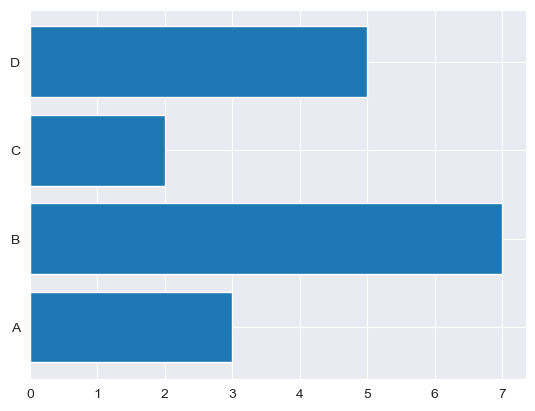

In [39]:
x = ['A', 'B', 'C', 'D']
y = [3, 7, 2, 5]

plt.barh(x, y)
plt.show()

In [40]:
for i in reduction:
    to_drop = [column for column in upper.columns if upper[column].mean() > i]
    df = df.drop(df[to_drop], axis=1)
    df_train = x_train.drop(x_train[to_drop], axis=1)
    x_droped_transformed = scaler_.fit_transform(df_train)
    clf.fit(x_droped_transformed,y_train)
    y_droped = clf.predict(x_droped_transformed)

    print(len(to_drop))

    print(mse(y_train,y_droped))



KeyError: "None of [Index(['period'], dtype='object')] are in the [columns]"

range(0, 100)

In [44]:
import numpy as np

my_list = np.arange(0, 1.01, 0.01).tolist()
print(my_list)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0]


In [48]:
reduction_2 = []
for i in my_list:
    reduction_2.append(round(i,2))

reduction_2

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0]

In [53]:
cor_name = []
cor_value = []
for i in reduction_2:
    cor_name = [column for column in upper.columns if upper[column] > i]
    df = df.drop(df[to_drop], axis=1)
    df_train = x_train.drop(x_train[to_drop], axis=1)
    x_droped_transformed = scaler_.fit_transform(df_train)
    clf.fit(x_droped_transformed,y_train)
    y_droped = clf.predict(x_droped_transformed)

    print(len(to_drop))

    print(mse(y_train,y_droped))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
cor_name = []
cor_value = []
for name, col_ in upper.iteritems():
    cor_name.append(name)
    cor_value.append(round(col_.max(),2))

C:\Users\Kacper\AppData\Local\Temp\ipykernel_596\2270504084.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col_ in upper.iteritems():


In [58]:
cor_value

[nan,
 0.96,
 0.25,
 1.0,
 0.85,
 0.45,
 0.55,
 0.85,
 0.91,
 0.46,
 0.66,
 0.91,
 0.8,
 0.91,
 0.59,
 0.39,
 0.58,
 0.61,
 0.86,
 0.93,
 0.89,
 0.83,
 0.97,
 0.96,
 0.09,
 0.74,
 0.28]

In [59]:
cor_name

['atomic number',
 'period',
 'group',
 'atomic mass',
 'atomic density',
 'valence electrons',
 'absolute radii',
 'covalent radii',
 'van der Waals radii',
 'electron affinity',
 'electronegativity',
 'first ionization energy',
 'boiling point',
 'melting point',
 'molar volume',
 'thermal conductivity',
 'the orbital exponent of Slater-type orbitals',
 'polarizability',
 'global hardness',
 'electrophilicity indices',
 'atomization enthalpy',
 'fusion enthalpy',
 'vaporization enthalpy',
 'binding energy',
 'spacegroup_relax',
 'volume_atom',
 'volume_cell']

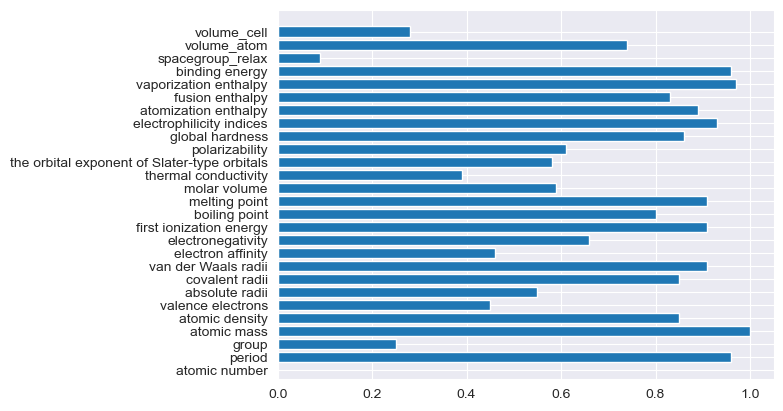

In [60]:
plt.barh(cor_name, cor_value)
plt.show()

In [61]:
cor_hist = dict(zip(cor_name, cor_value))
cor_hist

{'atomic number': nan,
 'period': 0.96,
 'group': 0.25,
 'atomic mass': 1.0,
 'atomic density': 0.85,
 'valence electrons': 0.45,
 'absolute radii': 0.55,
 'covalent radii': 0.85,
 'van der Waals radii': 0.91,
 'electron affinity': 0.46,
 'electronegativity': 0.66,
 'first ionization energy': 0.91,
 'boiling point': 0.8,
 'melting point': 0.91,
 'molar volume': 0.59,
 'thermal conductivity': 0.39,
 'the orbital exponent of Slater-type orbitals': 0.58,
 'polarizability': 0.61,
 'global hardness': 0.86,
 'electrophilicity indices': 0.93,
 'atomization enthalpy': 0.89,
 'fusion enthalpy': 0.83,
 'vaporization enthalpy': 0.97,
 'binding energy': 0.96,
 'spacegroup_relax': 0.09,
 'volume_atom': 0.74,
 'volume_cell': 0.28}

In [62]:
sorted_hist = dict(sorted(cor_hist.items(), key=lambda item: item[1]))
print(sorted_hist)

{'atomic number': nan, 'spacegroup_relax': 0.09, 'group': 0.25, 'volume_cell': 0.28, 'thermal conductivity': 0.39, 'valence electrons': 0.45, 'electron affinity': 0.46, 'absolute radii': 0.55, 'the orbital exponent of Slater-type orbitals': 0.58, 'molar volume': 0.59, 'polarizability': 0.61, 'electronegativity': 0.66, 'volume_atom': 0.74, 'boiling point': 0.8, 'fusion enthalpy': 0.83, 'atomic density': 0.85, 'covalent radii': 0.85, 'global hardness': 0.86, 'atomization enthalpy': 0.89, 'van der Waals radii': 0.91, 'first ionization energy': 0.91, 'melting point': 0.91, 'electrophilicity indices': 0.93, 'period': 0.96, 'binding energy': 0.96, 'vaporization enthalpy': 0.97, 'atomic mass': 1.0}


TypeError: unhashable type: 'numpy.ndarray'

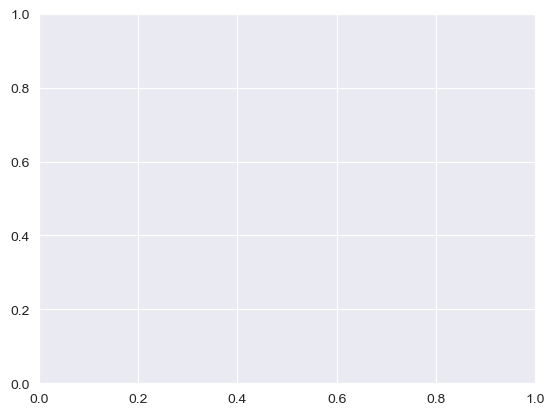

In [76]:
plt.barh(list(zip(list(sorted_hist.keys()),list(sorted_hist.values()))),list(sorted_hist.values()))
plt.show()

In [69]:
list(sorted_hist.keys())

['atomic number',
 'spacegroup_relax',
 'group',
 'volume_cell',
 'thermal conductivity',
 'valence electrons',
 'electron affinity',
 'absolute radii',
 'the orbital exponent of Slater-type orbitals',
 'molar volume',
 'polarizability',
 'electronegativity',
 'volume_atom',
 'boiling point',
 'fusion enthalpy',
 'atomic density',
 'covalent radii',
 'global hardness',
 'atomization enthalpy',
 'van der Waals radii',
 'first ionization energy',
 'melting point',
 'electrophilicity indices',
 'period',
 'binding energy',
 'vaporization enthalpy',
 'atomic mass']

In [79]:
tuple_ = list(zip(list(sorted_hist.keys()),list(sorted_hist.values())))
tuple_

[('atomic number', nan),
 ('spacegroup_relax', 0.09),
 ('group', 0.25),
 ('volume_cell', 0.28),
 ('thermal conductivity', 0.39),
 ('valence electrons', 0.45),
 ('electron affinity', 0.46),
 ('absolute radii', 0.55),
 ('the orbital exponent of Slater-type orbitals', 0.58),
 ('molar volume', 0.59),
 ('polarizability', 0.61),
 ('electronegativity', 0.66),
 ('volume_atom', 0.74),
 ('boiling point', 0.8),
 ('fusion enthalpy', 0.83),
 ('atomic density', 0.85),
 ('covalent radii', 0.85),
 ('global hardness', 0.86),
 ('atomization enthalpy', 0.89),
 ('van der Waals radii', 0.91),
 ('first ionization energy', 0.91),
 ('melting point', 0.91),
 ('electrophilicity indices', 0.93),
 ('period', 0.96),
 ('binding energy', 0.96),
 ('vaporization enthalpy', 0.97),
 ('atomic mass', 1.0)]

In [83]:
values_and_names = []
for i in tuple_:
    values_and_names.append(str(i))

values_and_names

["('atomic number', nan)",
 "('spacegroup_relax', 0.09)",
 "('group', 0.25)",
 "('volume_cell', 0.28)",
 "('thermal conductivity', 0.39)",
 "('valence electrons', 0.45)",
 "('electron affinity', 0.46)",
 "('absolute radii', 0.55)",
 "('the orbital exponent of Slater-type orbitals', 0.58)",
 "('molar volume', 0.59)",
 "('polarizability', 0.61)",
 "('electronegativity', 0.66)",
 "('volume_atom', 0.74)",
 "('boiling point', 0.8)",
 "('fusion enthalpy', 0.83)",
 "('atomic density', 0.85)",
 "('covalent radii', 0.85)",
 "('global hardness', 0.86)",
 "('atomization enthalpy', 0.89)",
 "('van der Waals radii', 0.91)",
 "('first ionization energy', 0.91)",
 "('melting point', 0.91)",
 "('electrophilicity indices', 0.93)",
 "('period', 0.96)",
 "('binding energy', 0.96)",
 "('vaporization enthalpy', 0.97)",
 "('atomic mass', 1.0)"]

In [84]:
values_and_names_ = []
for i in values_and_names:
    values_and_names_.append(i[1:-1])
values_and_names_

["'atomic number', nan",
 "'spacegroup_relax', 0.09",
 "'group', 0.25",
 "'volume_cell', 0.28",
 "'thermal conductivity', 0.39",
 "'valence electrons', 0.45",
 "'electron affinity', 0.46",
 "'absolute radii', 0.55",
 "'the orbital exponent of Slater-type orbitals', 0.58",
 "'molar volume', 0.59",
 "'polarizability', 0.61",
 "'electronegativity', 0.66",
 "'volume_atom', 0.74",
 "'boiling point', 0.8",
 "'fusion enthalpy', 0.83",
 "'atomic density', 0.85",
 "'covalent radii', 0.85",
 "'global hardness', 0.86",
 "'atomization enthalpy', 0.89",
 "'van der Waals radii', 0.91",
 "'first ionization energy', 0.91",
 "'melting point', 0.91",
 "'electrophilicity indices', 0.93",
 "'period', 0.96",
 "'binding energy', 0.96",
 "'vaporization enthalpy', 0.97",
 "'atomic mass', 1.0"]

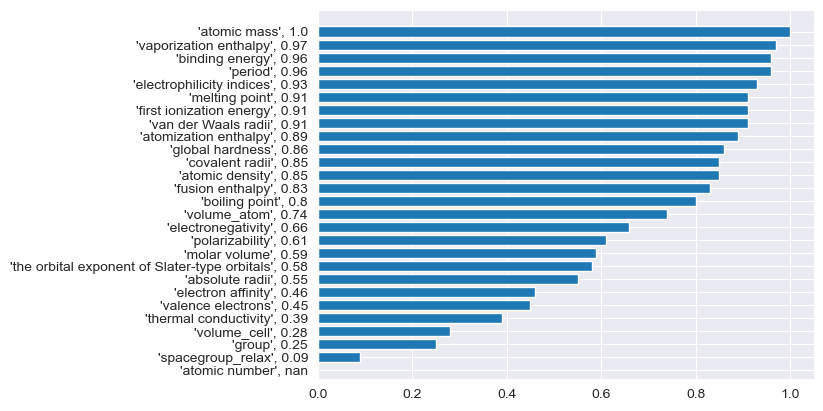

<Figure size 10000x10000 with 0 Axes>

In [89]:
plt.barh(values_and_names_,list(sorted_hist.values()))
plt.figure(figsize=(10, 10),dpi=1000)
plt.show()